# Importing Dataset and Libraries

In [331]:
#1&2 Importing dataset and converting to dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'

df = pd.read_csv(url)

df

Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 columns]

# Merging by Country/Region

In [332]:
#3 Merging by Country/Region

#Before grouping them, we have 3 reported records from cruise ships
ship_rows = df['Province/State'].str.contains('Grand Princess') | df['Province/State'].str.contains('Diamond Princess') | df['Country/Region'].str.contains('Diamond Princess') | df['Country/Region'].str.contains('MS Zaandam')
ship_df = df[ship_rows]
ship_df

df = df[~(ship_rows)]

#merging using groupby
df = df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df

Date        Country/Region  Confirmed  Deaths  Recovered
0       2020-01-22           Afghanistan          0       0        0.0
1       2020-01-22               Albania          0       0        0.0
2       2020-01-22               Algeria          0       0        0.0
3       2020-01-22               Andorra          0       0        0.0
4       2020-01-22                Angola          0       0        0.0
...            ...                   ...        ...     ...        ...
159931  2022-04-16    West Bank and Gaza     656617    5656        0.0
159932  2022-04-16  Winter Olympics 2022        535       0        0.0
159933  2022-04-16                 Yemen      11817    2148        0.0
159934  2022-04-16                Zambia     318467    3973        0.0
159935  2022-04-16              Zimbabwe     247237    5462        0.0

[159936 rows x 5 columns]

# Solving for most recent date

In [333]:
#4

#getting the most recent date
recent_date = df['Date'].max()

df_daily = df.groupby(["Date","Country/Region"]).aggregate({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_daily.reset_index()

df_recent_date = df_daily.loc[recent_date,:]
df_recent_date
print(df_recent_date)

                      Confirmed  Deaths  Recovered
Country/Region                                    
Afghanistan              178387    7676        0.0
Albania                  274462    3496        0.0
Algeria                  265739    6874        0.0
Andorra                   40709     153        0.0
Angola                    99194    1900        0.0
...                         ...     ...        ...
West Bank and Gaza       656617    5656        0.0
Winter Olympics 2022        535       0        0.0
Yemen                     11817    2148        0.0
Zambia                   318467    3973        0.0
Zimbabwe                 247237    5462        0.0

[196 rows x 3 columns]


# Top 10 countries with most confirmed cases

In [334]:
#top 10 countries with most confirmed cases on recent date
df_top_confirmed_recent = df_recent_date.sort_values(by="Confirmed", ascending=False)
df_top_confirmed_recent.head(10)

Confirmed  Deaths  Recovered
Country/Region                              
US               80625120  988609        0.0
India            43042097  521751        0.0
Brazil           30250077  662185        0.0
France           27874269  145159        0.0
Germany          23416663  132942        0.0
United Kingdom   21916961  172014        0.0
Russia           17801103  365774        0.0
Korea, South     16305752   21092        0.0
Italy            15659835  161602        0.0
Turkey           14991669   98551        0.0

# Top 10 countries with most death cases

In [335]:
#top 10 countries with most death cases on recent date
df_top_death_recent = df_recent_date.sort_values(by="Deaths", ascending= False)
df_top_death_recent.head(10)

Confirmed  Deaths  Recovered
Country/Region                              
US               80625120  988609        0.0
Brazil           30250077  662185        0.0
India            43042097  521751        0.0
Russia           17801103  365774        0.0
Mexico            5726668  323938        0.0
Peru              3555139  212619        0.0
United Kingdom   21916961  172014        0.0
Italy            15659835  161602        0.0
Indonesia         6039266  155844        0.0
France           27874269  145159        0.0

# Rise of Covid confirmed cases for all countries

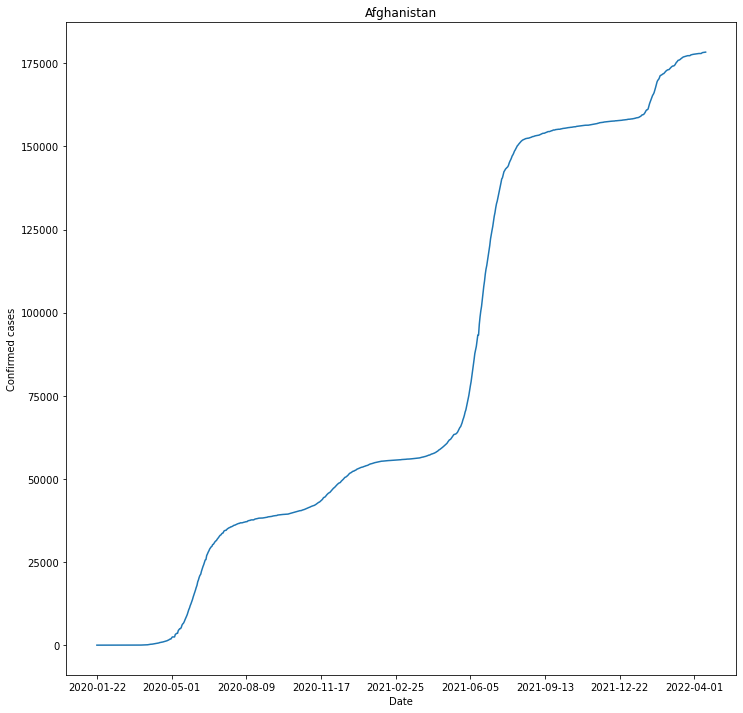

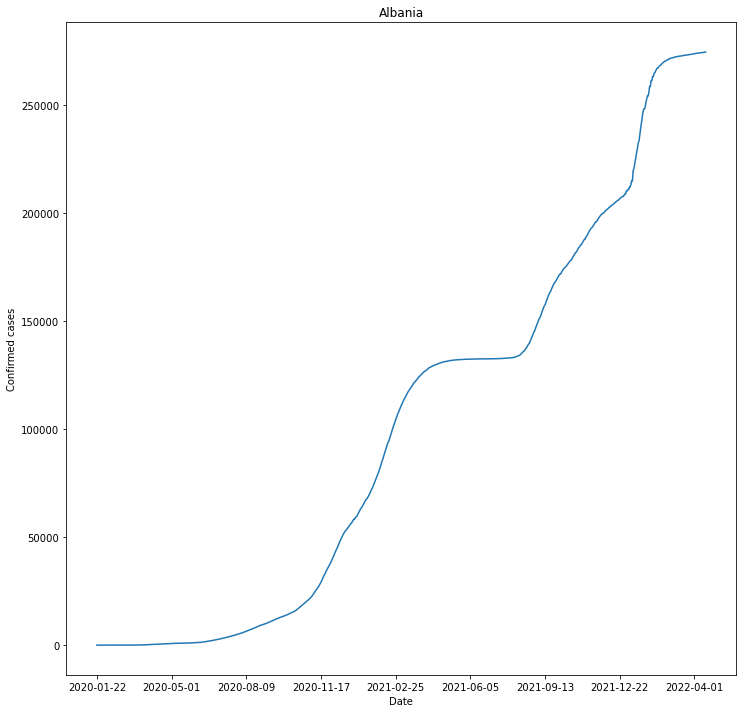

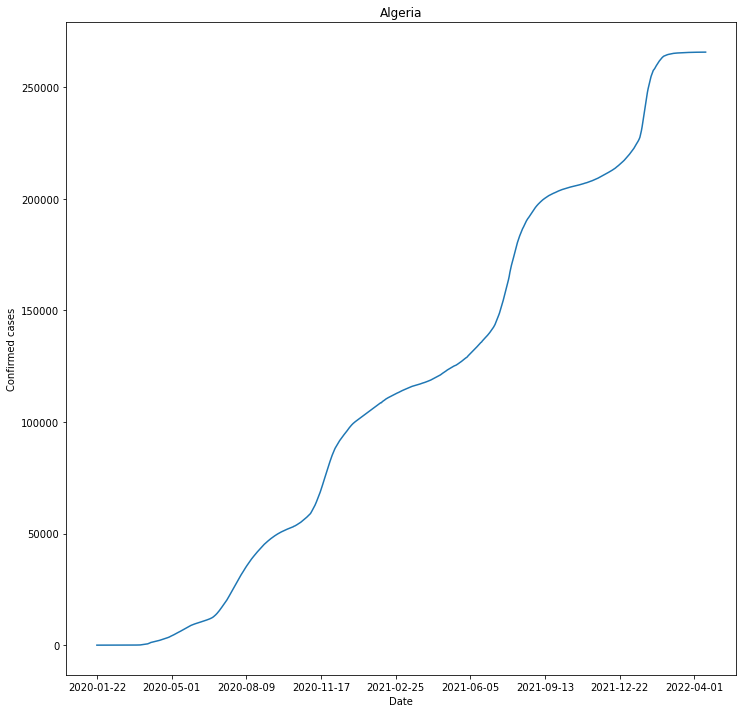

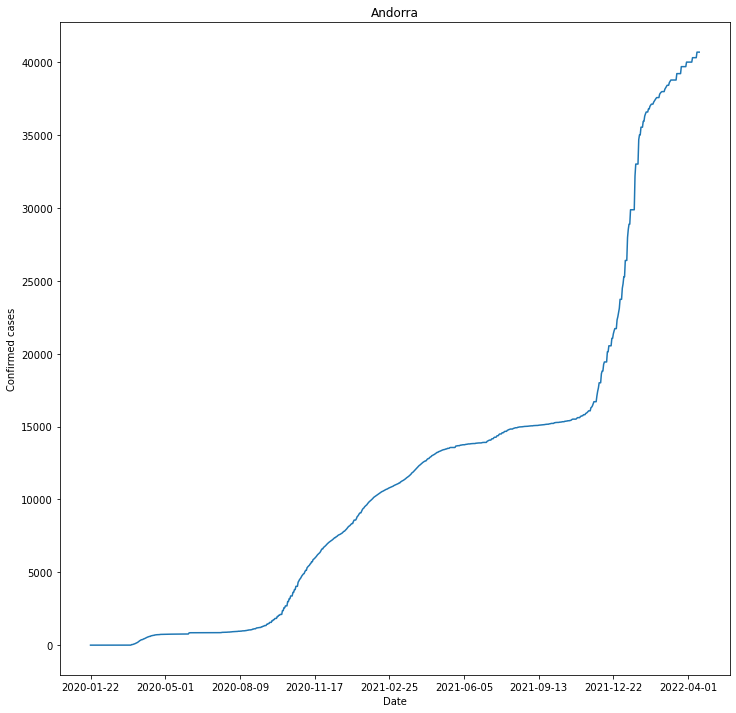

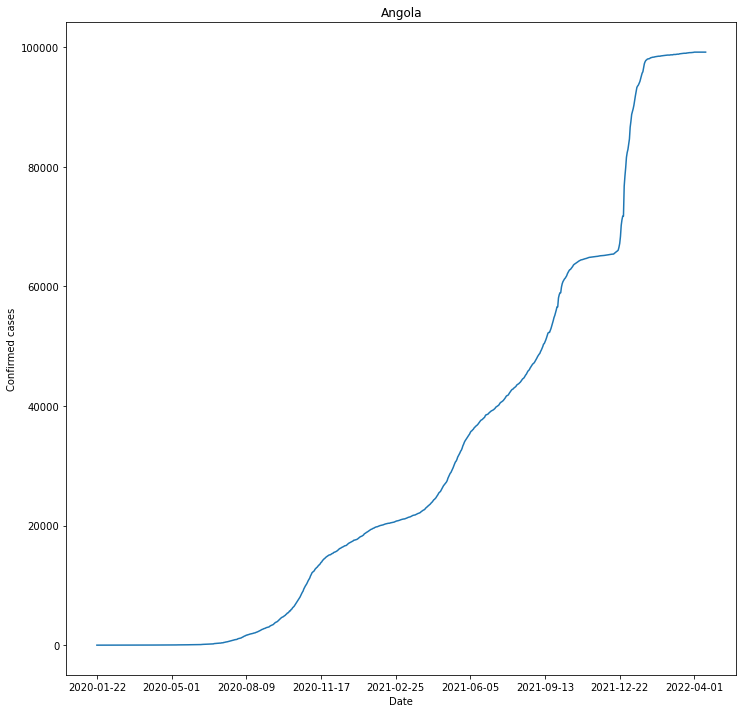

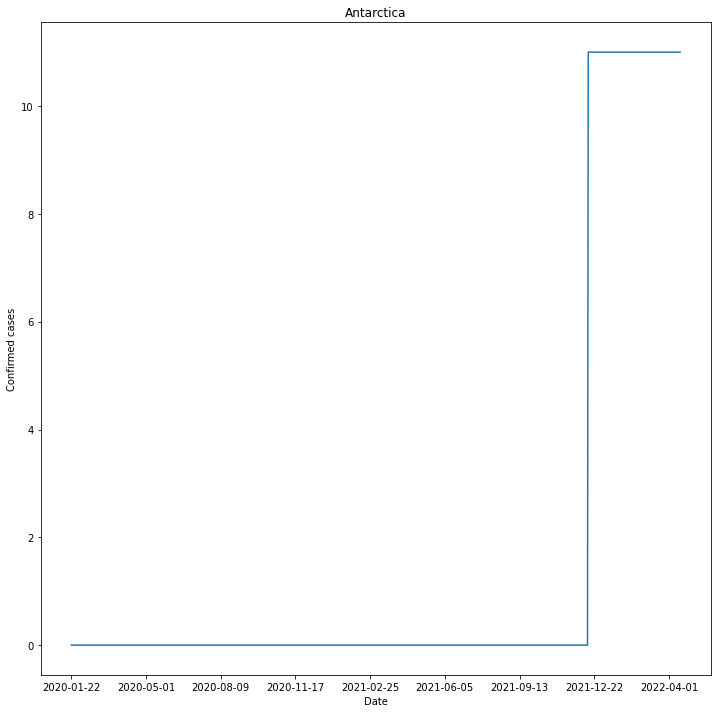

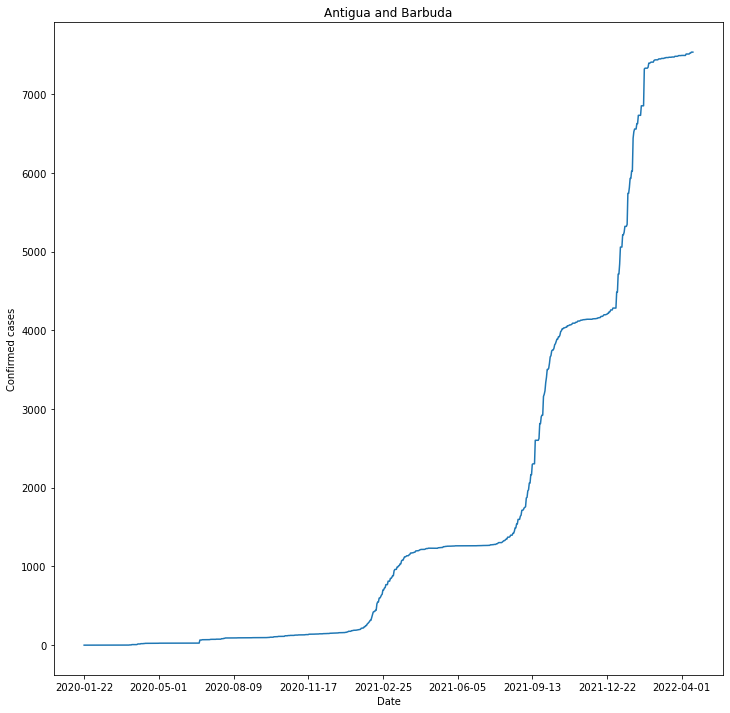

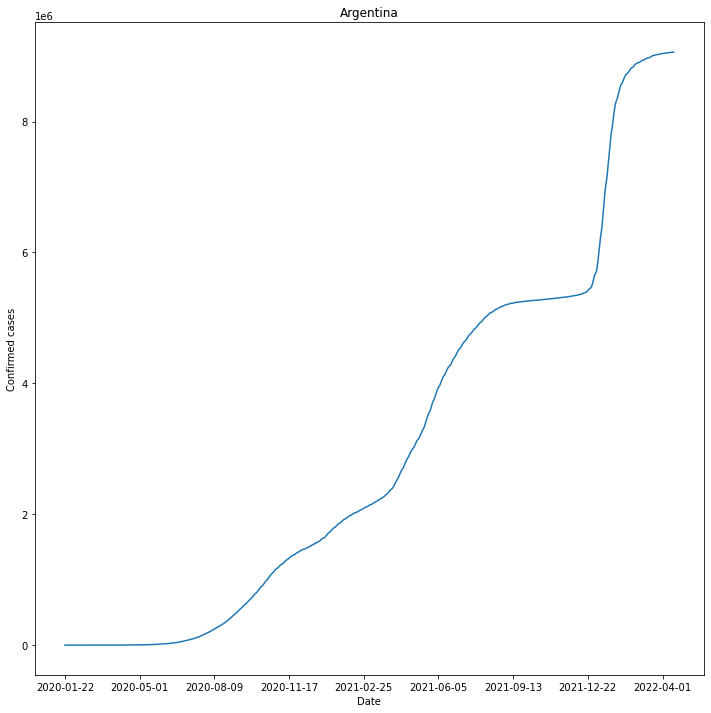

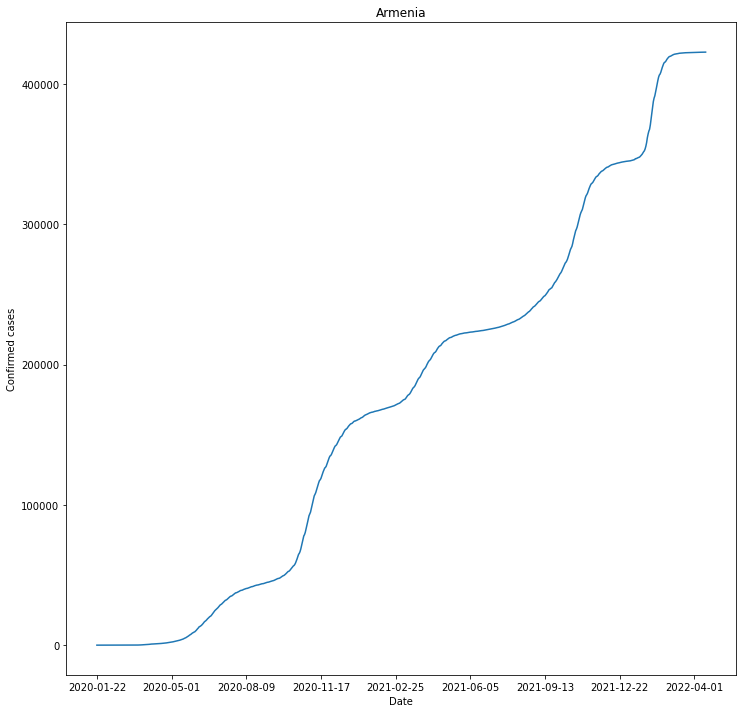

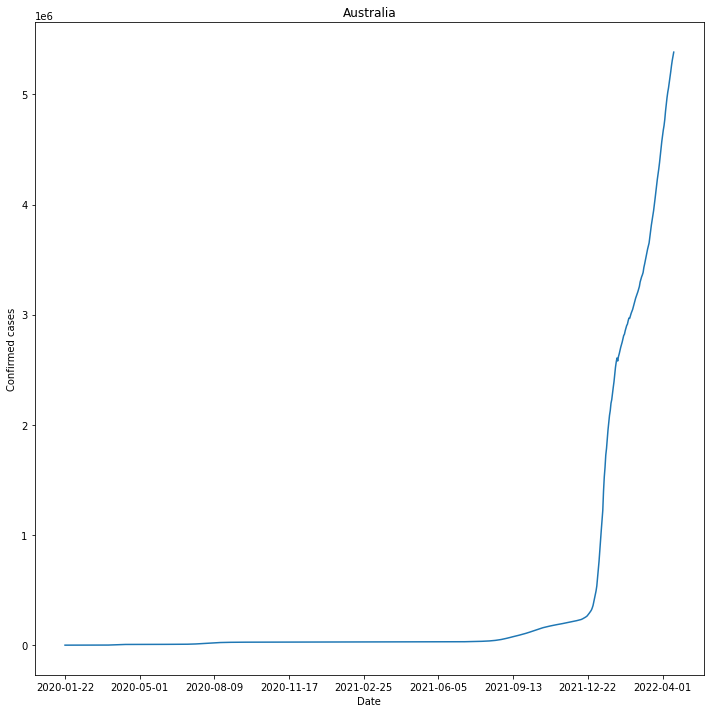

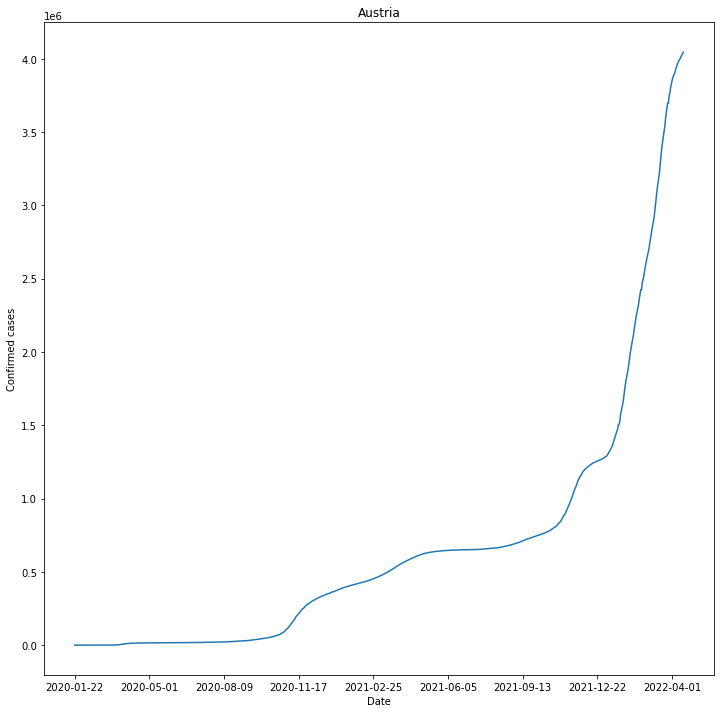

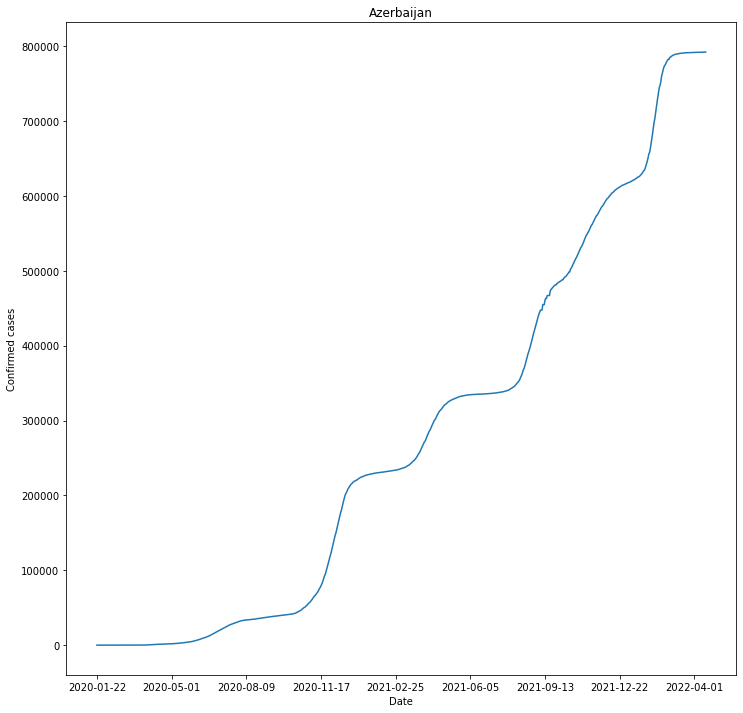

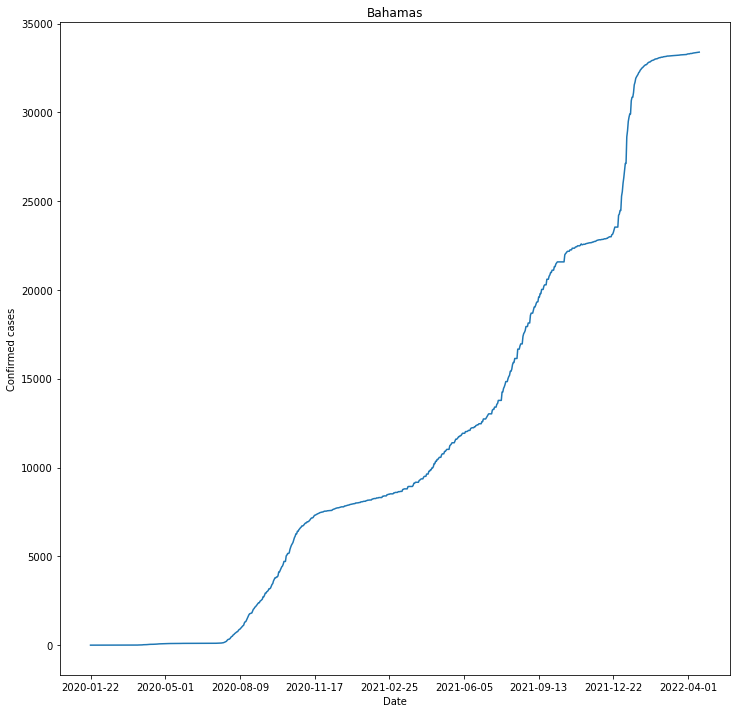

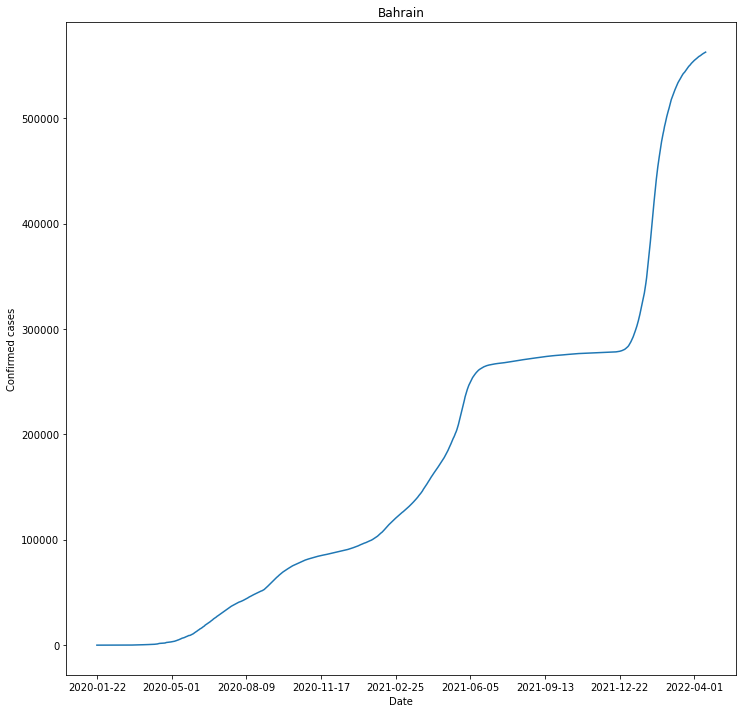

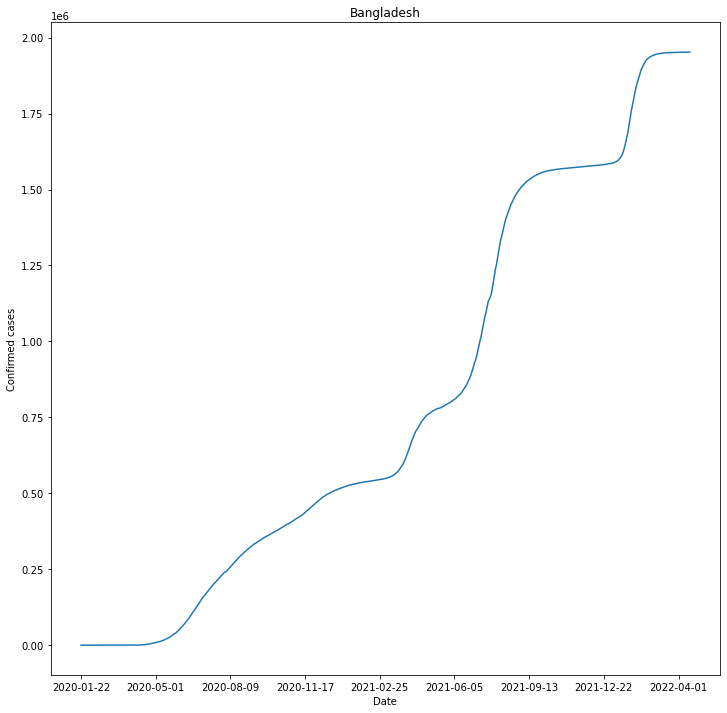

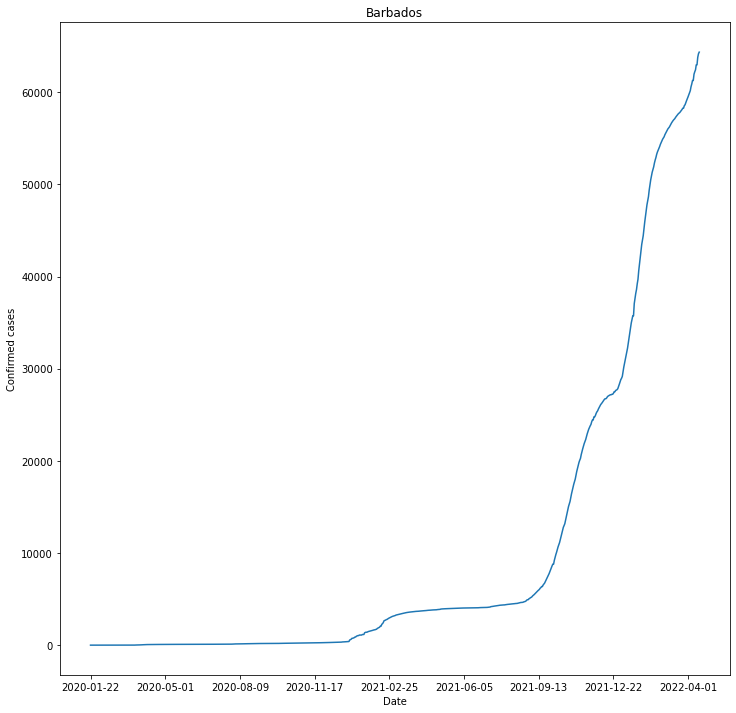

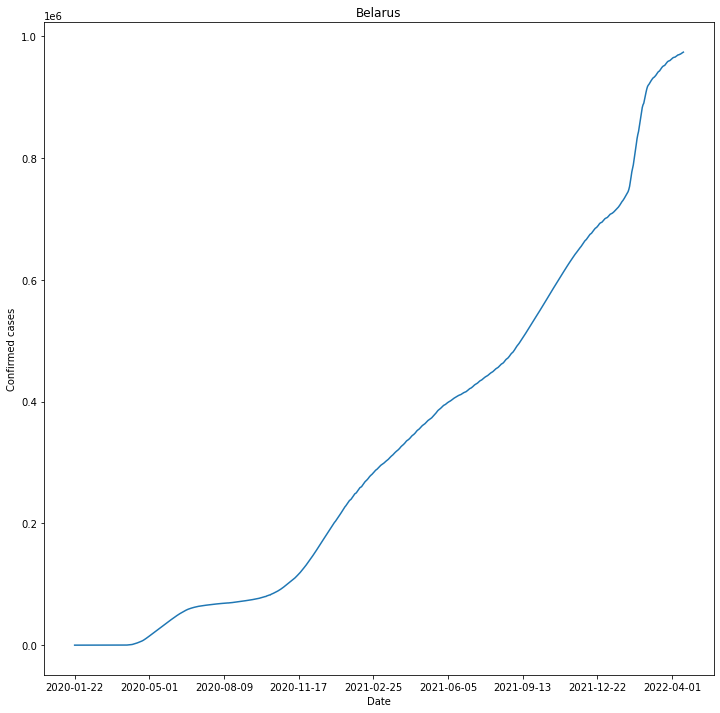

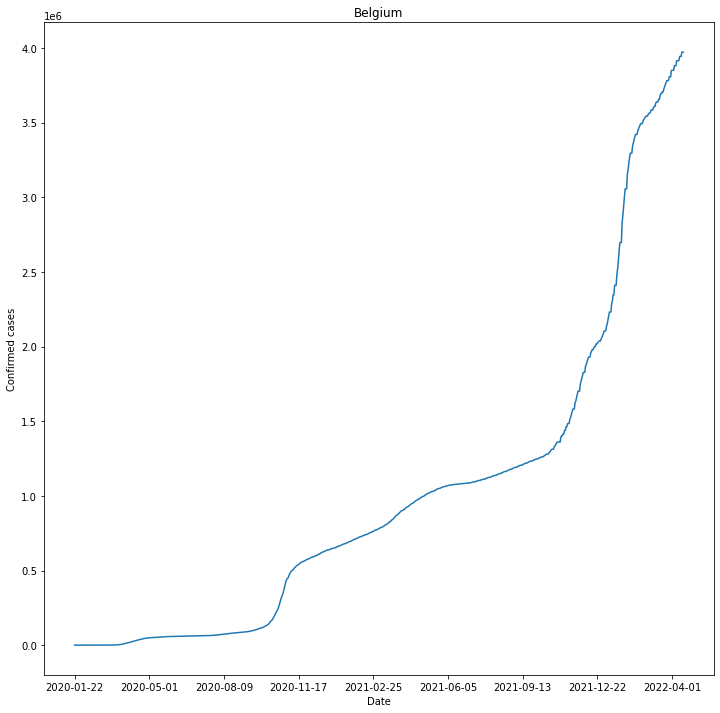

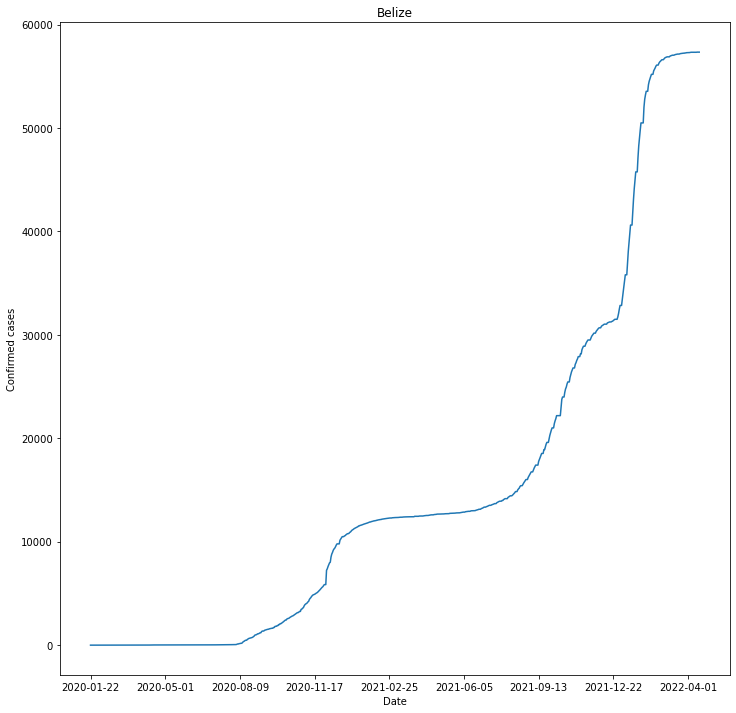

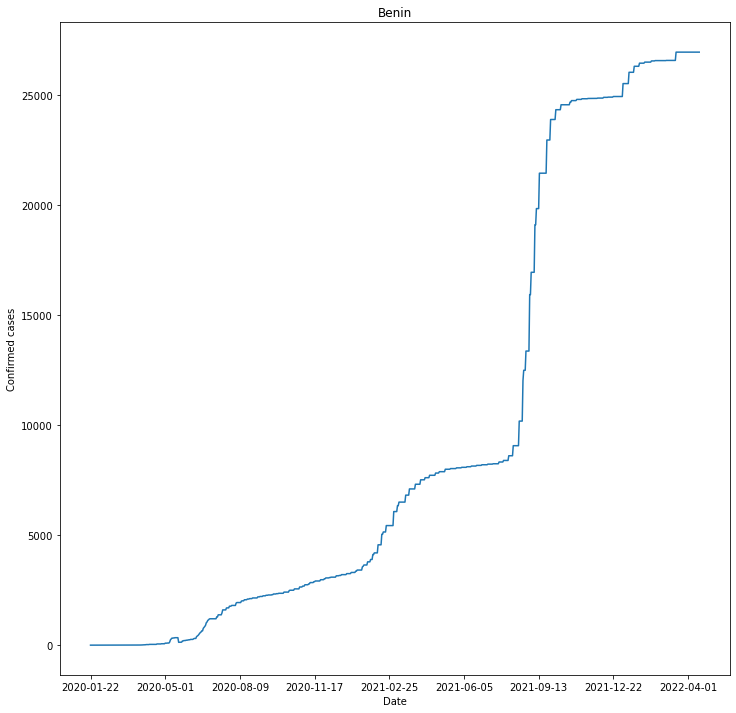

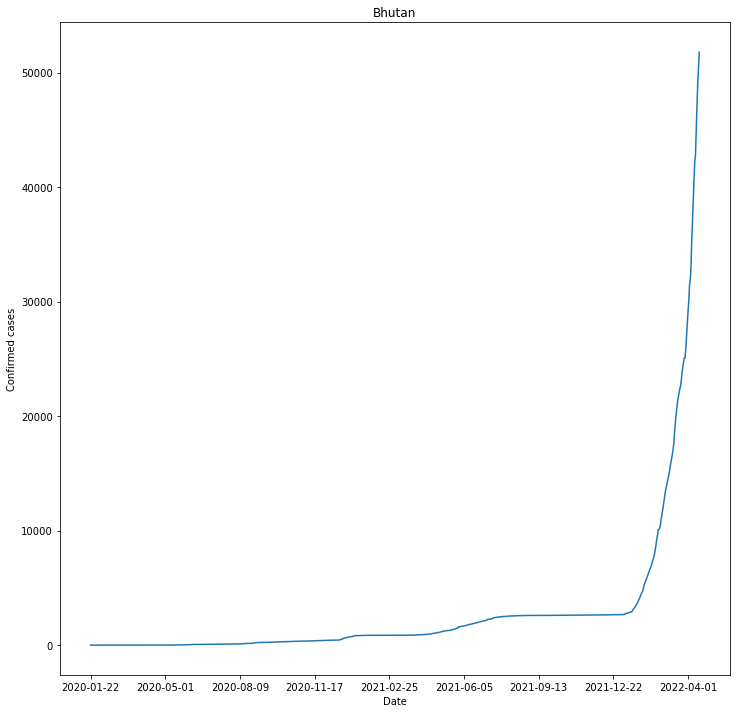

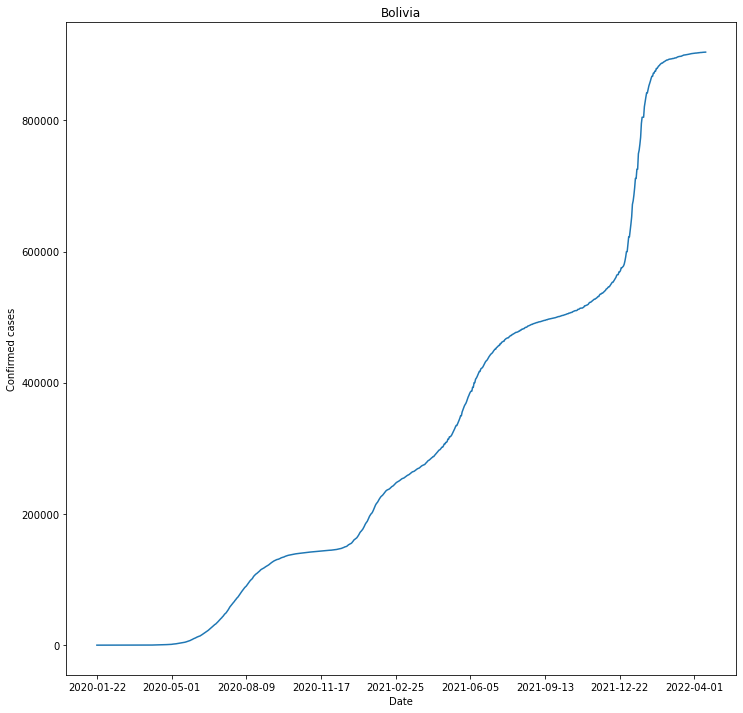

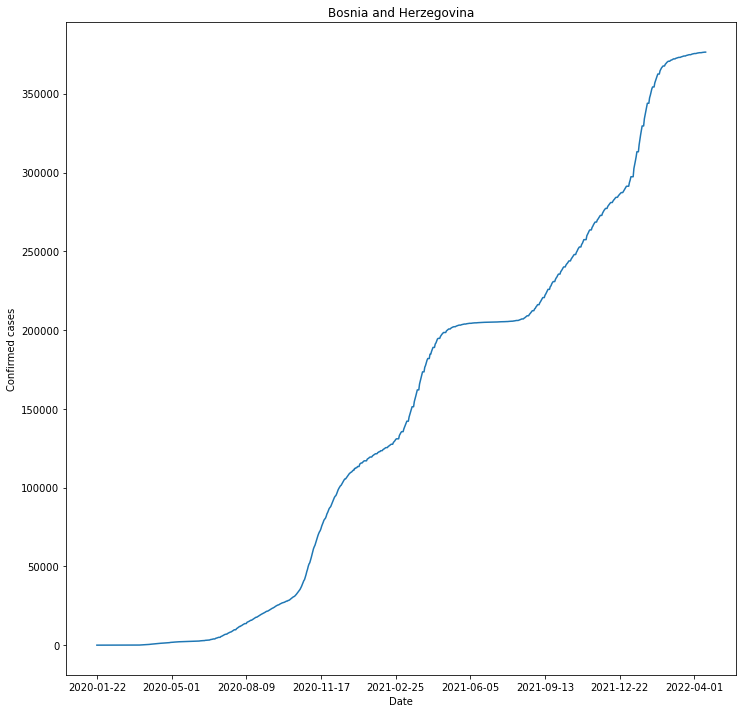

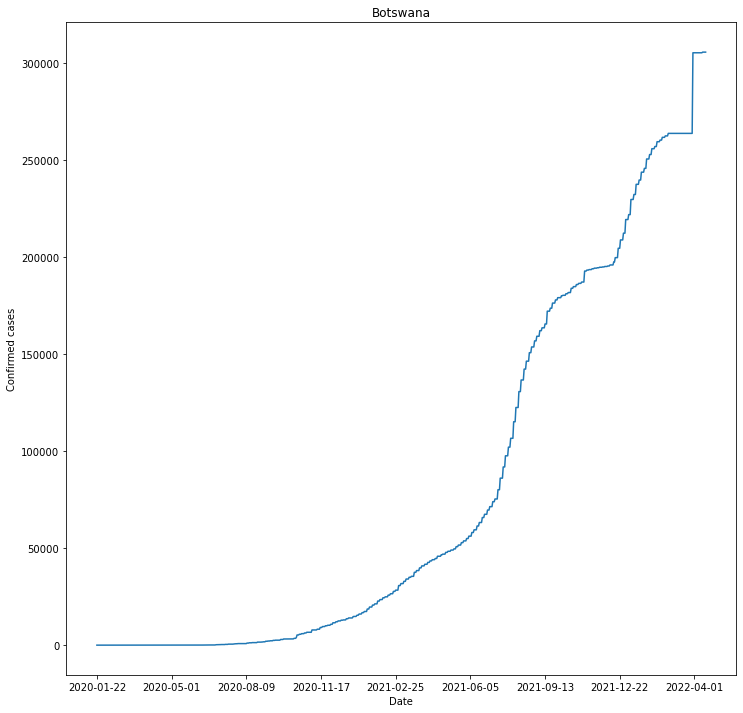

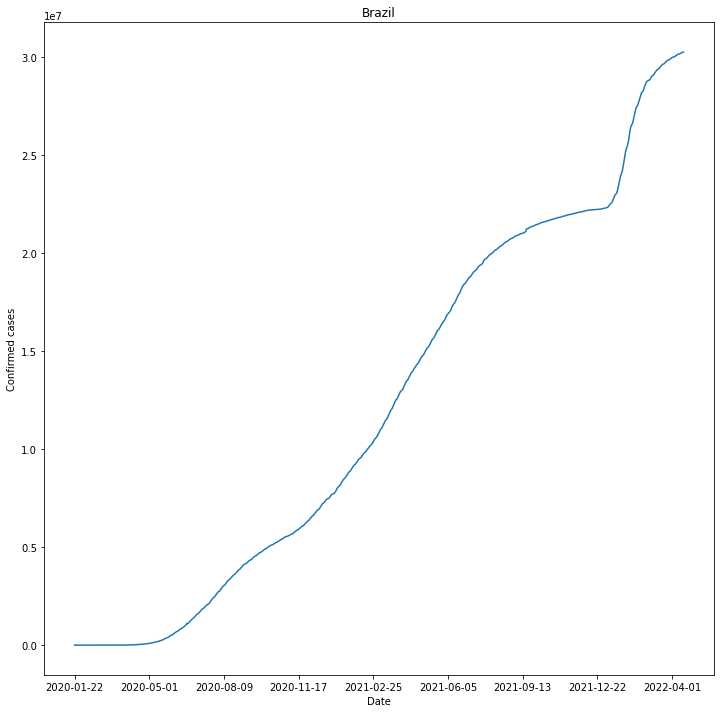

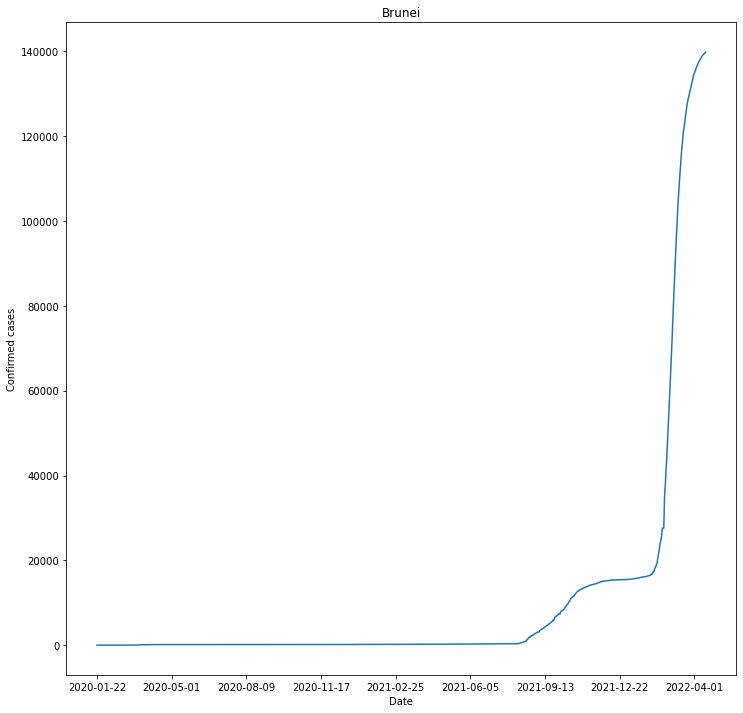

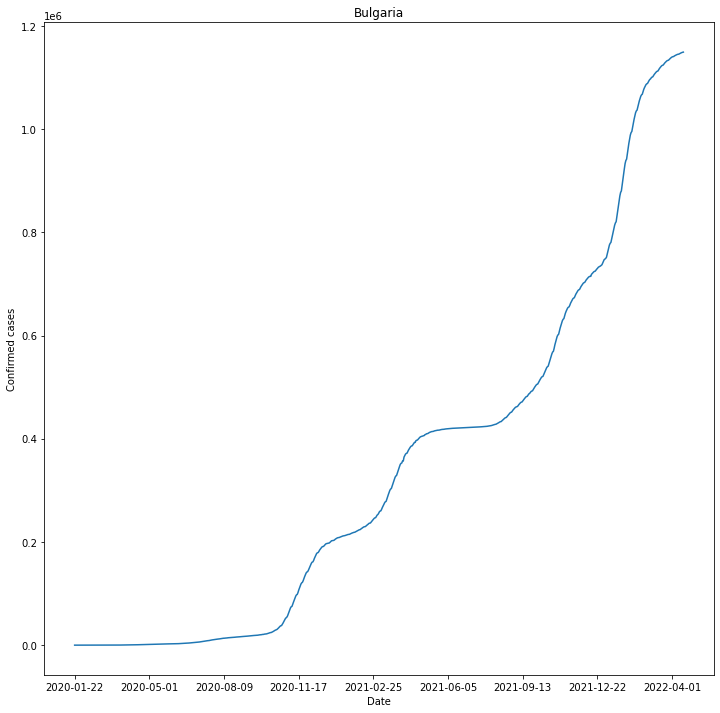

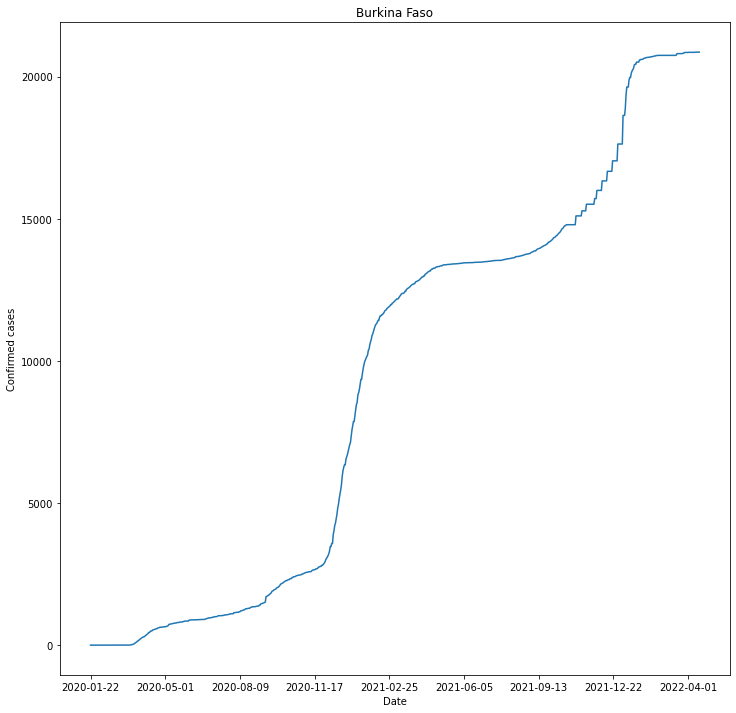

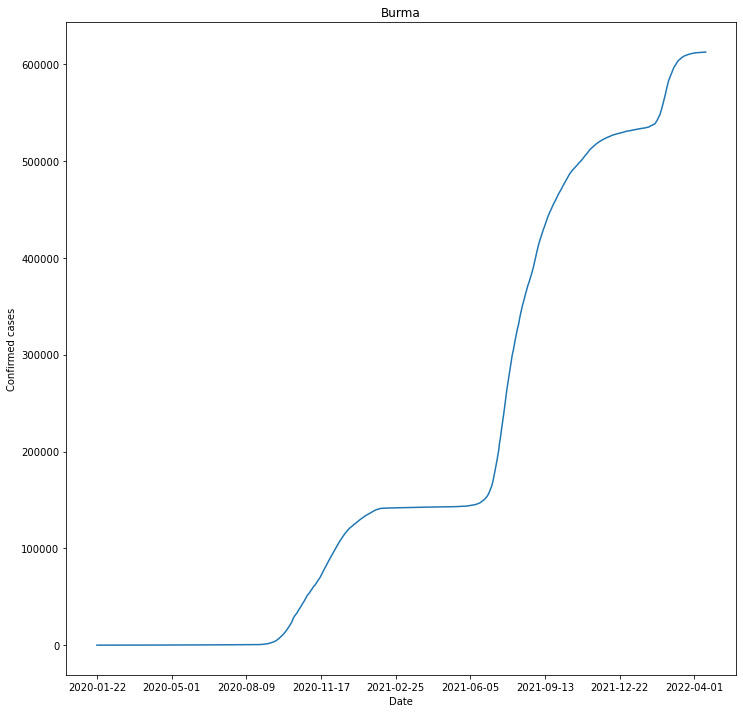

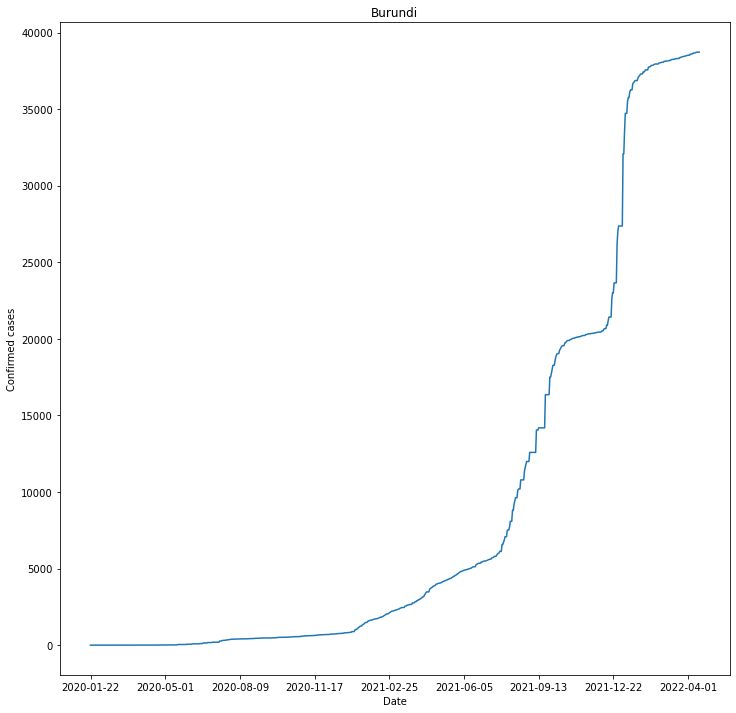

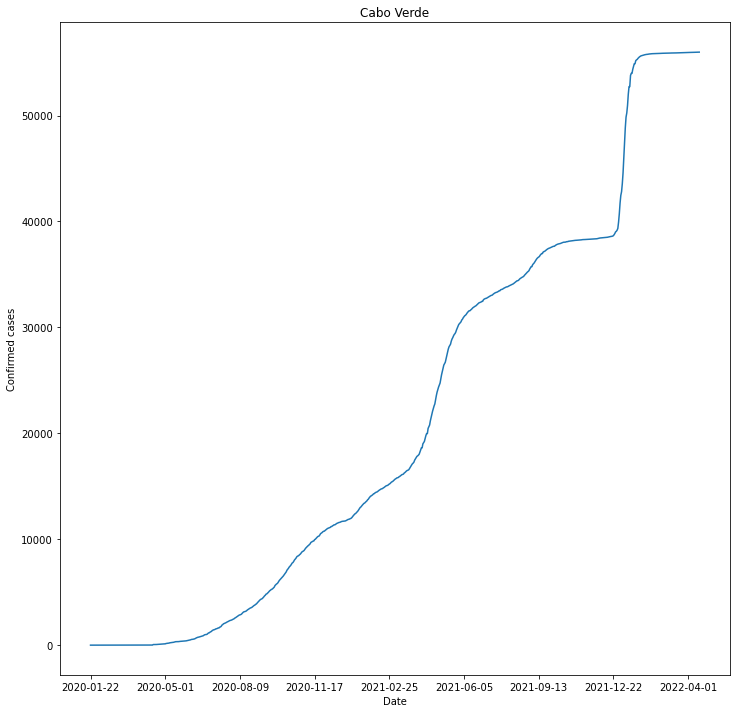

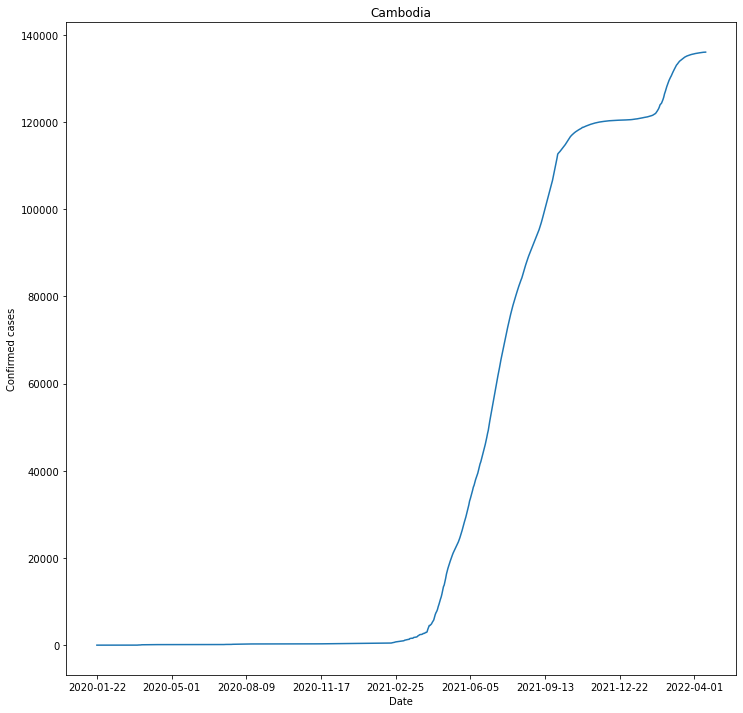

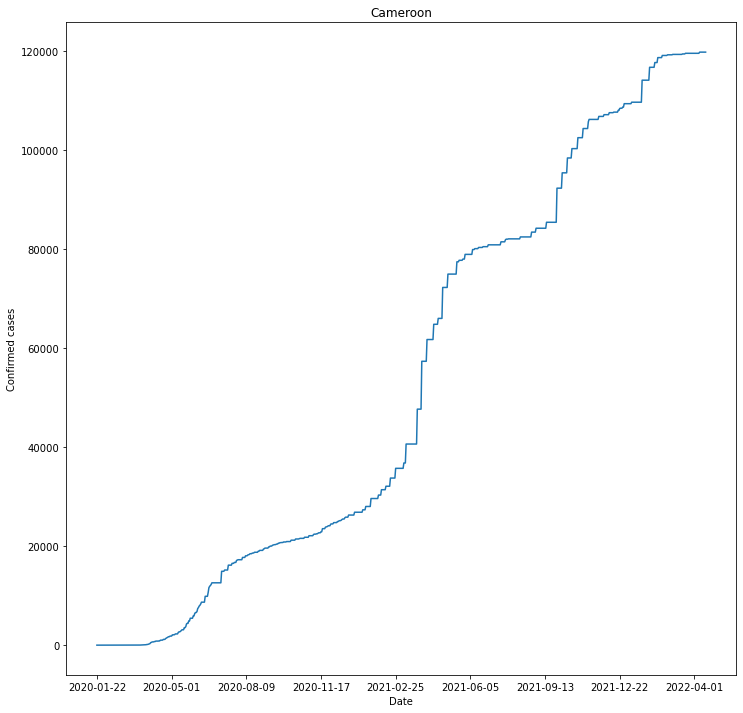

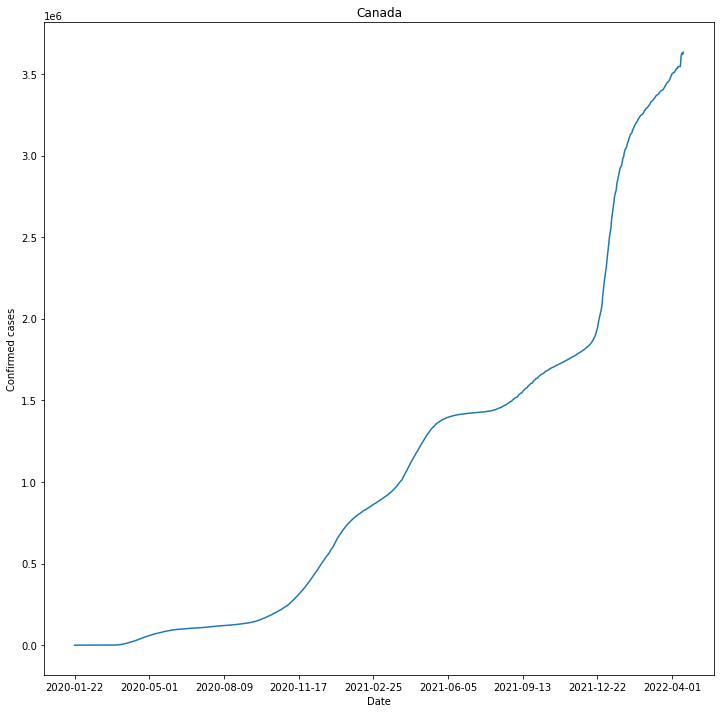

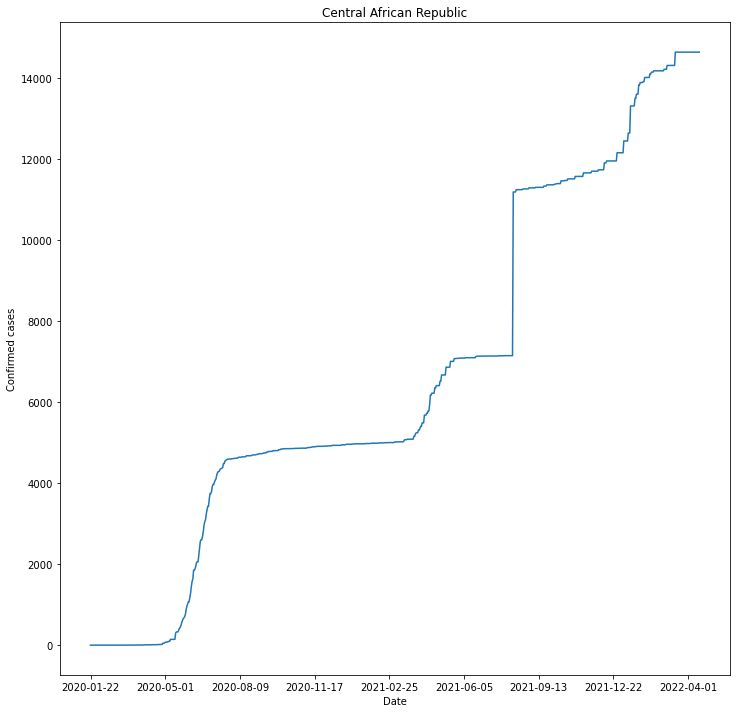

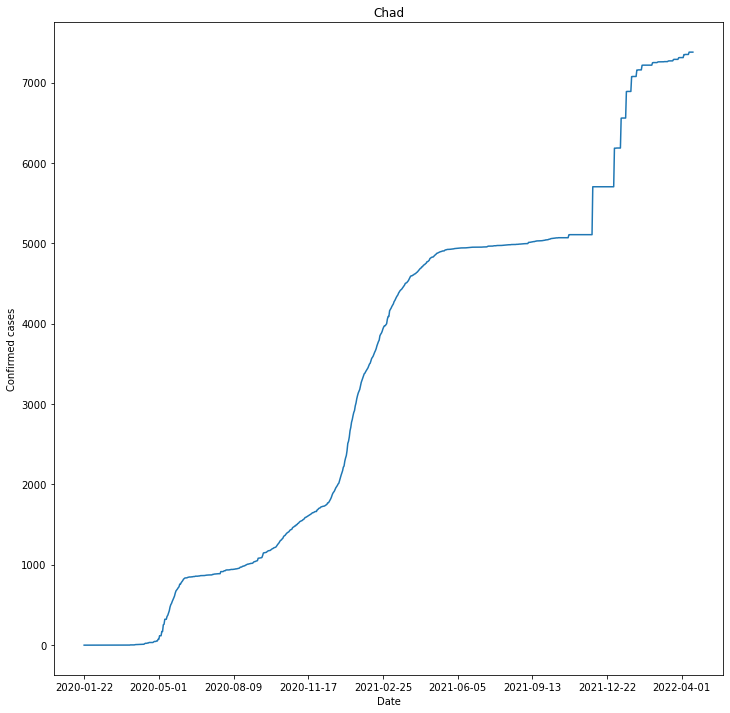

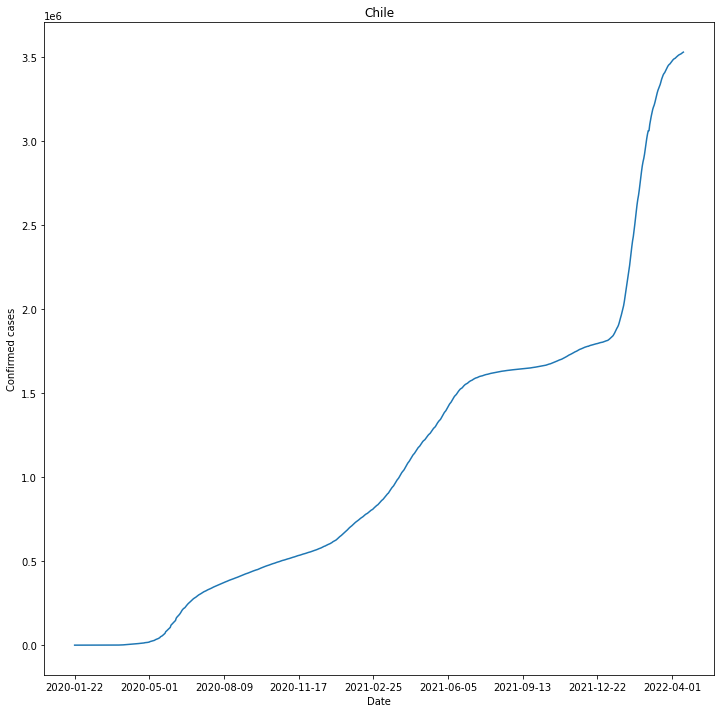

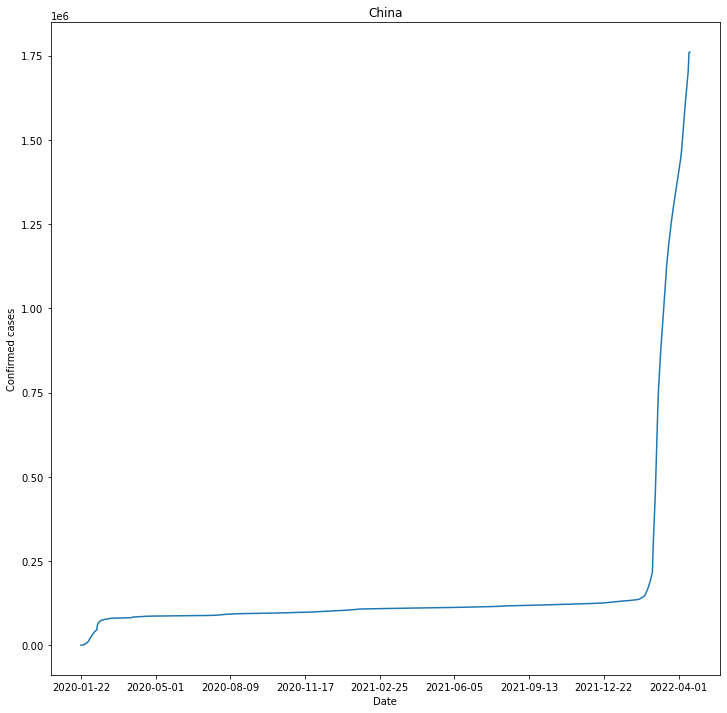

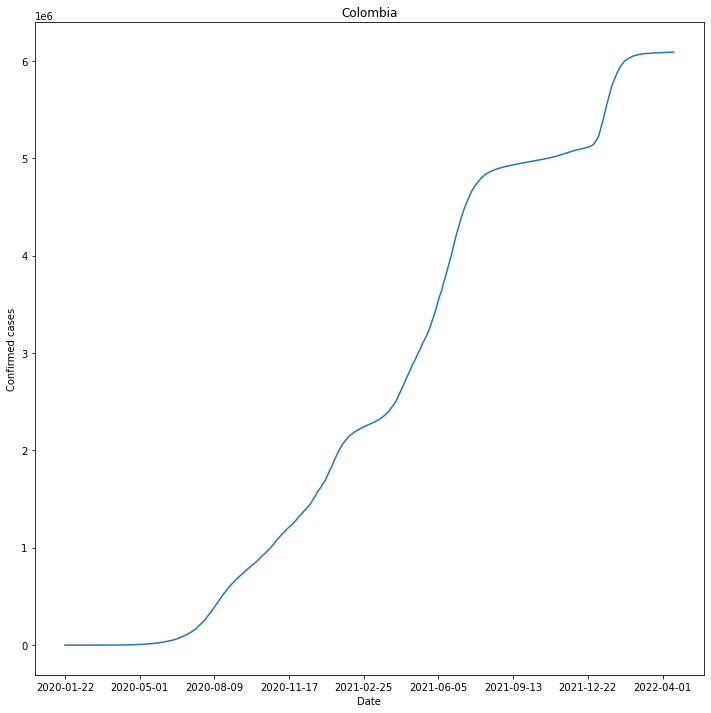

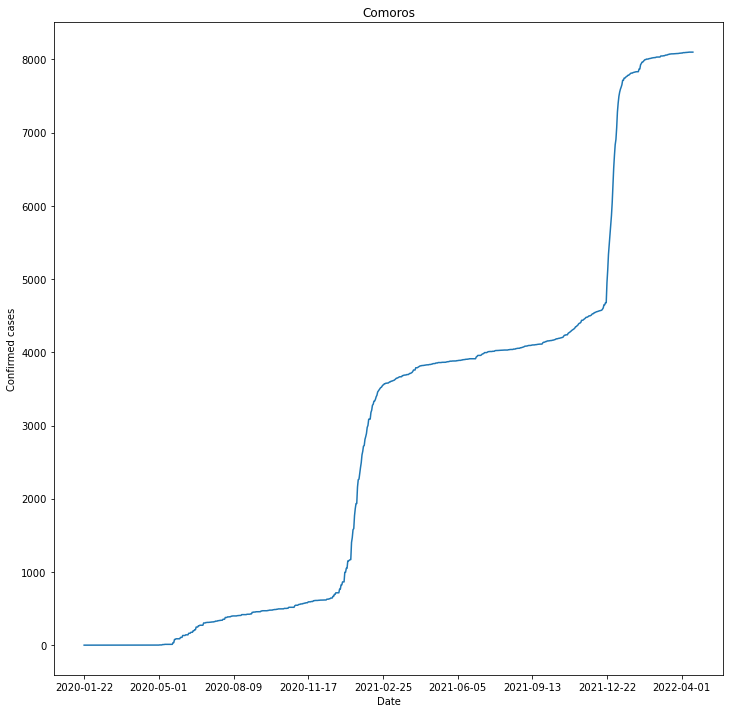

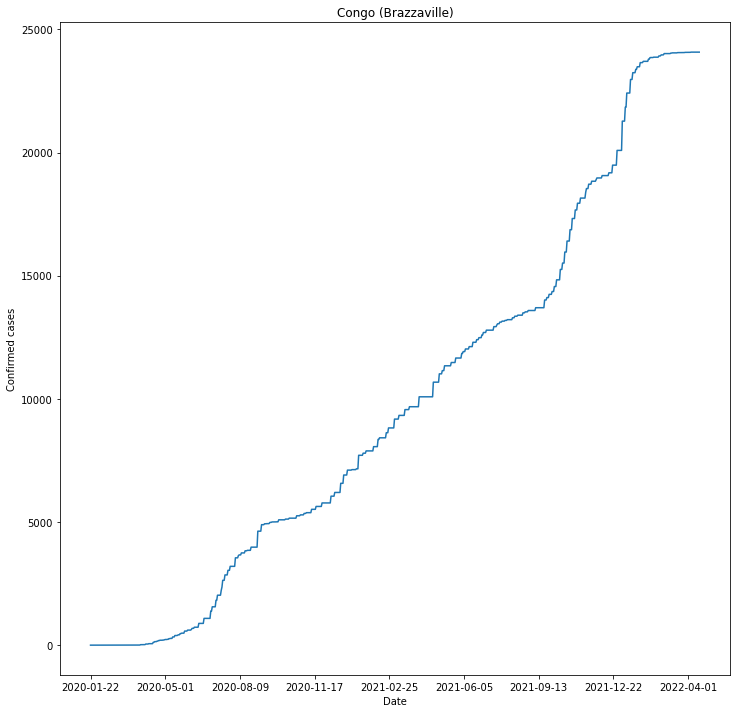

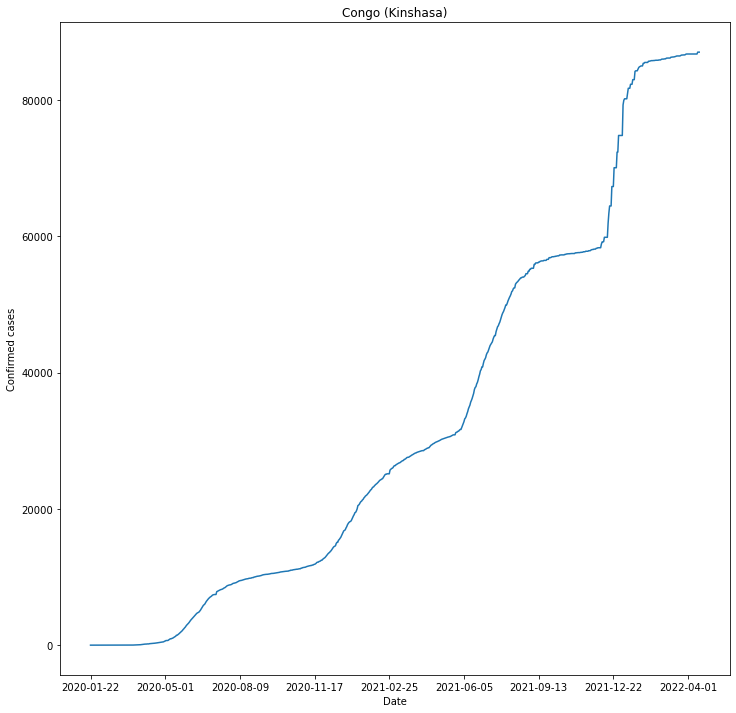

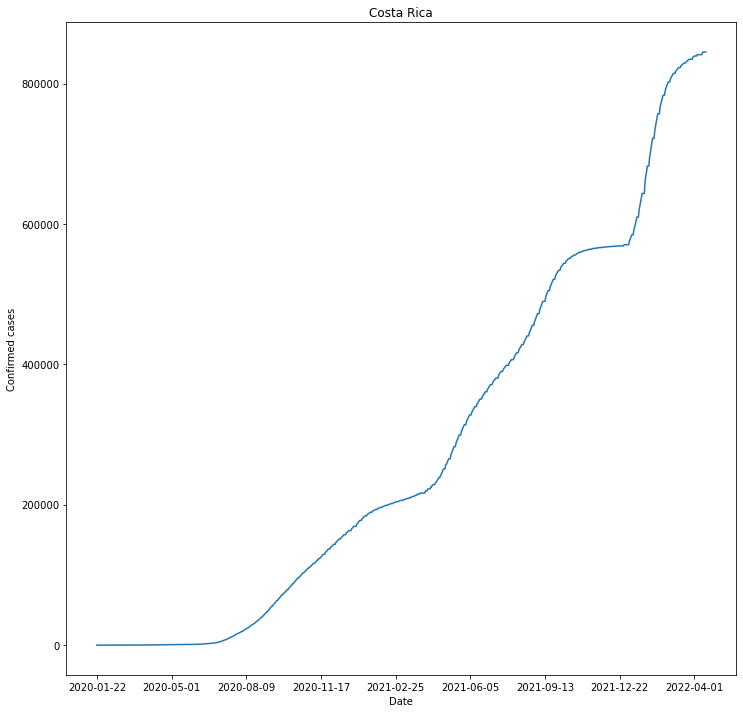

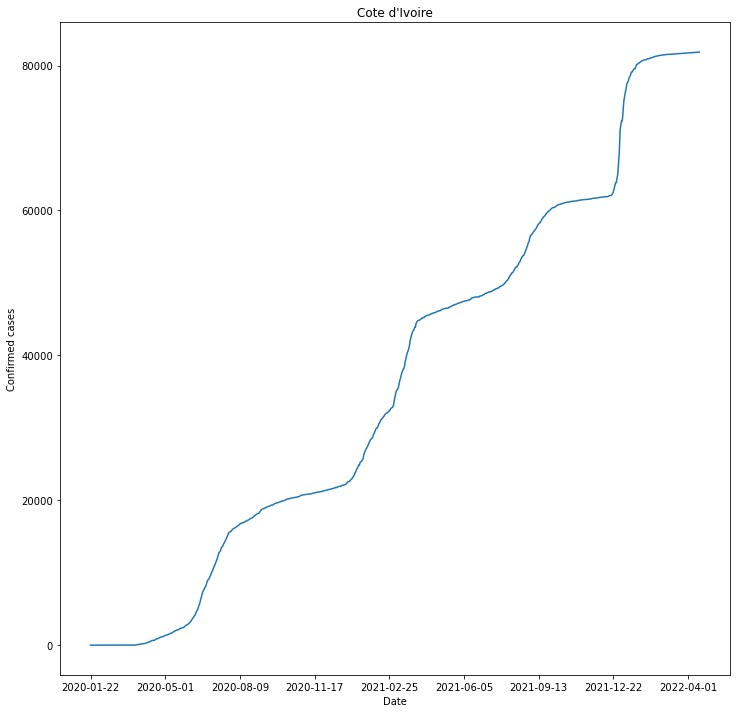

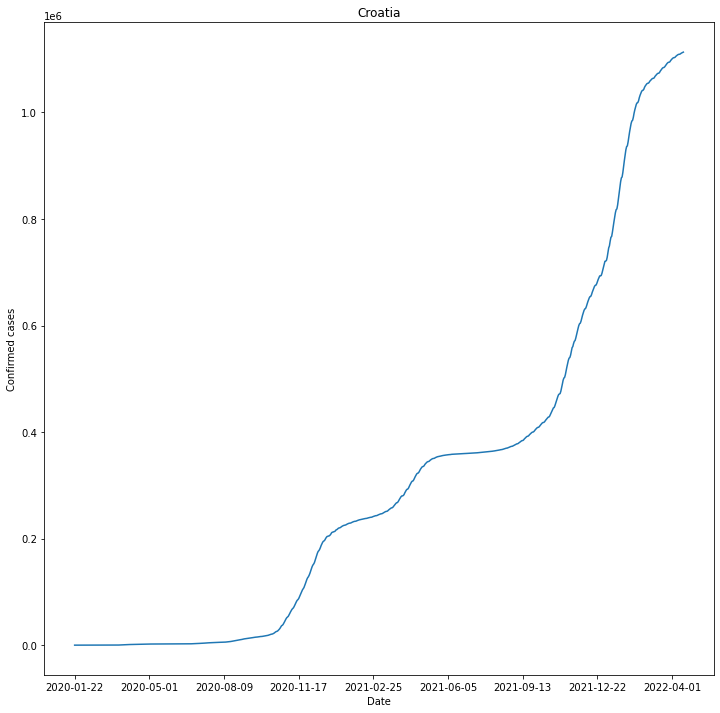

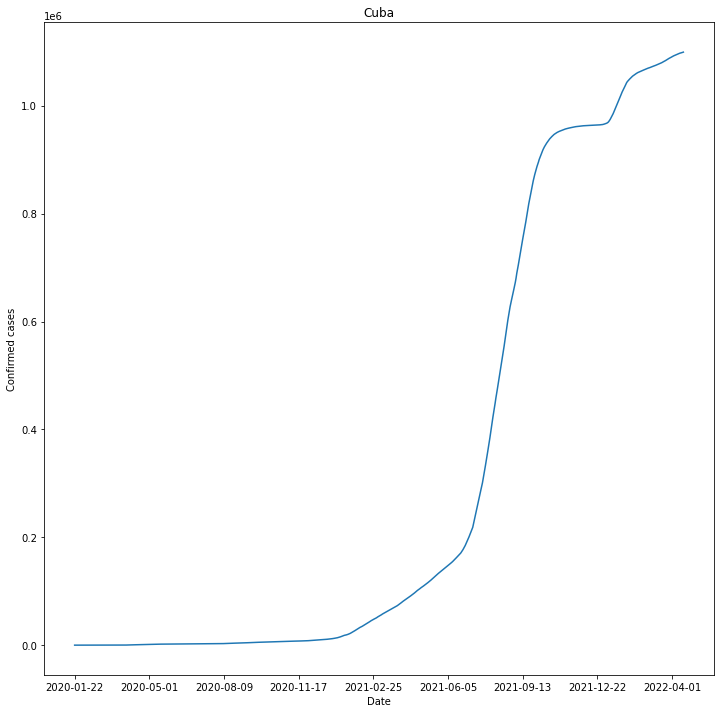

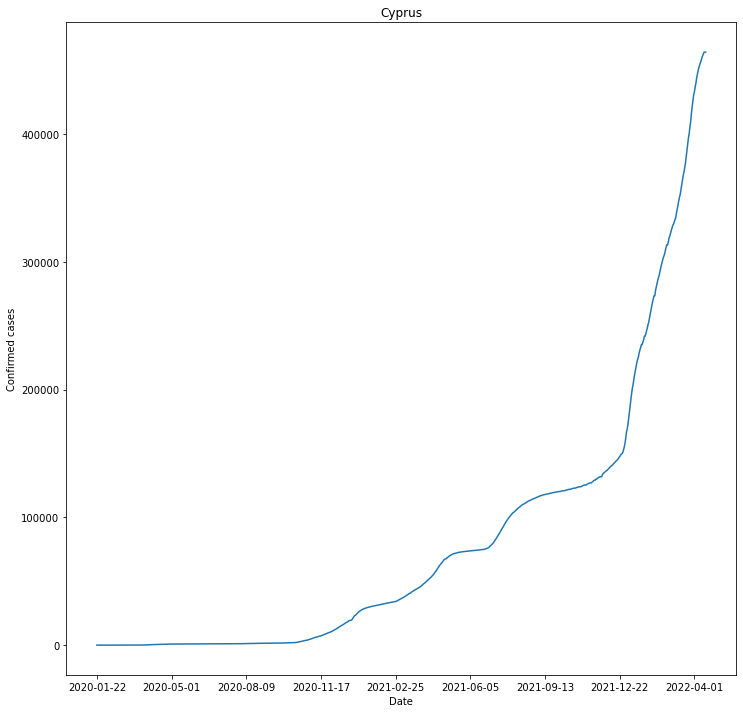

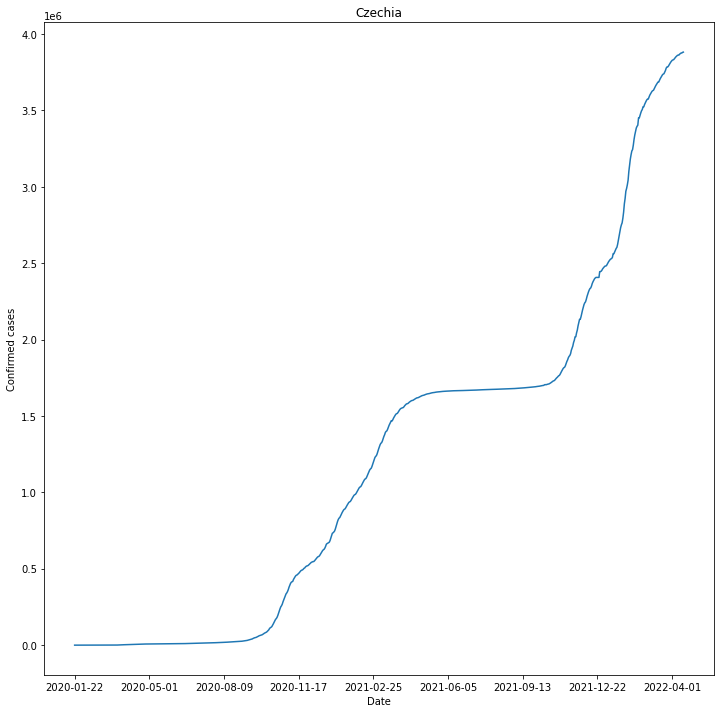

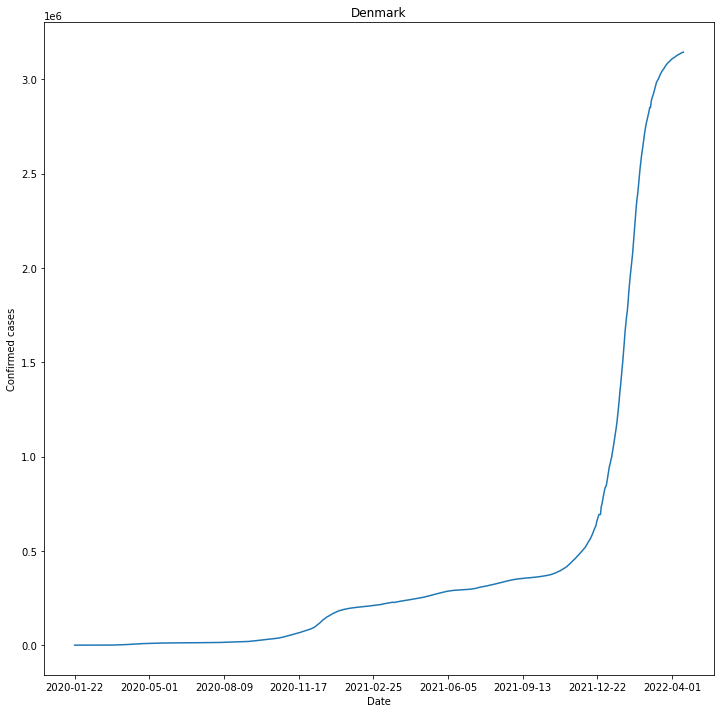

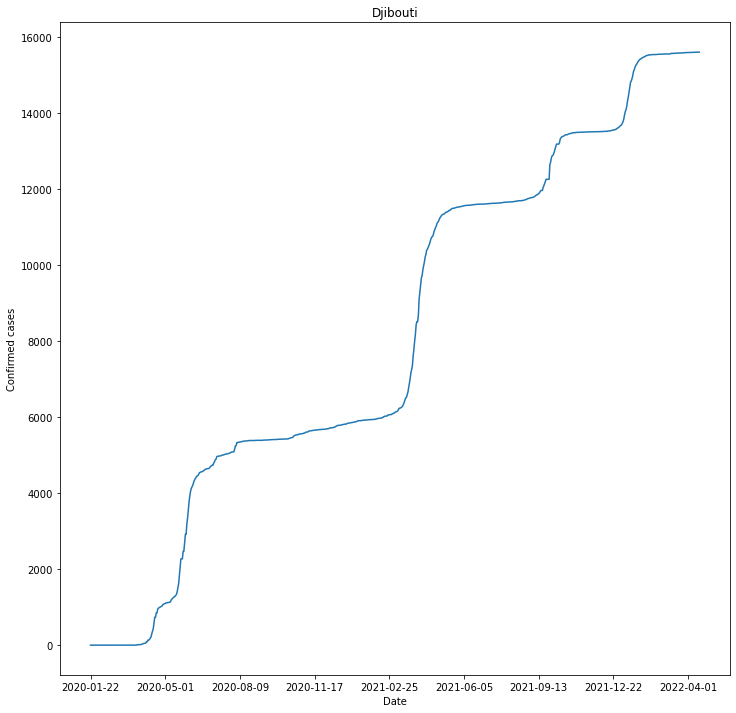

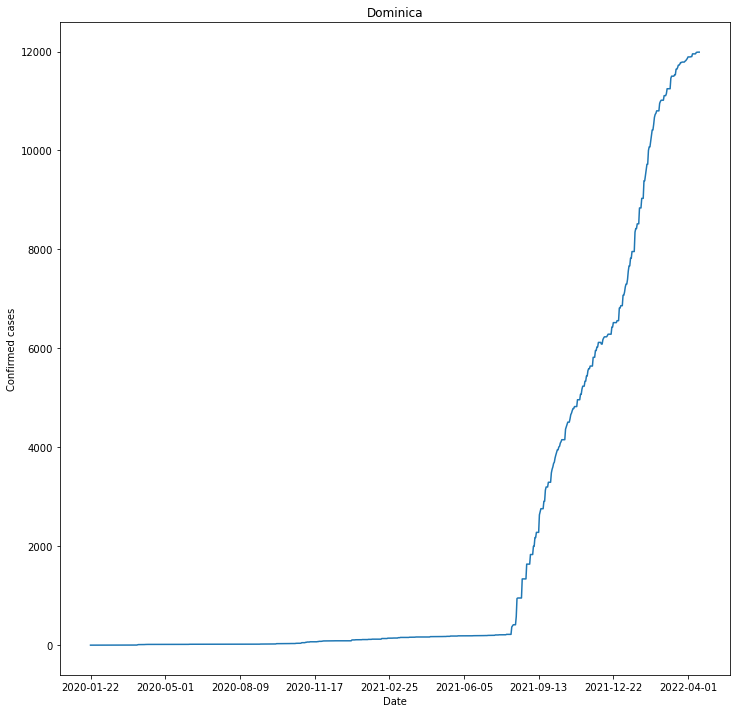

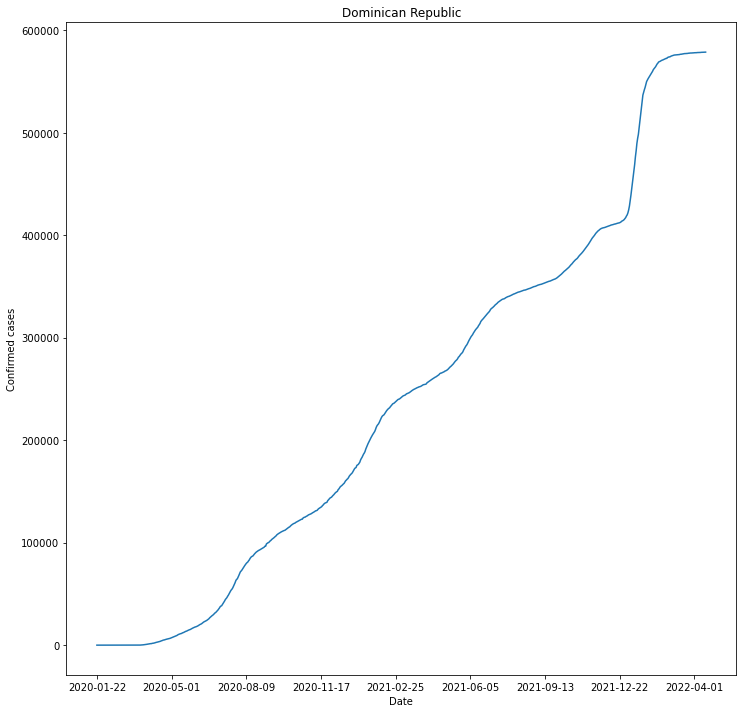

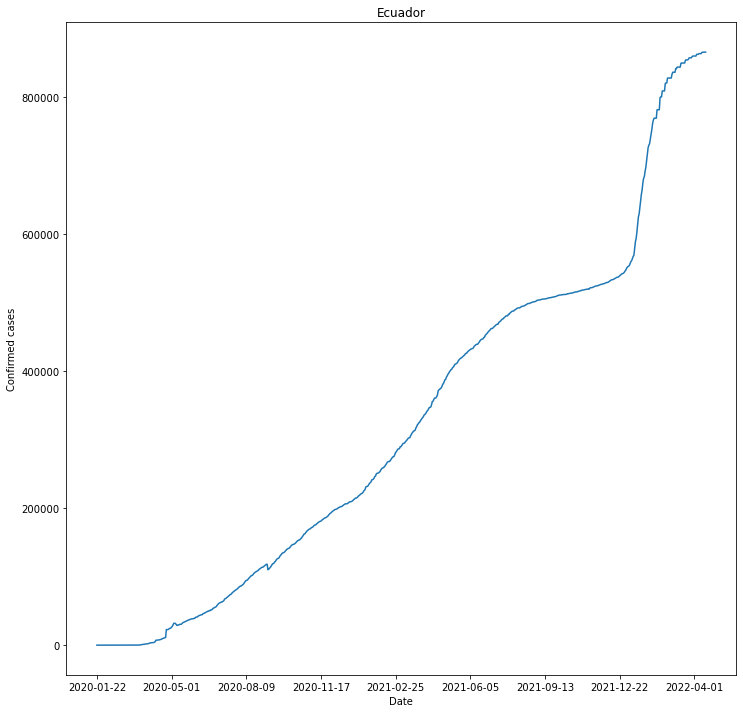

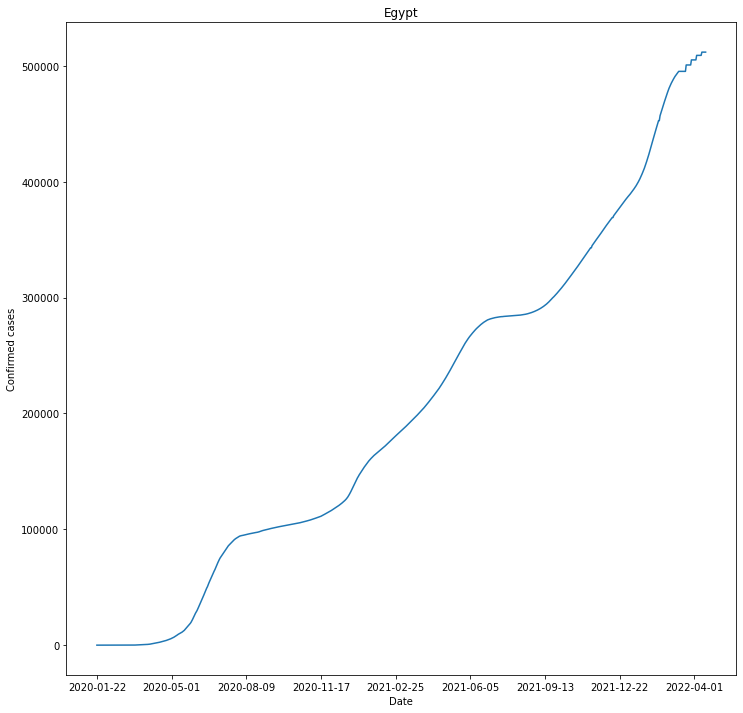

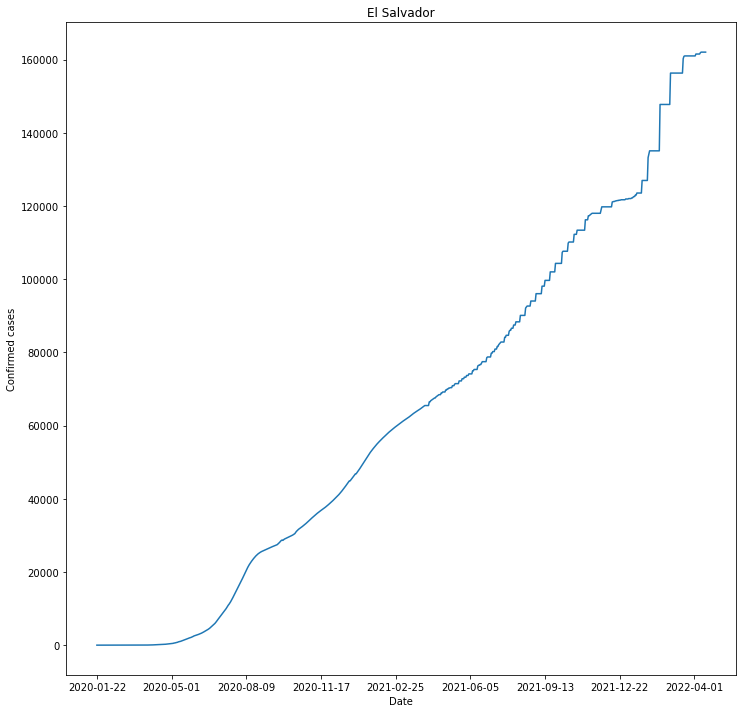

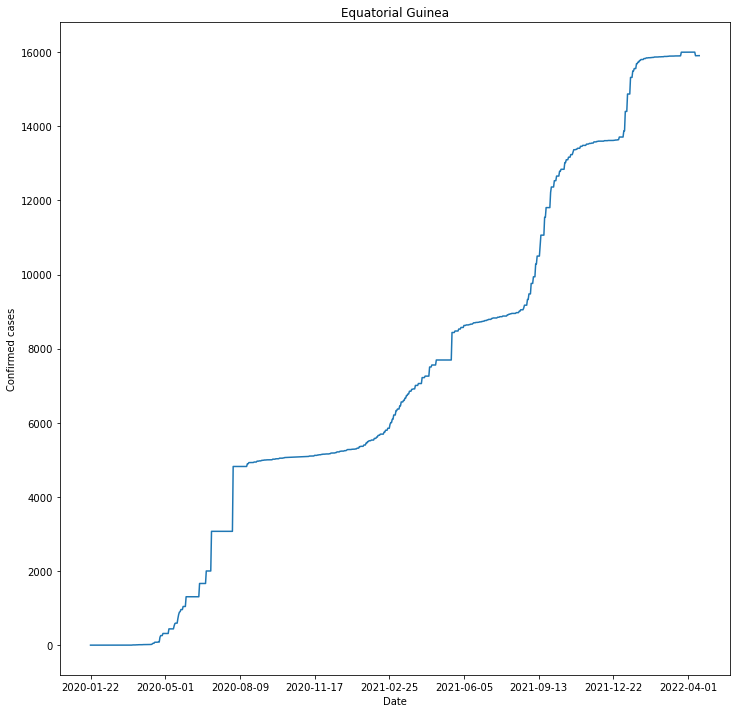

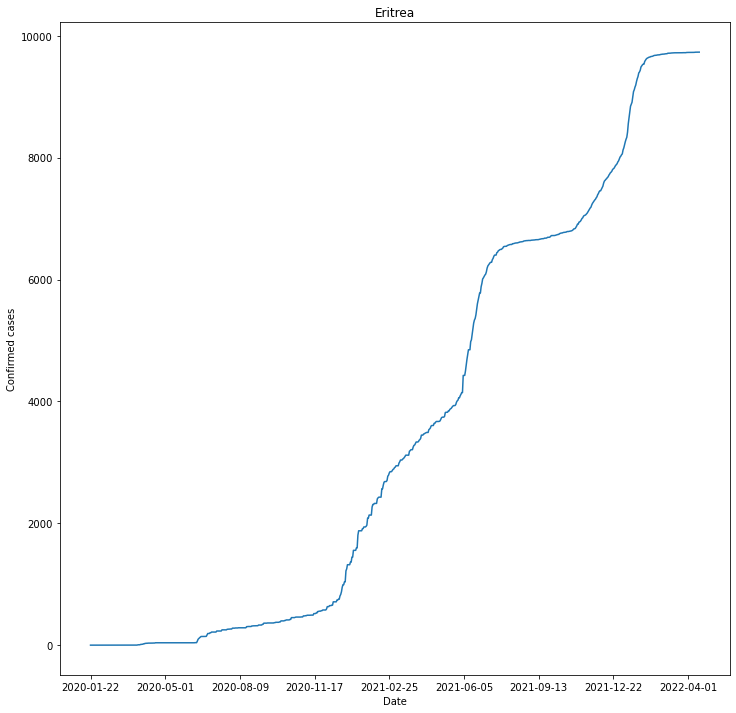

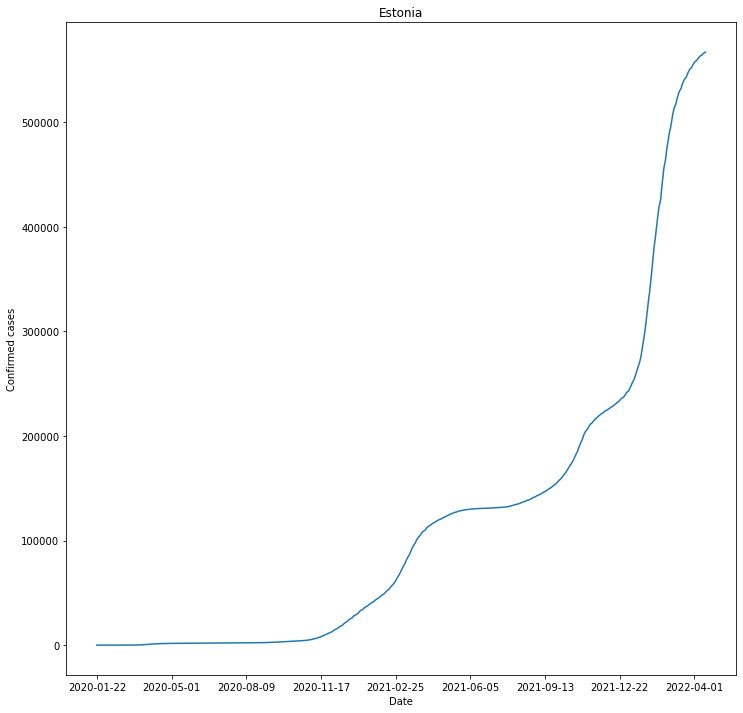

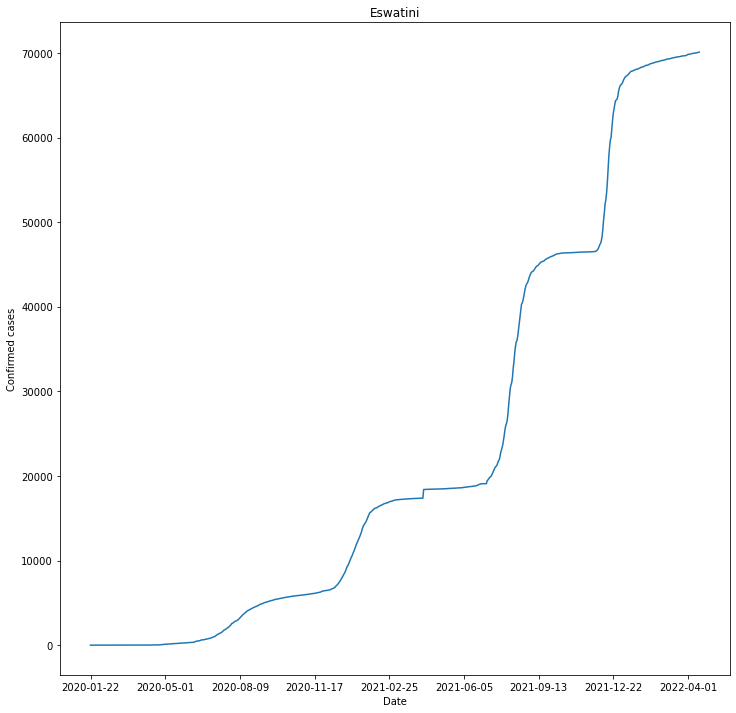

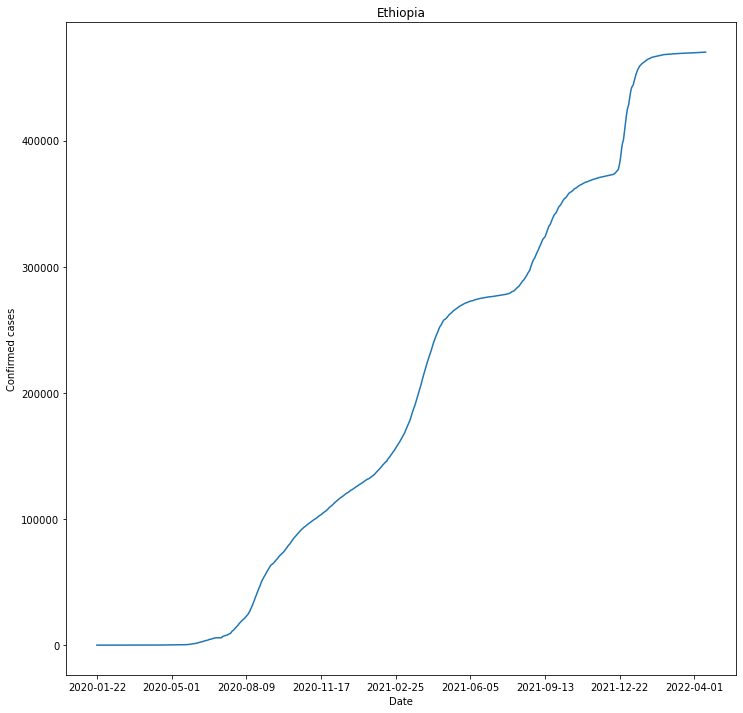

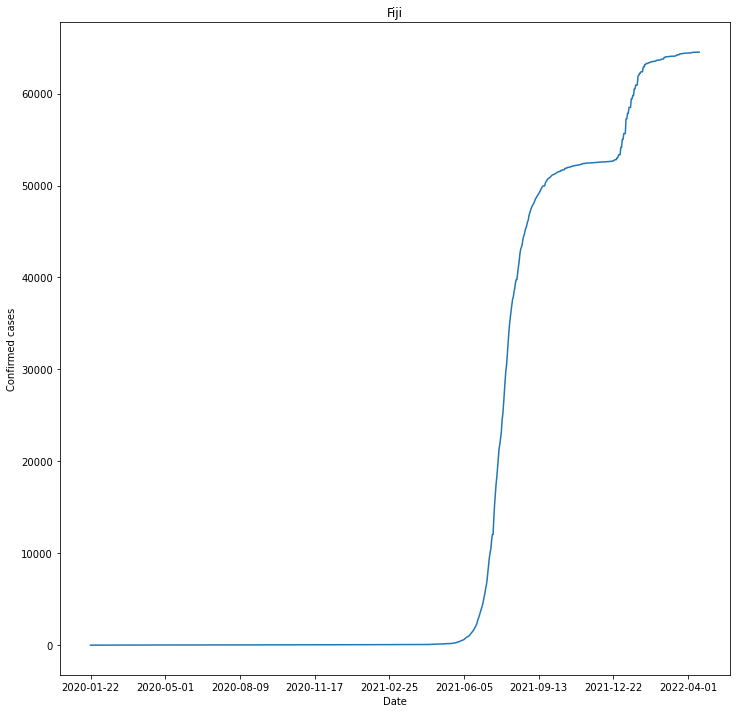

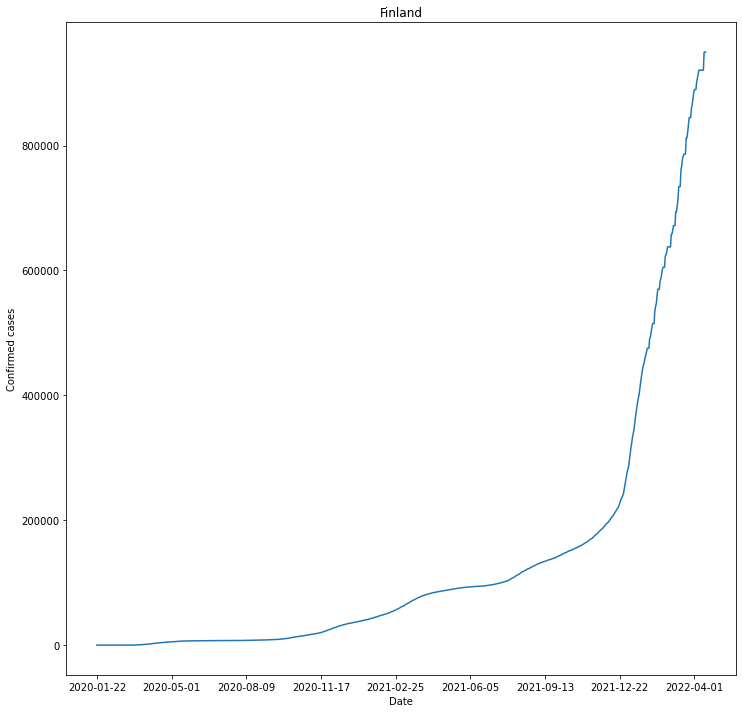

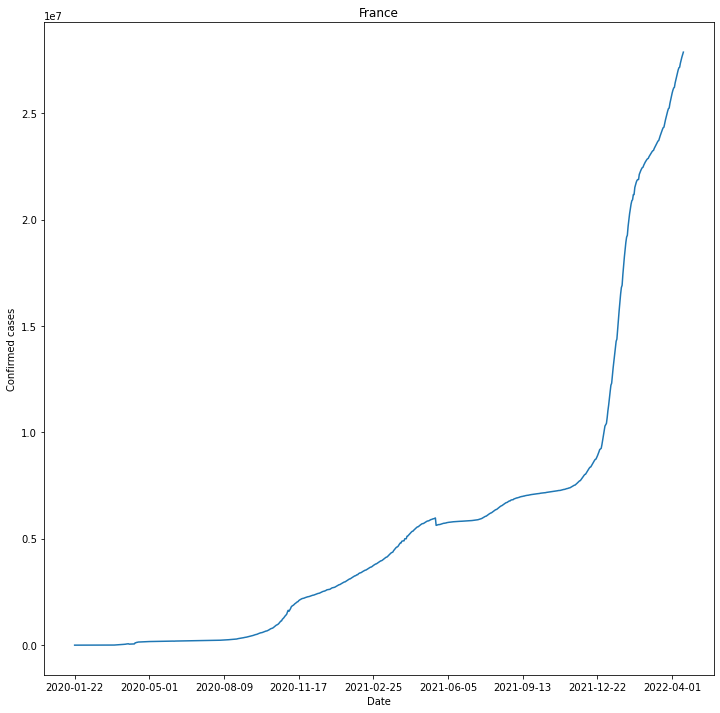

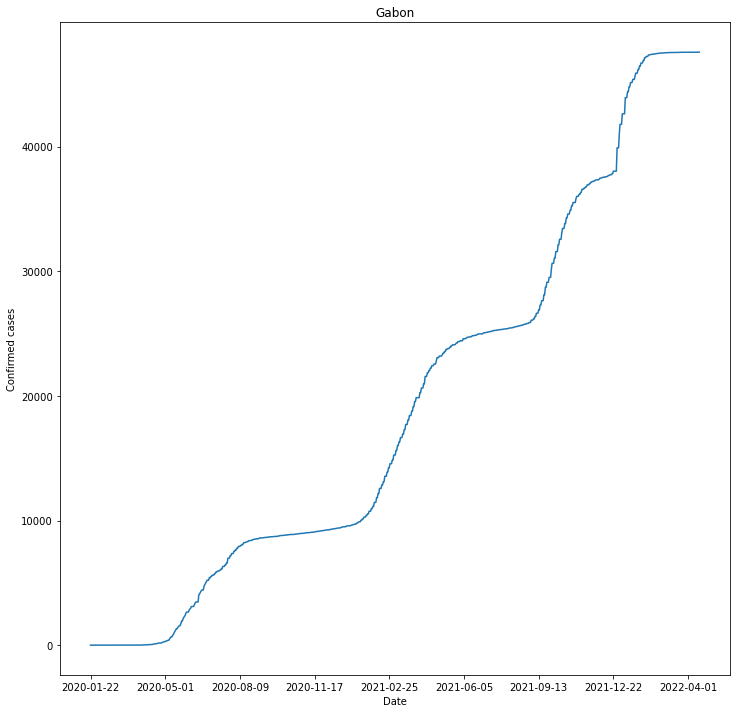

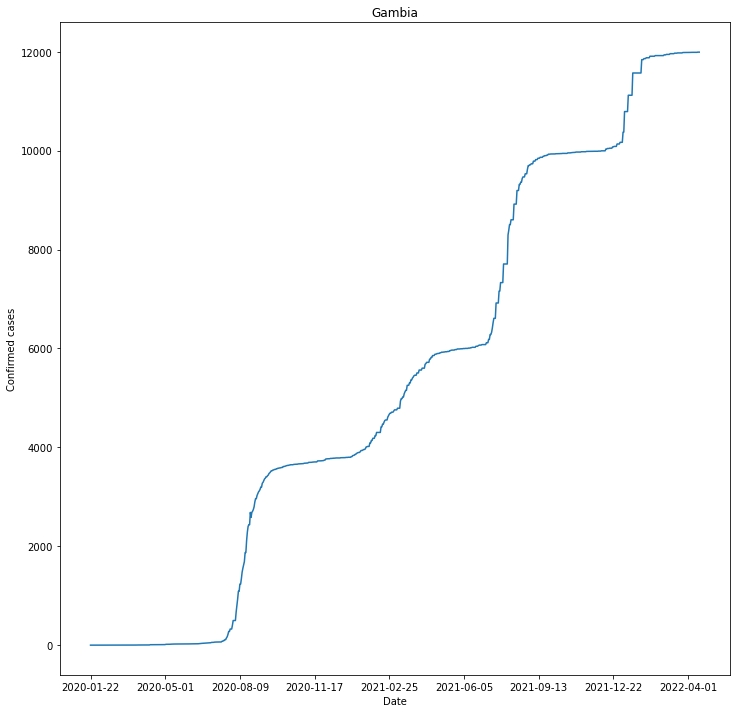

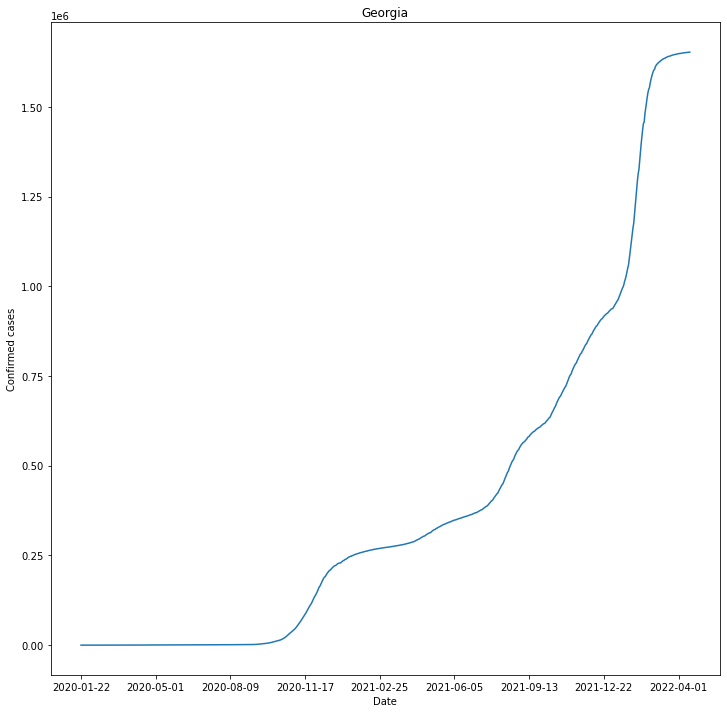

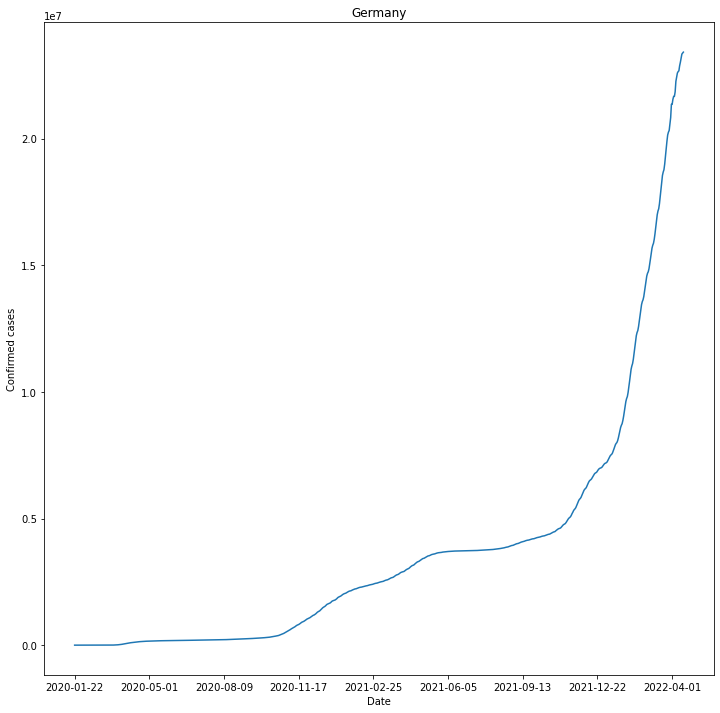

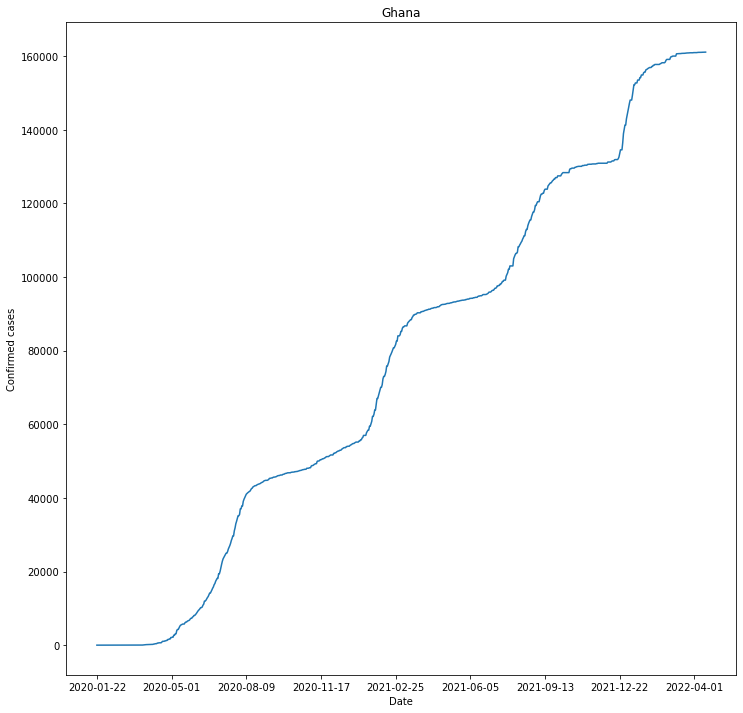

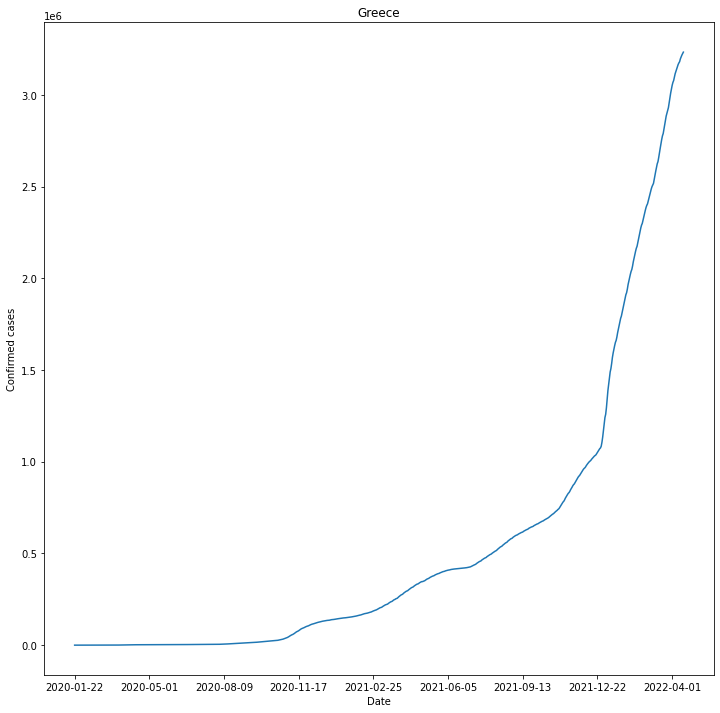

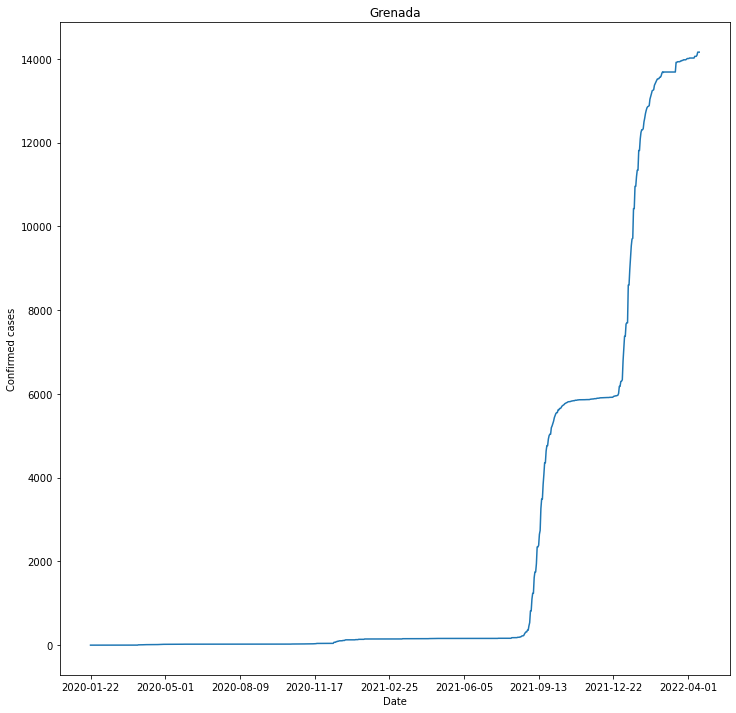

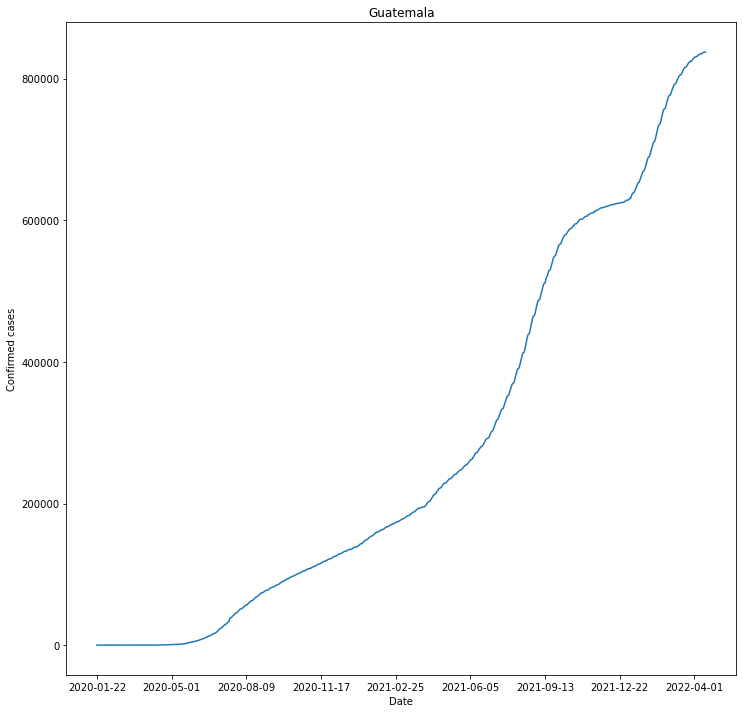

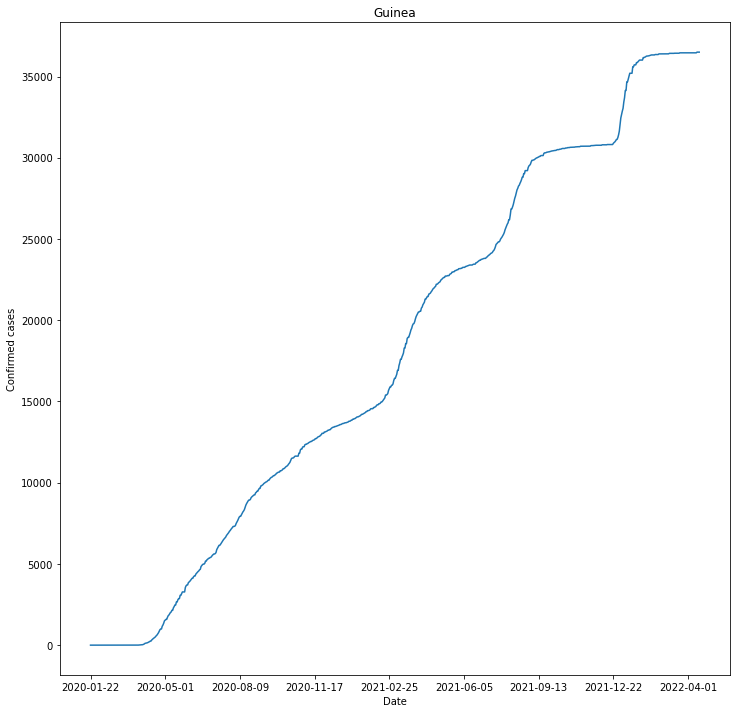

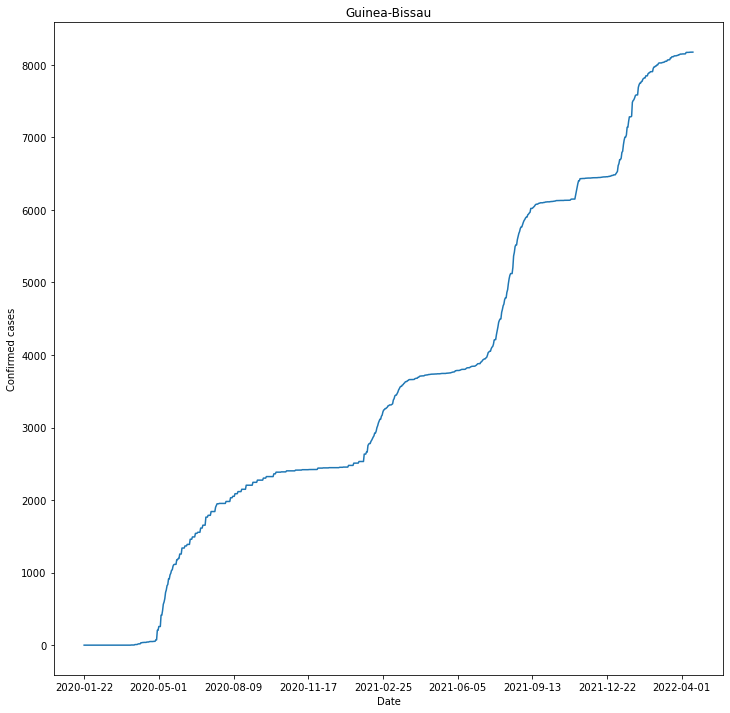

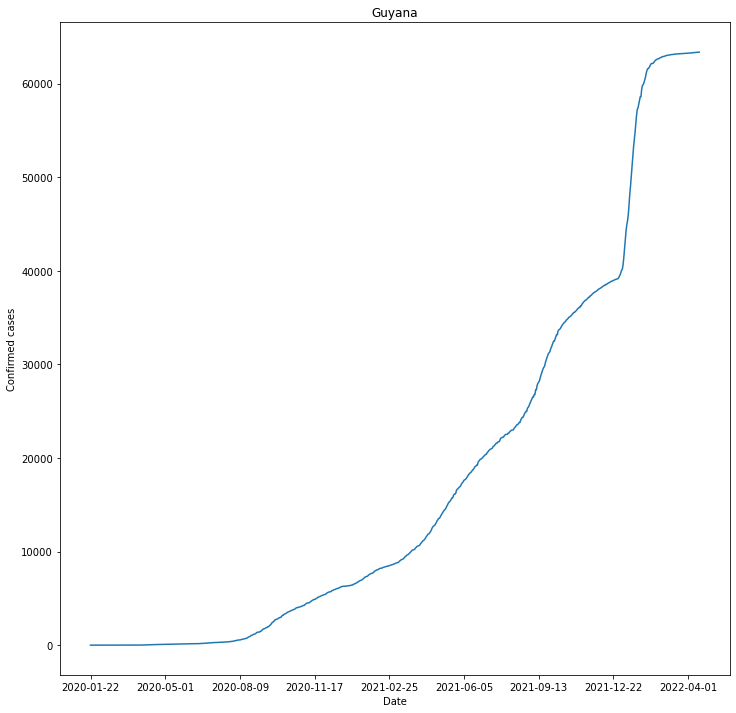

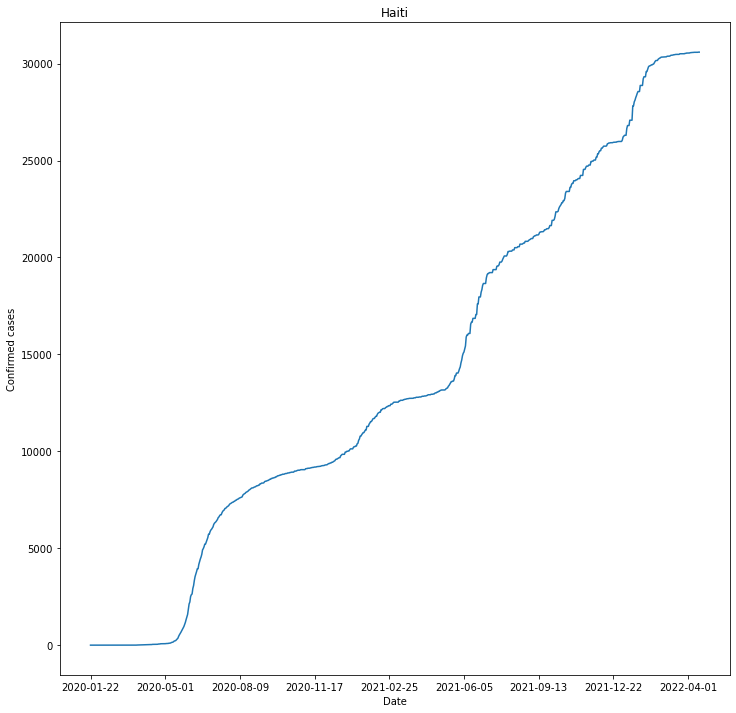

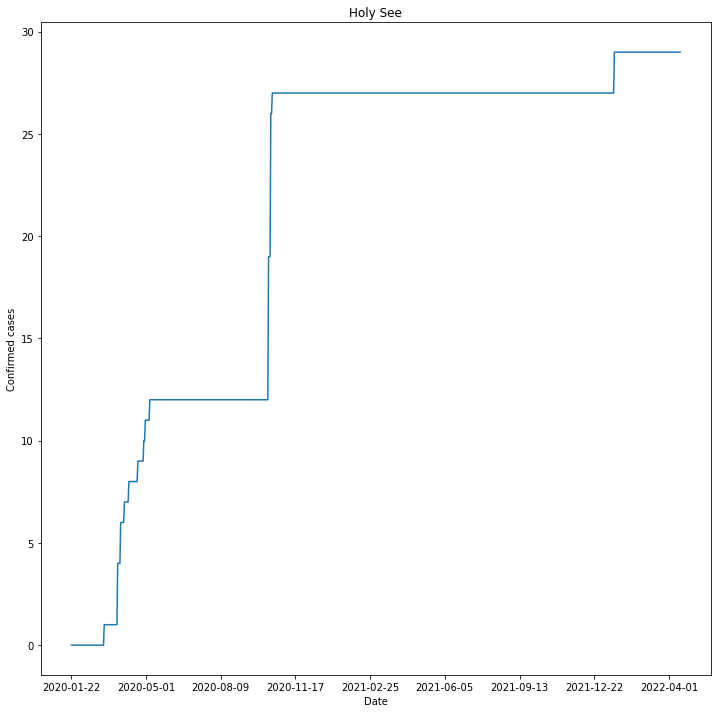

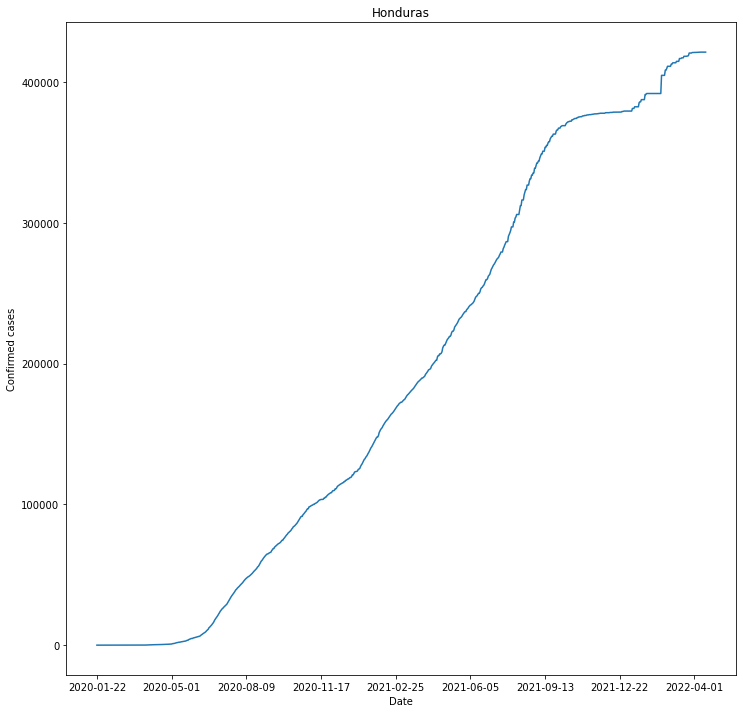

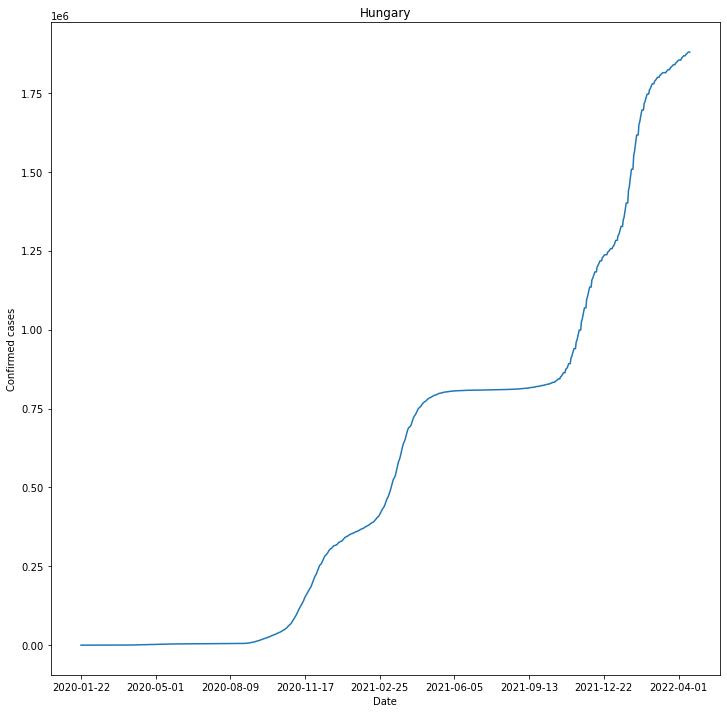

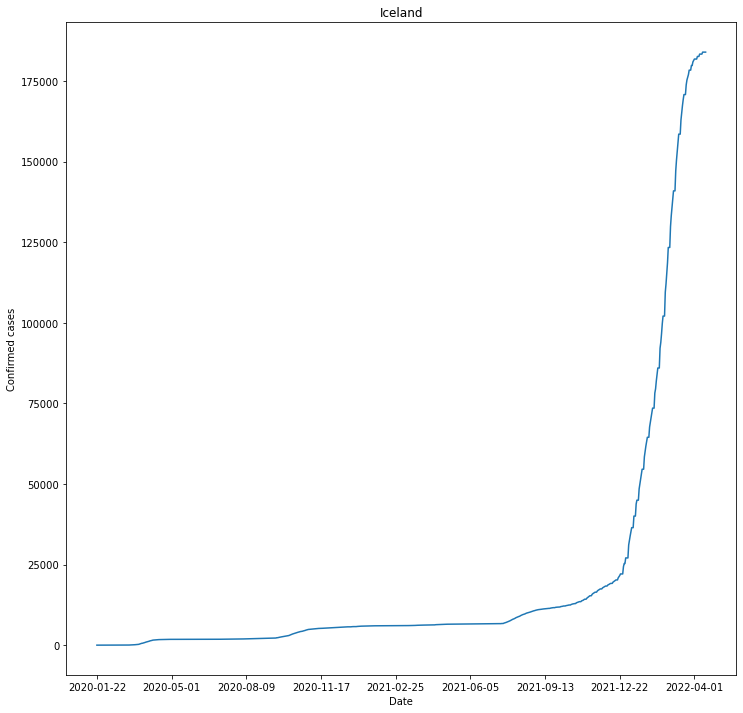

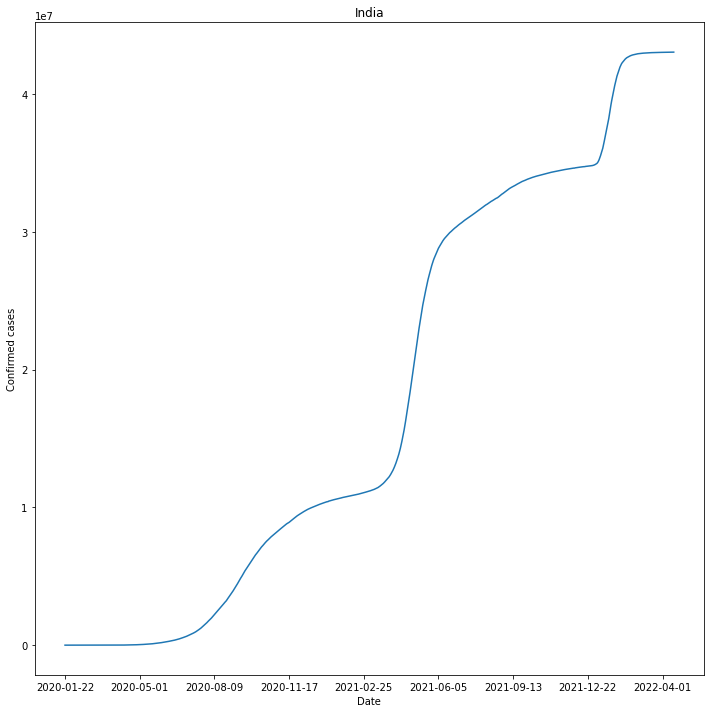

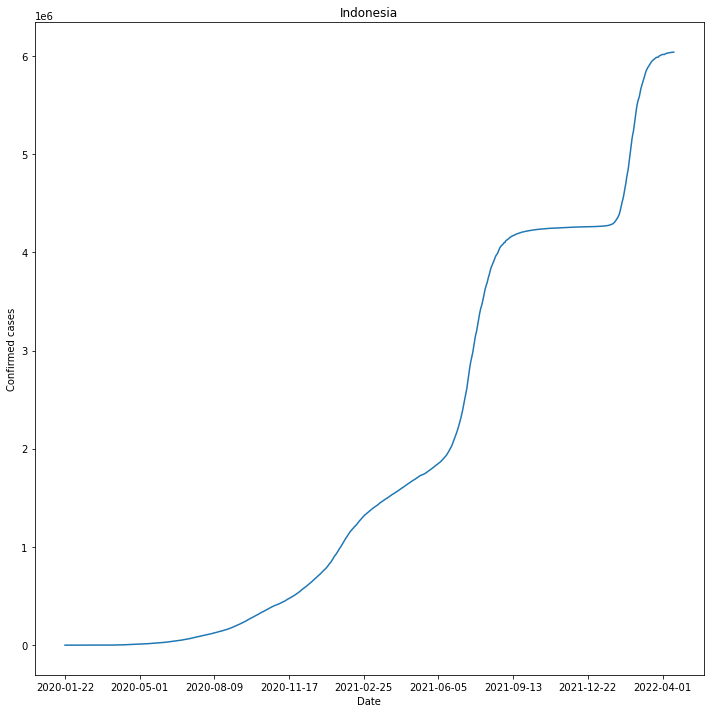

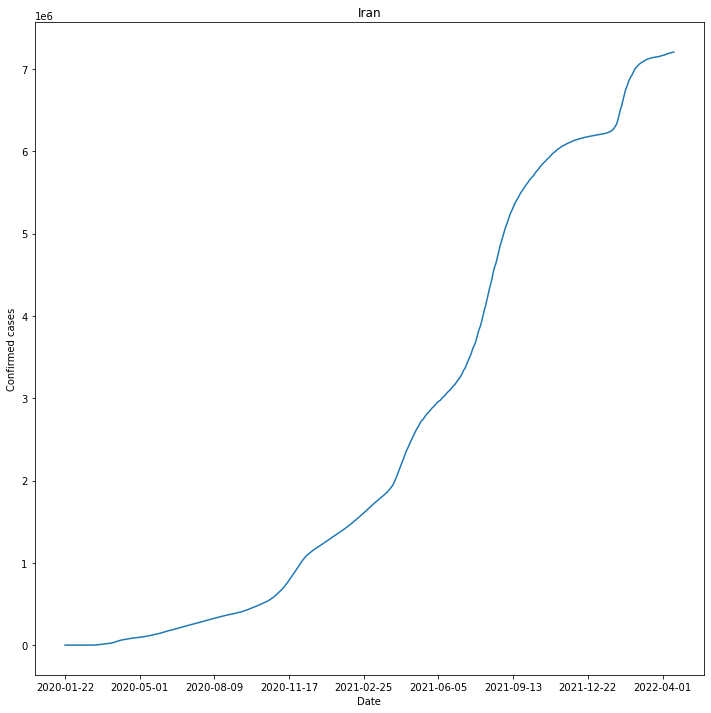

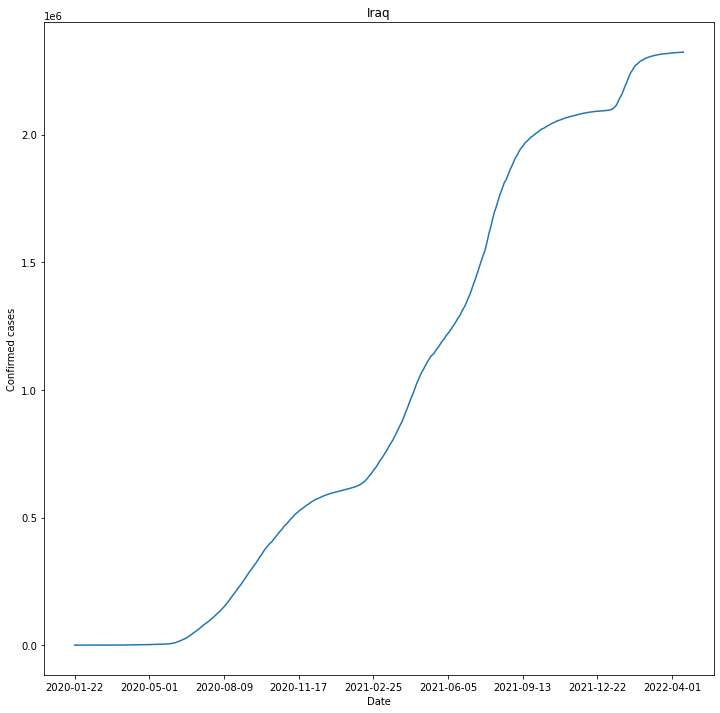

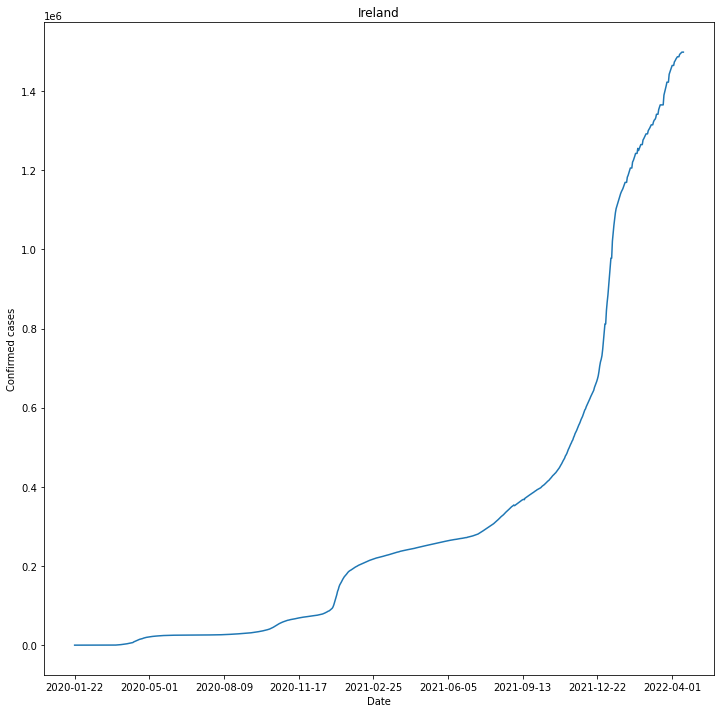

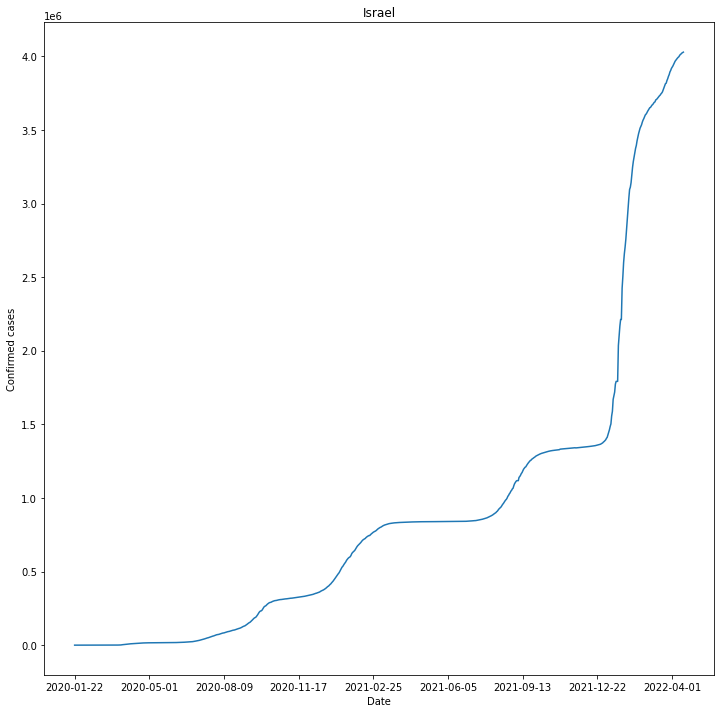

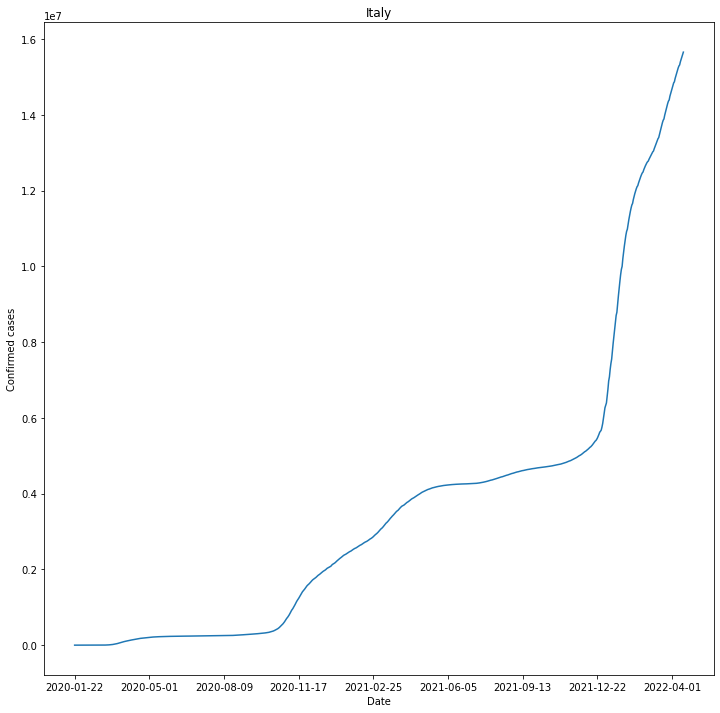

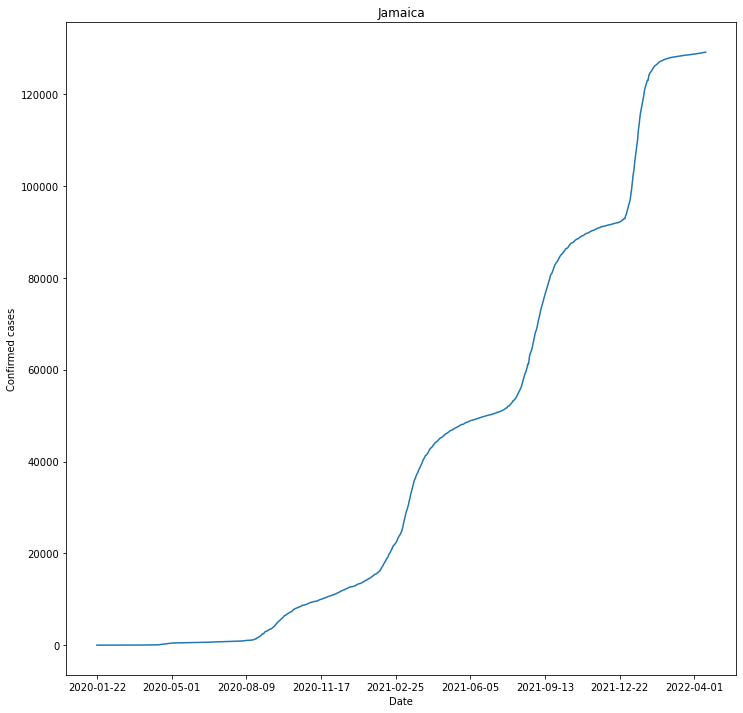

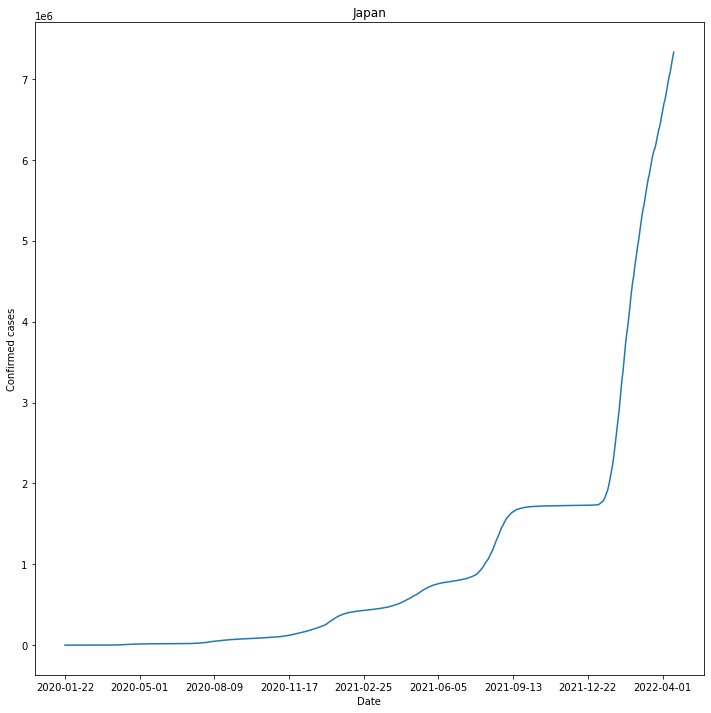

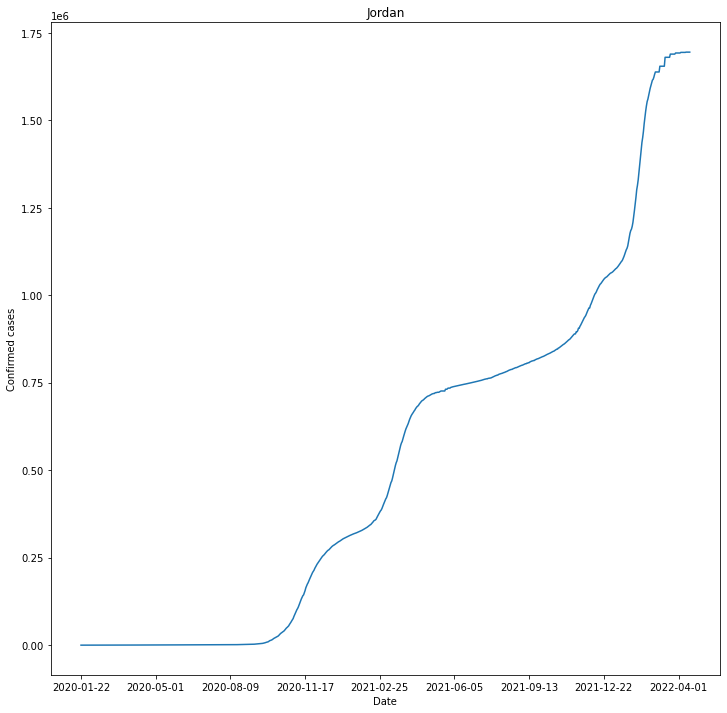

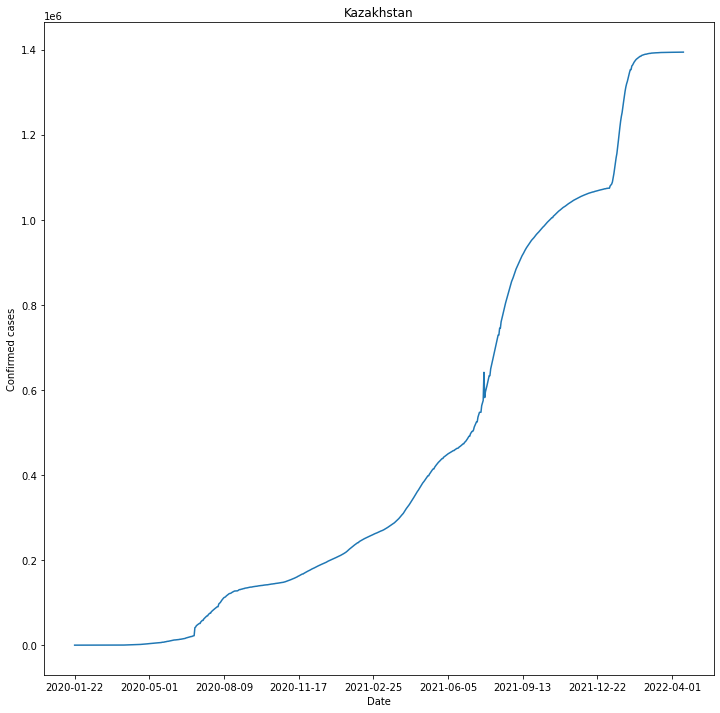

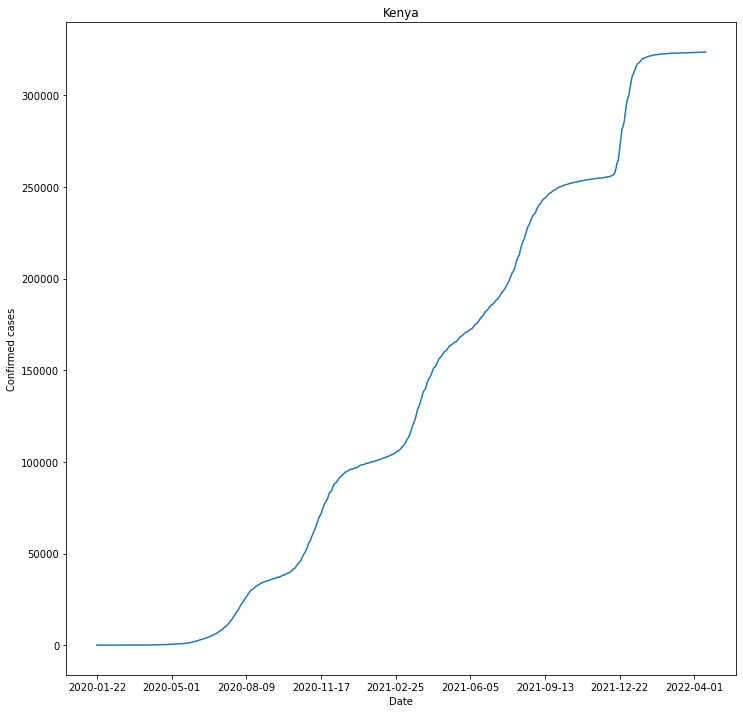

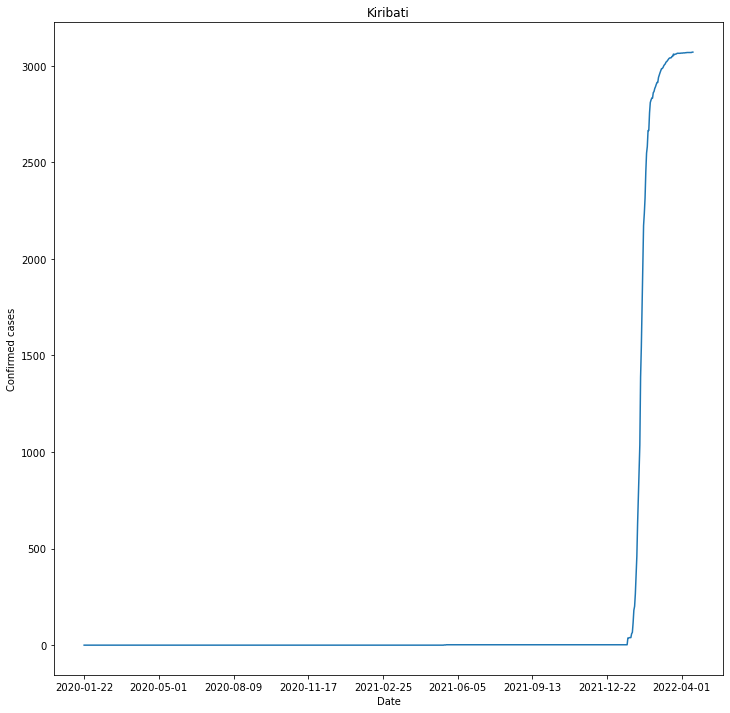

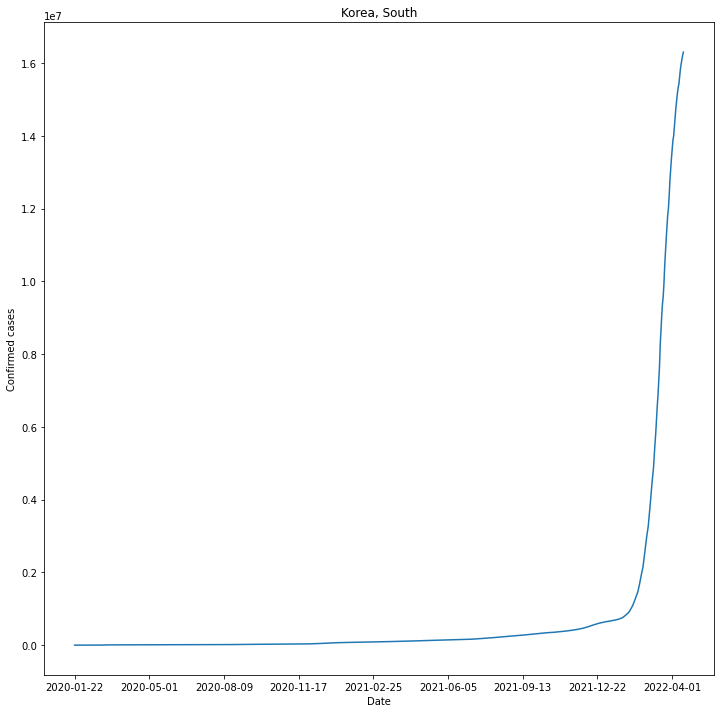

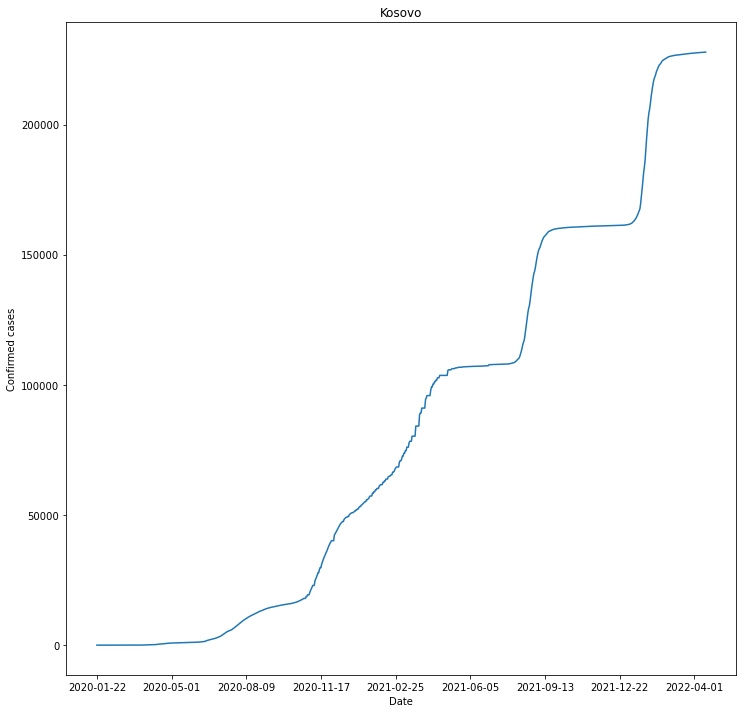

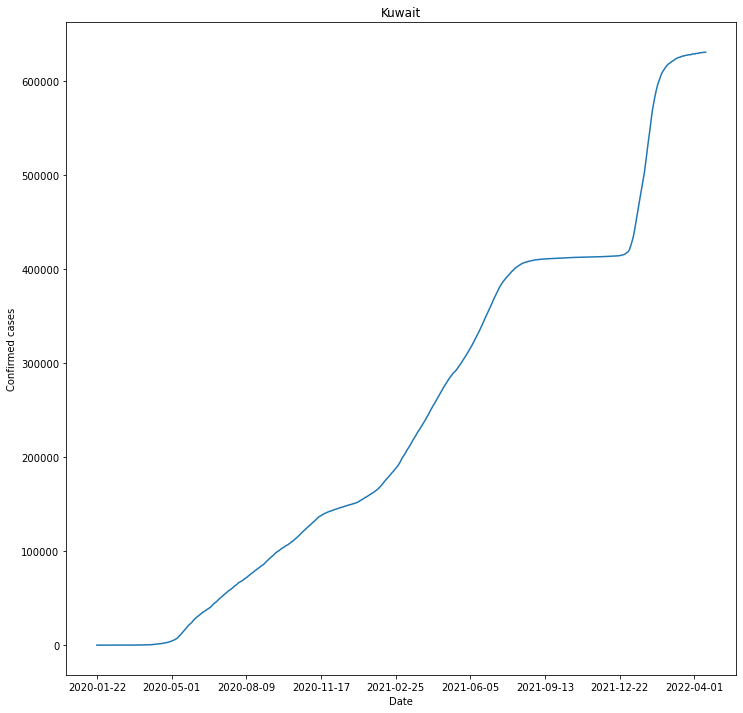

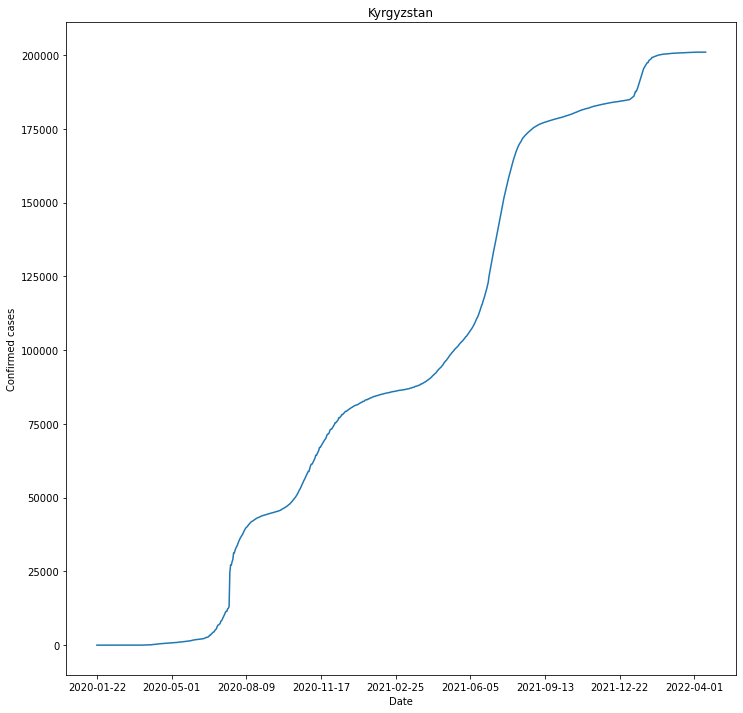

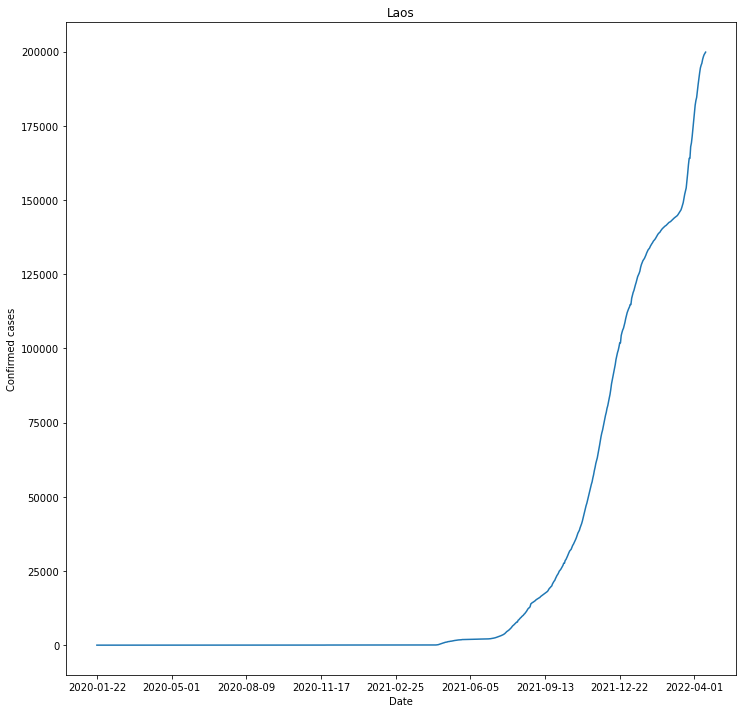

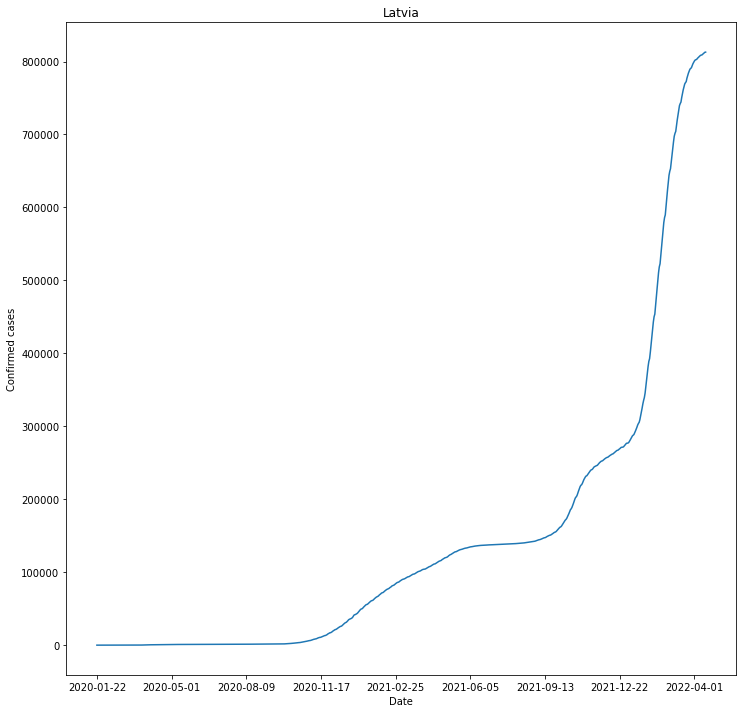

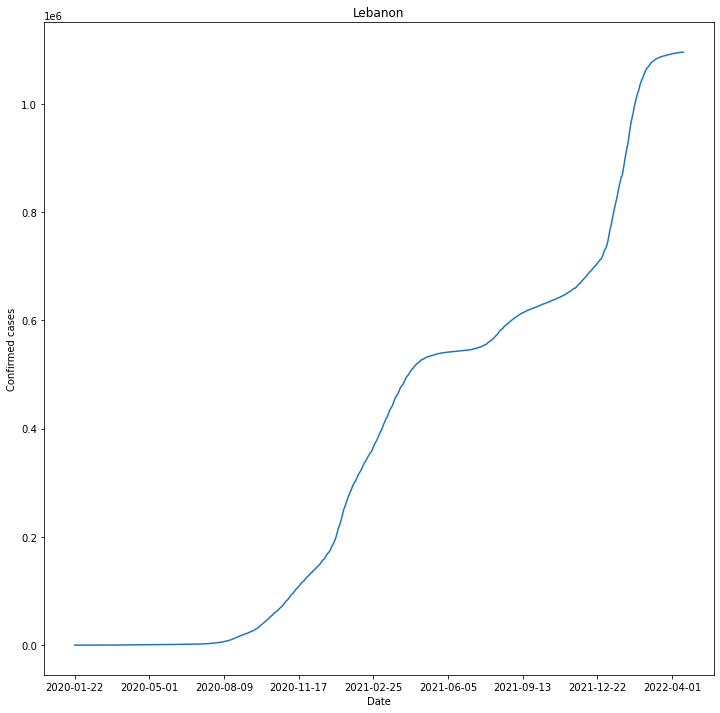

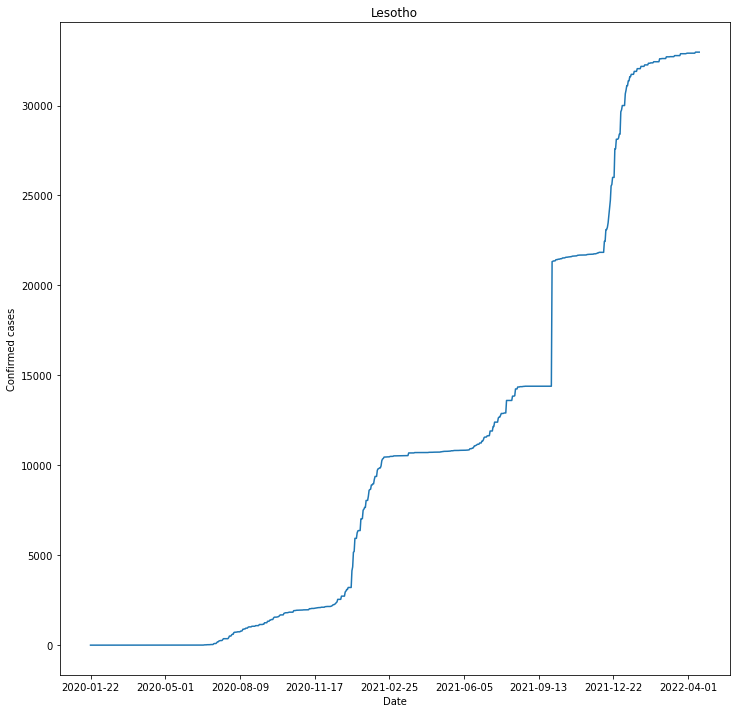

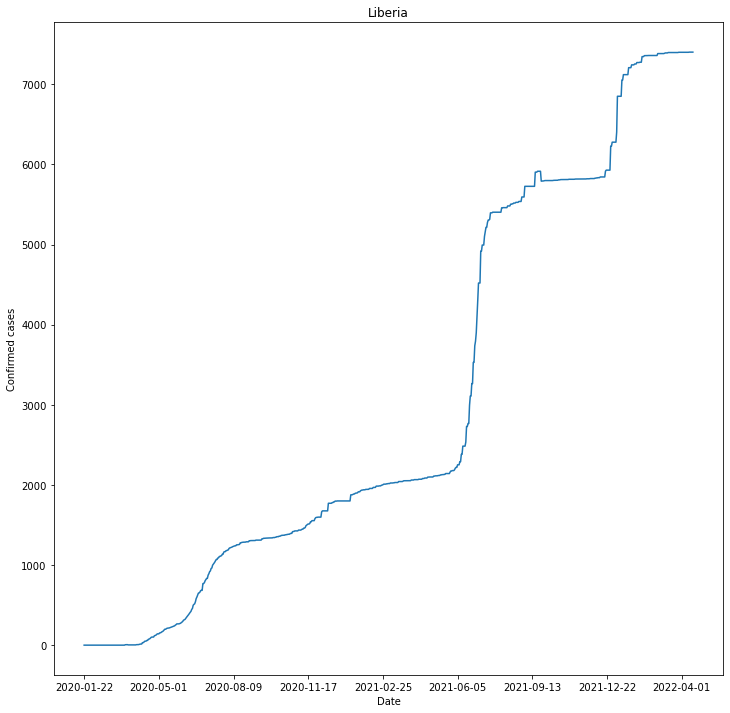

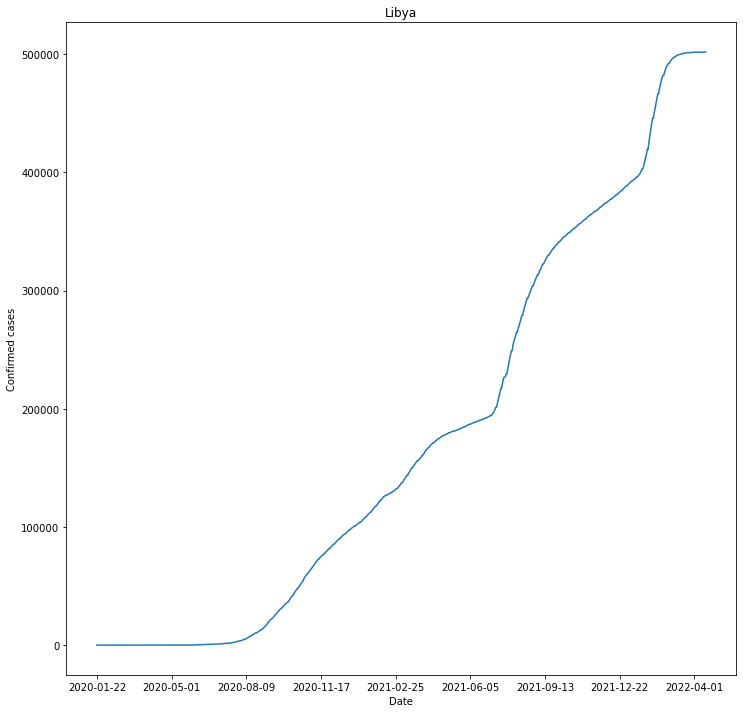

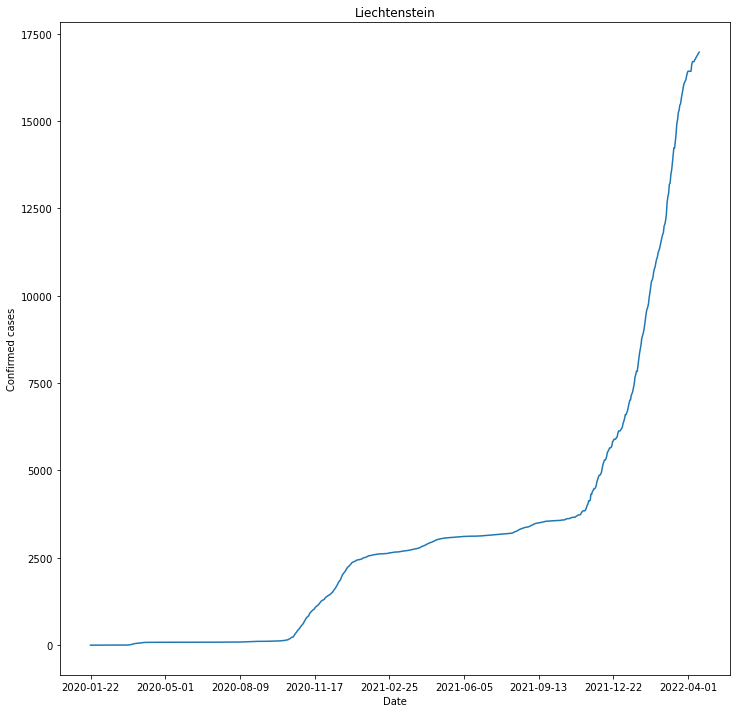

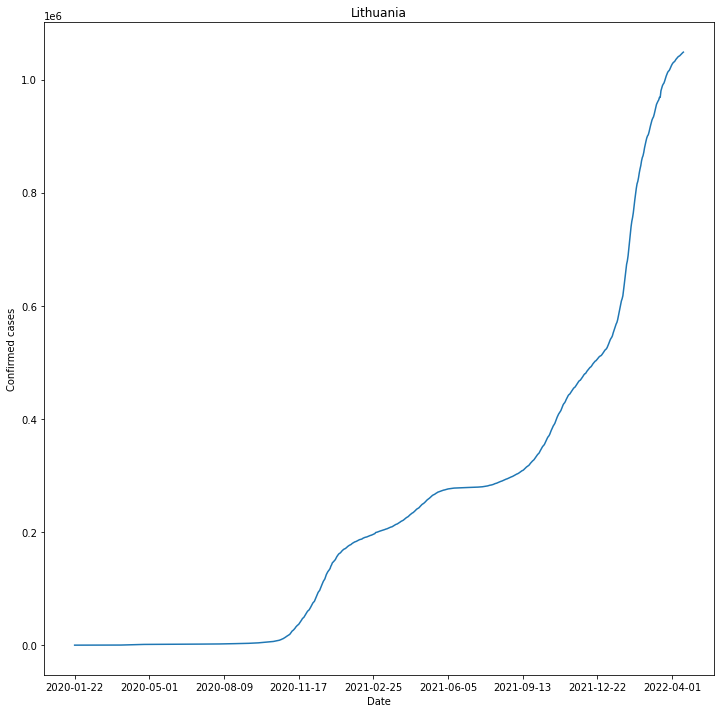

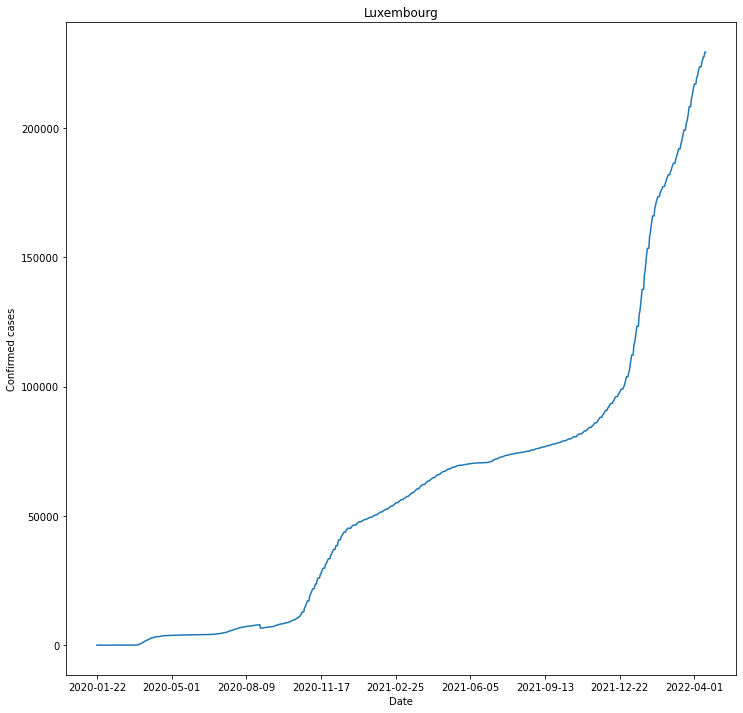

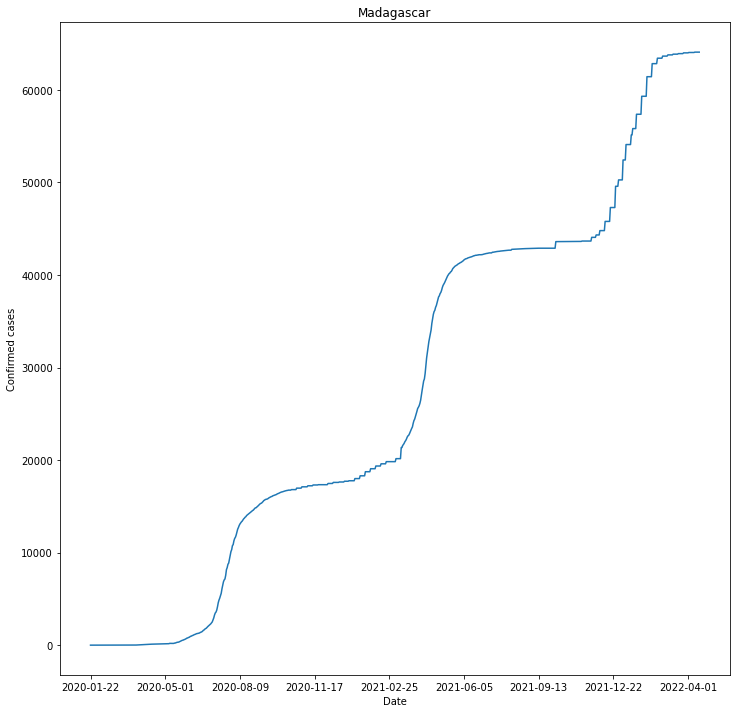

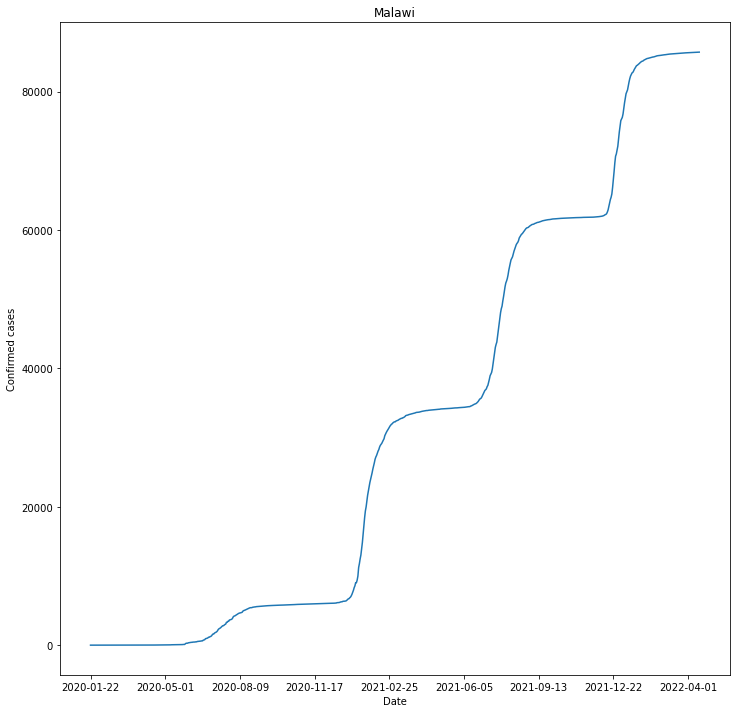

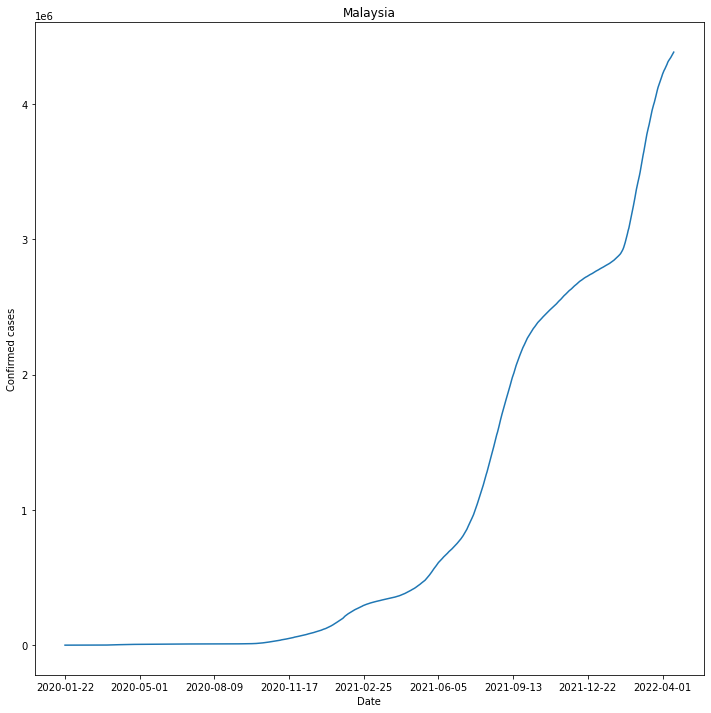

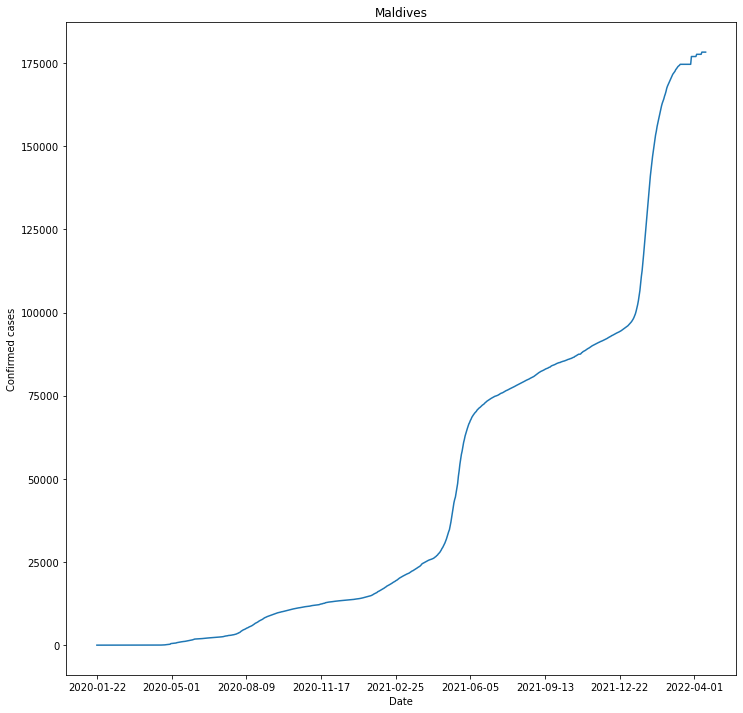

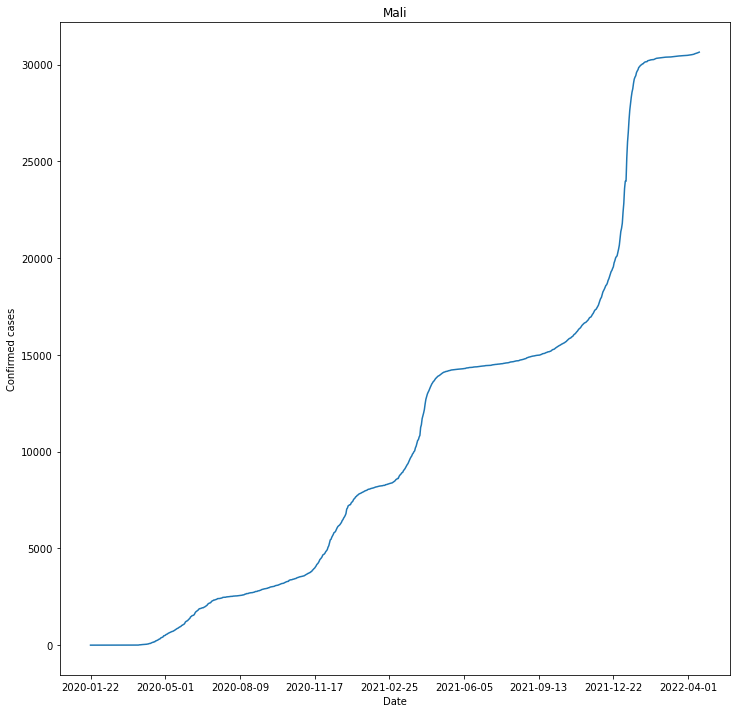

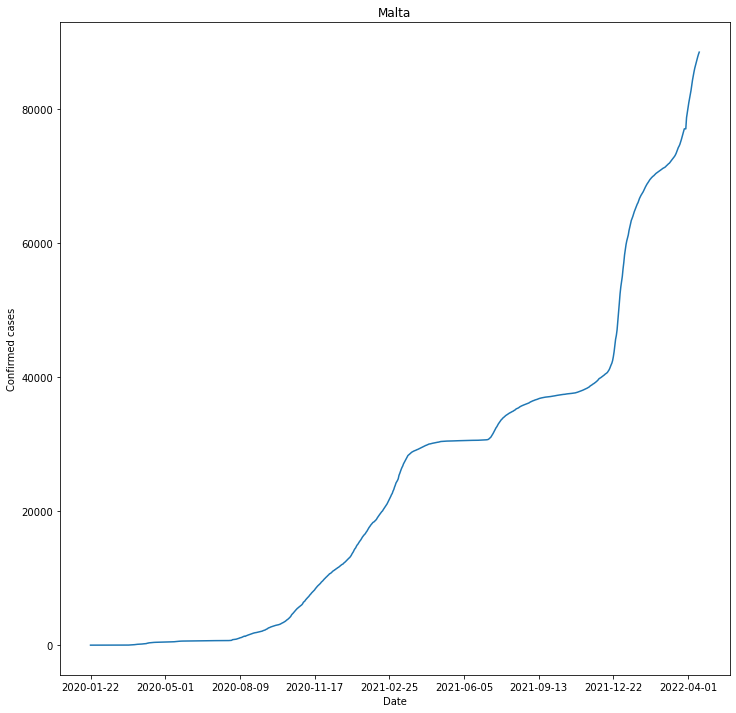

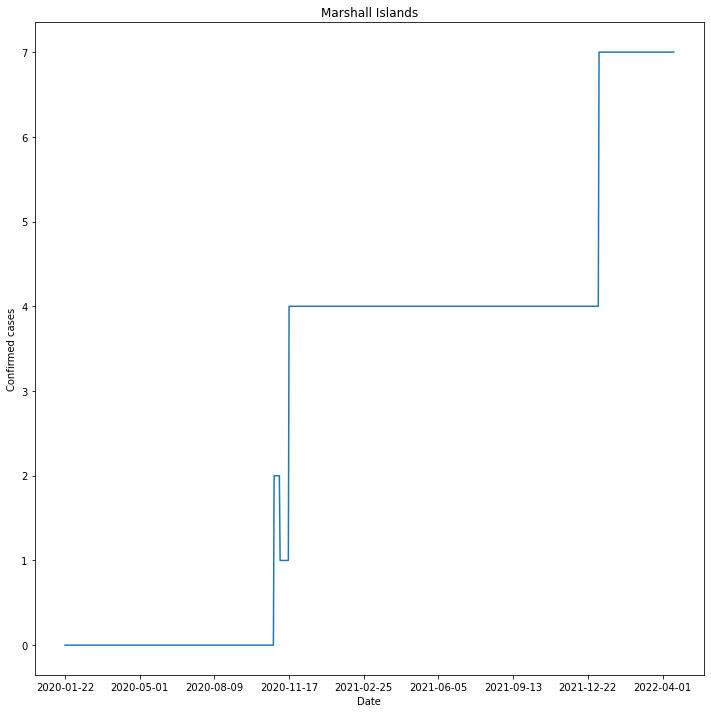

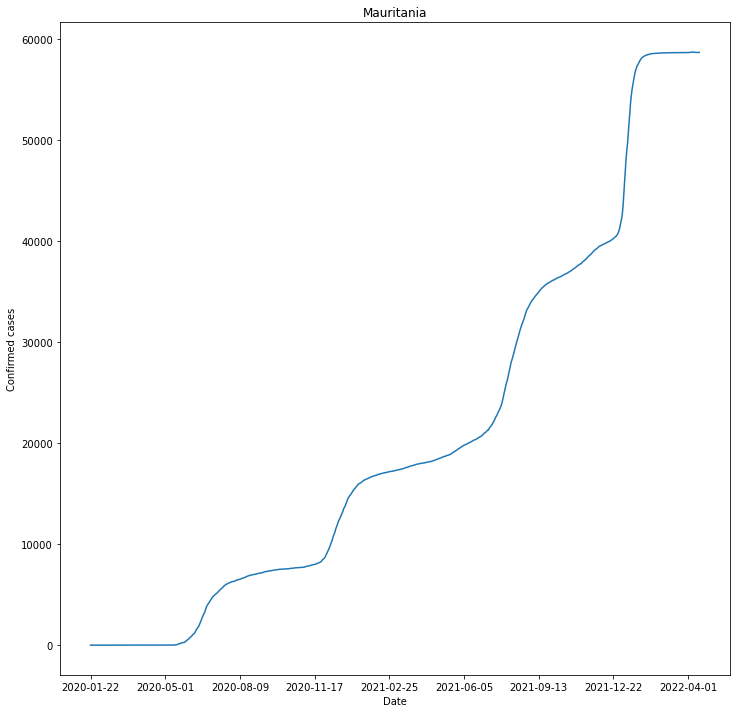

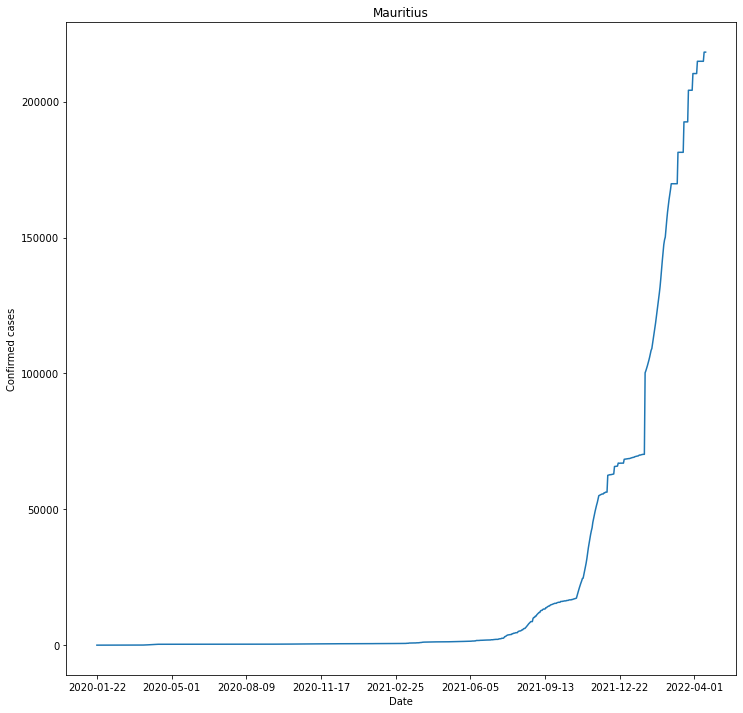

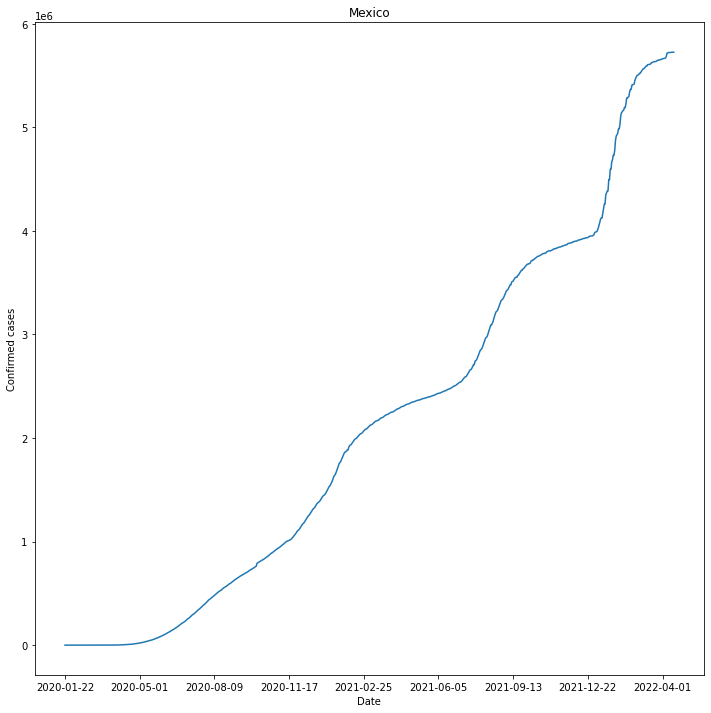

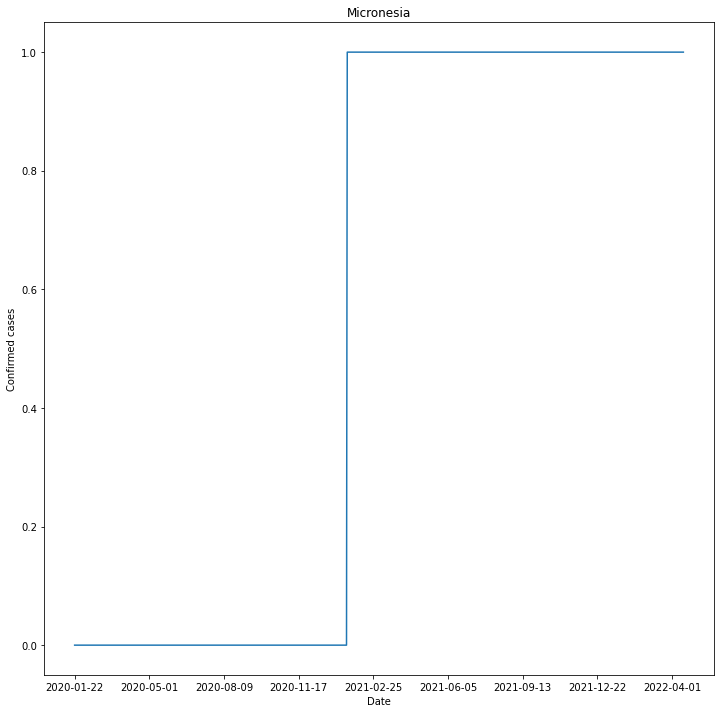

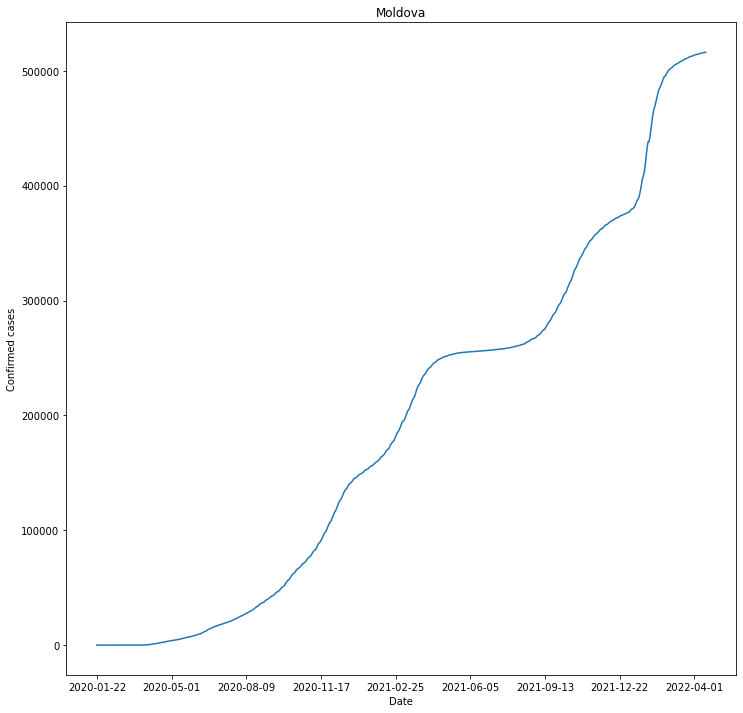

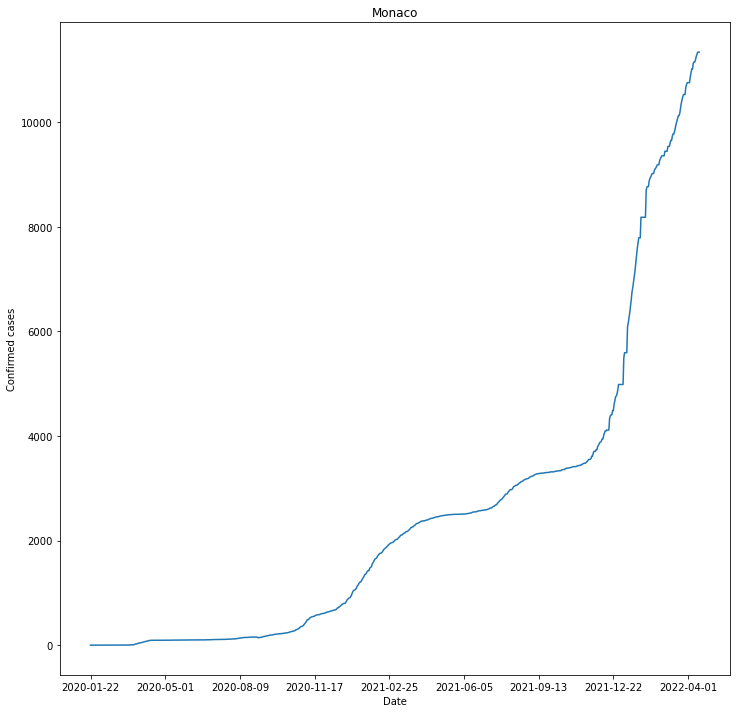

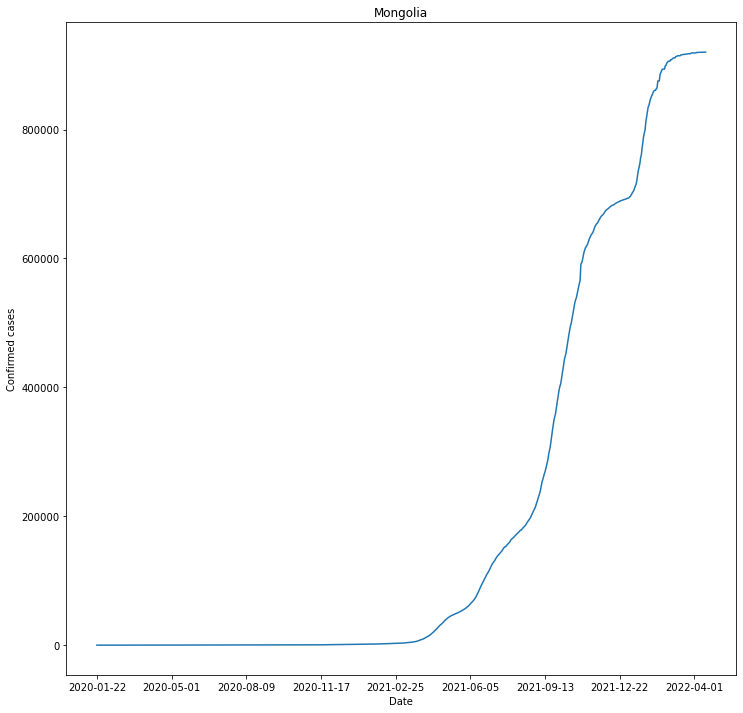

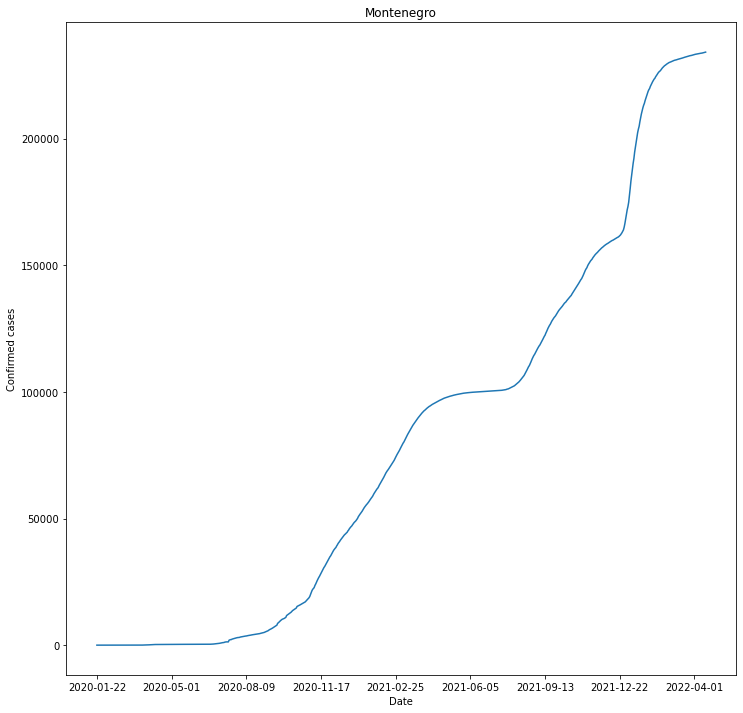

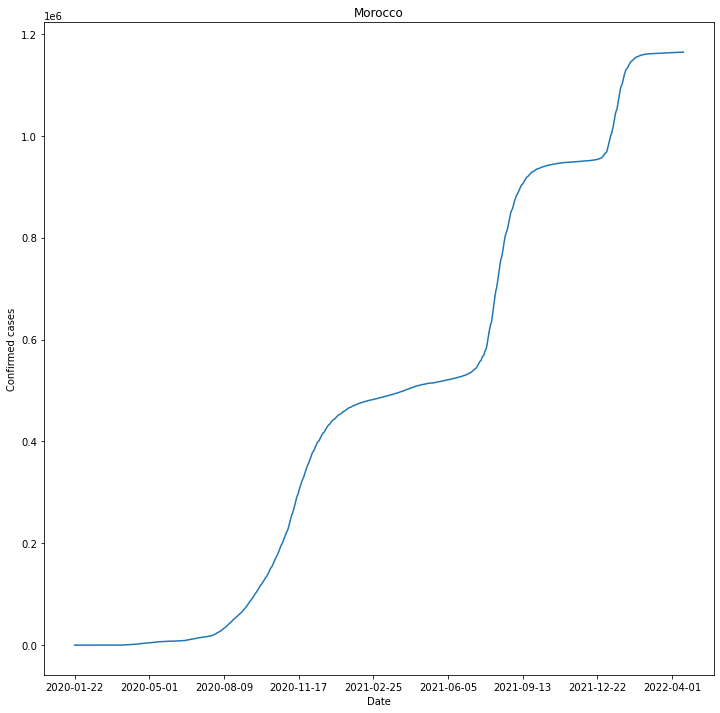

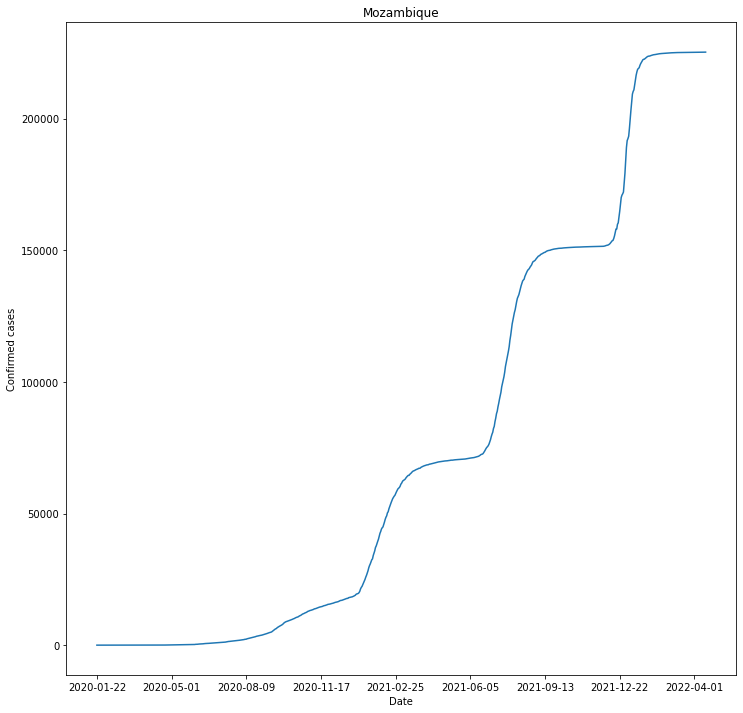

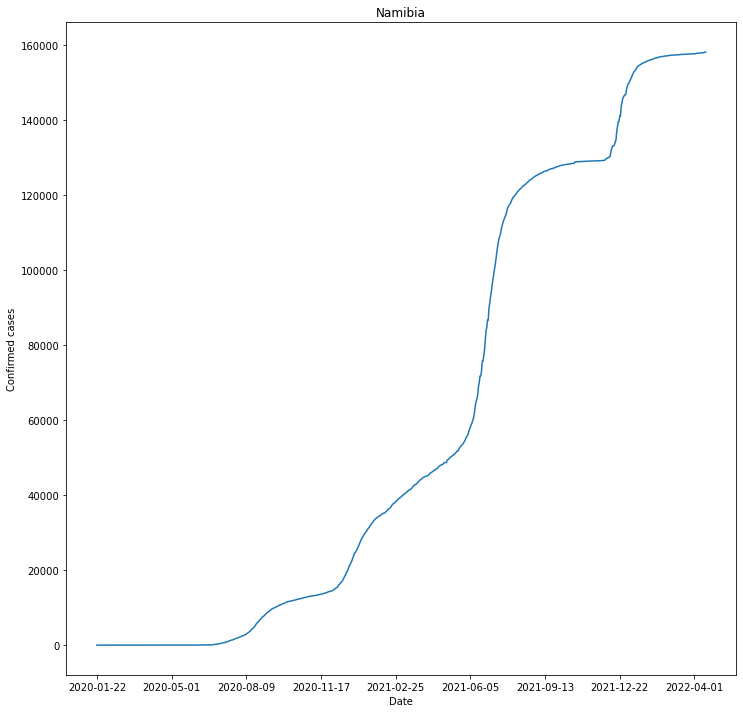

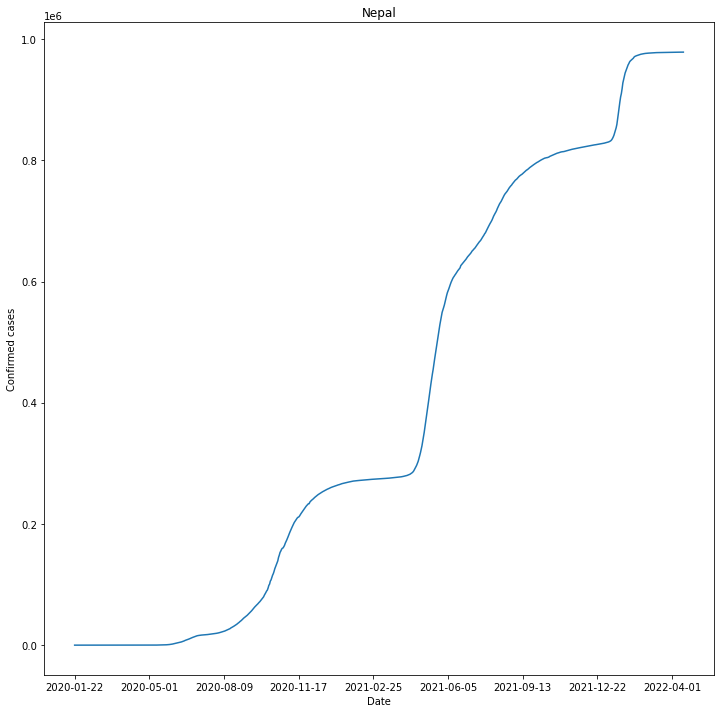

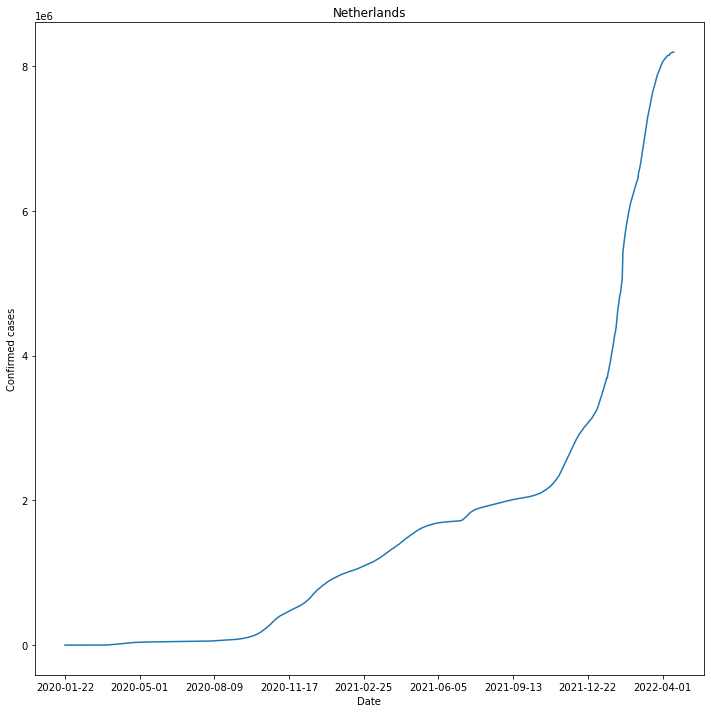

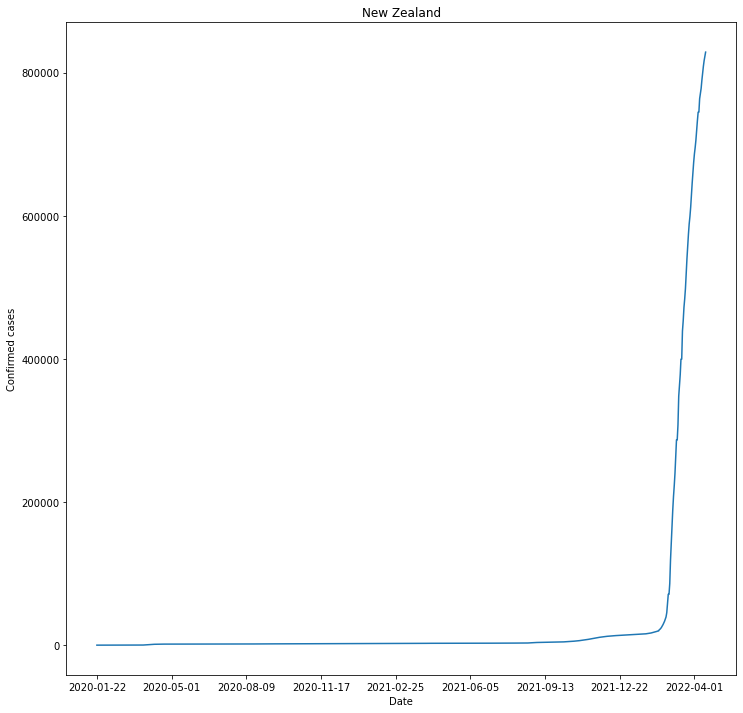

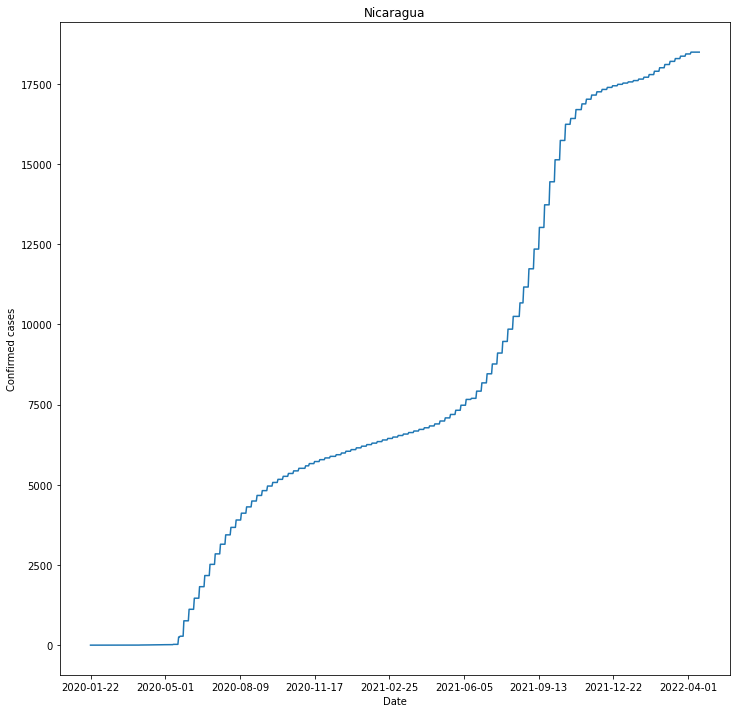

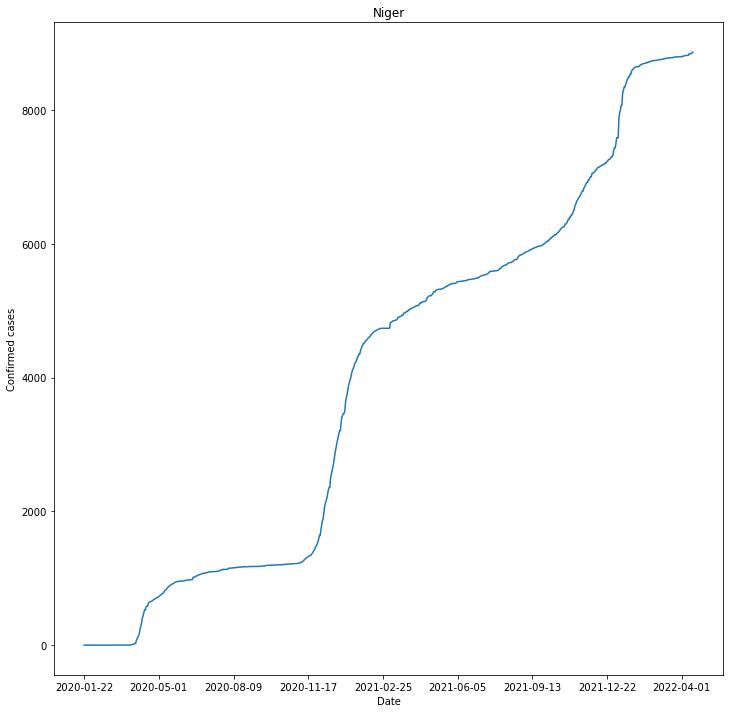

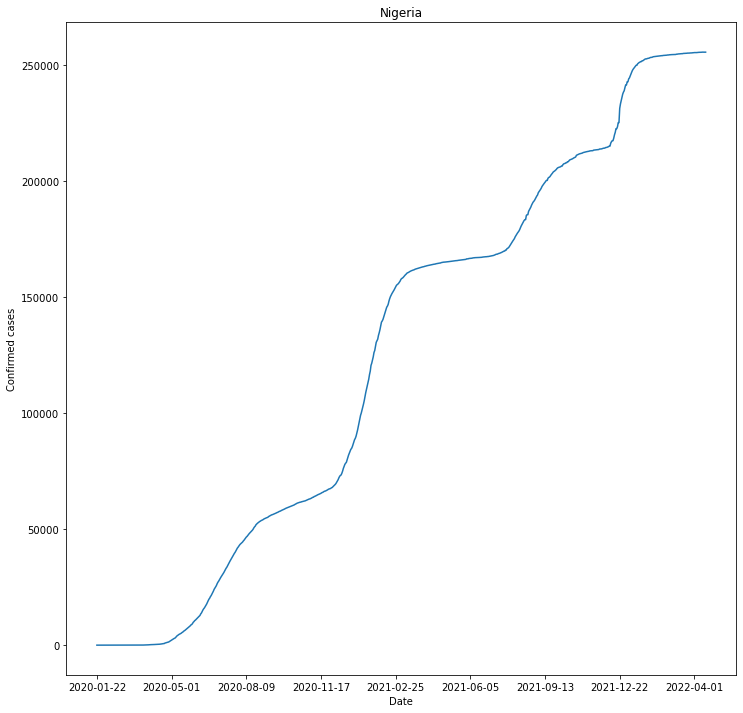

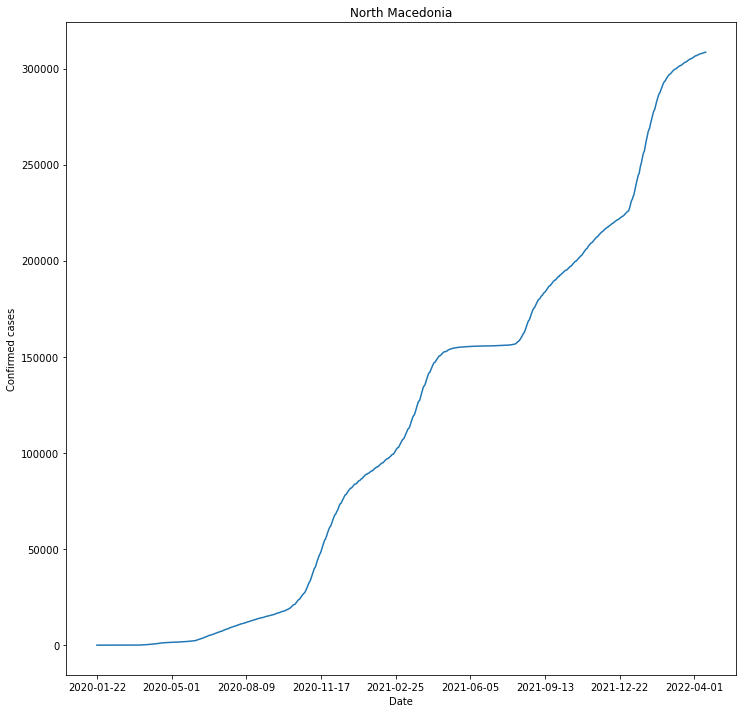

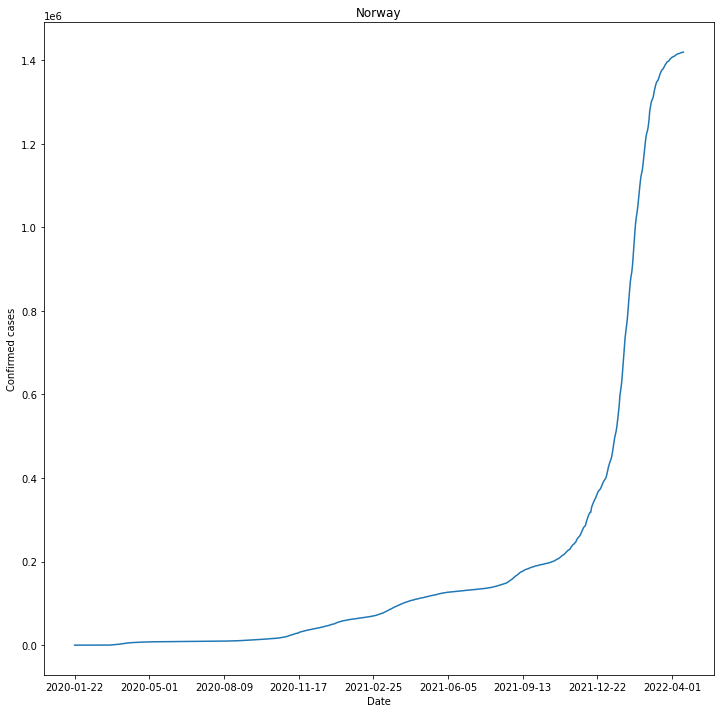

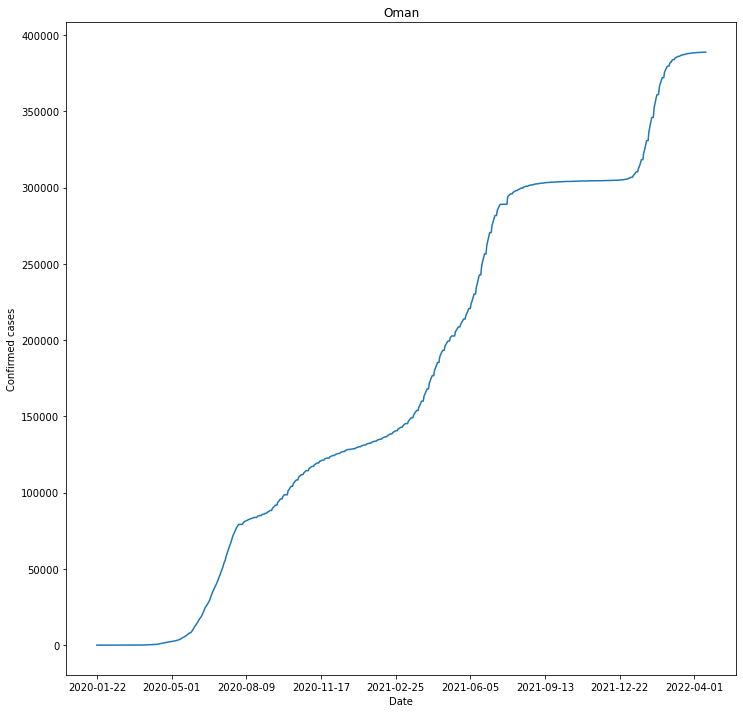

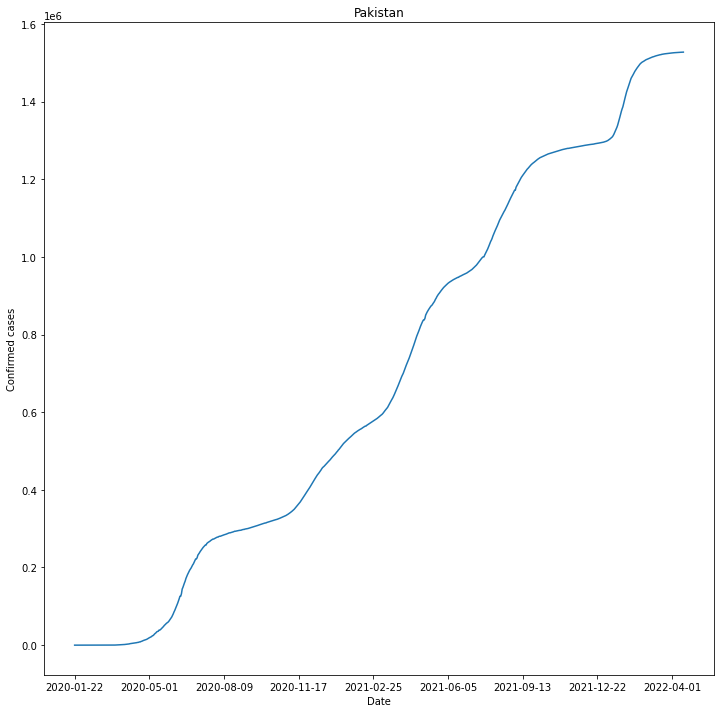

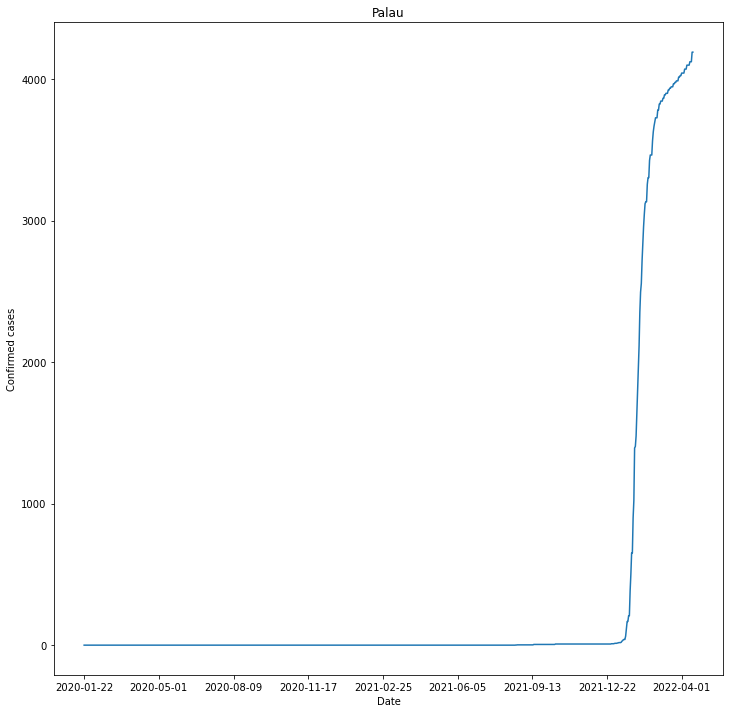

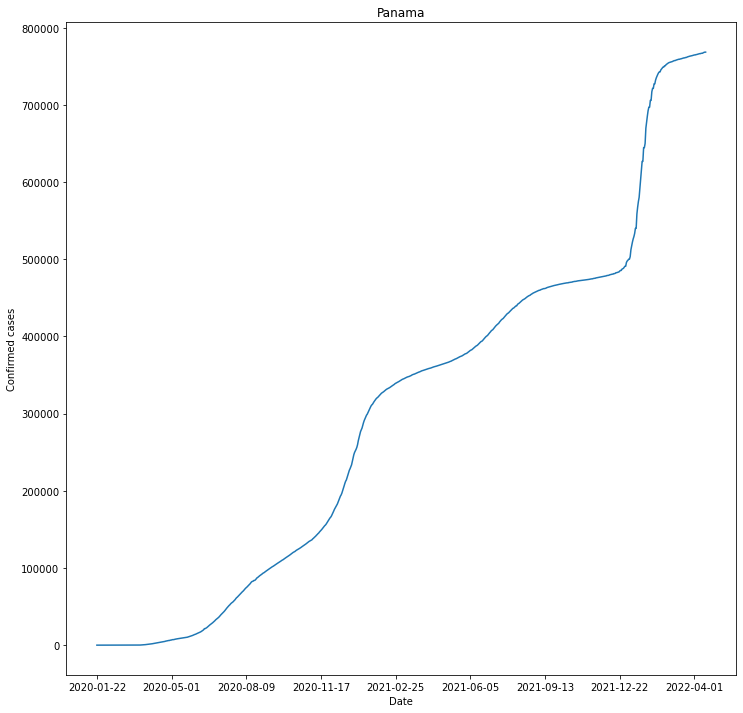

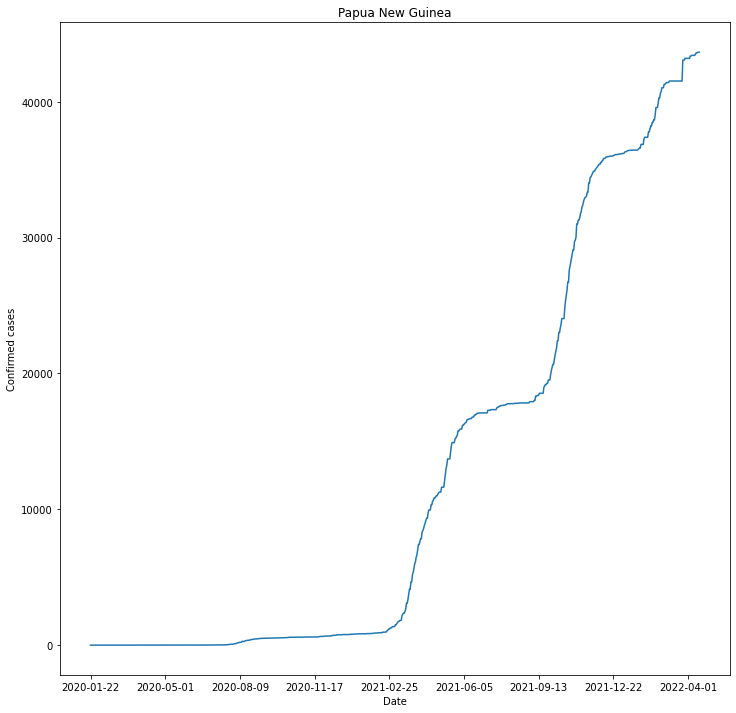

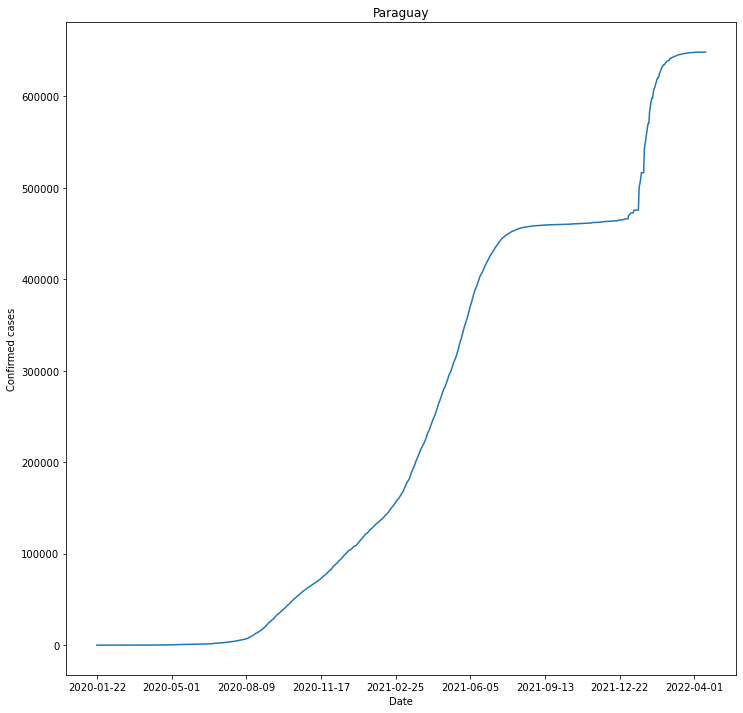

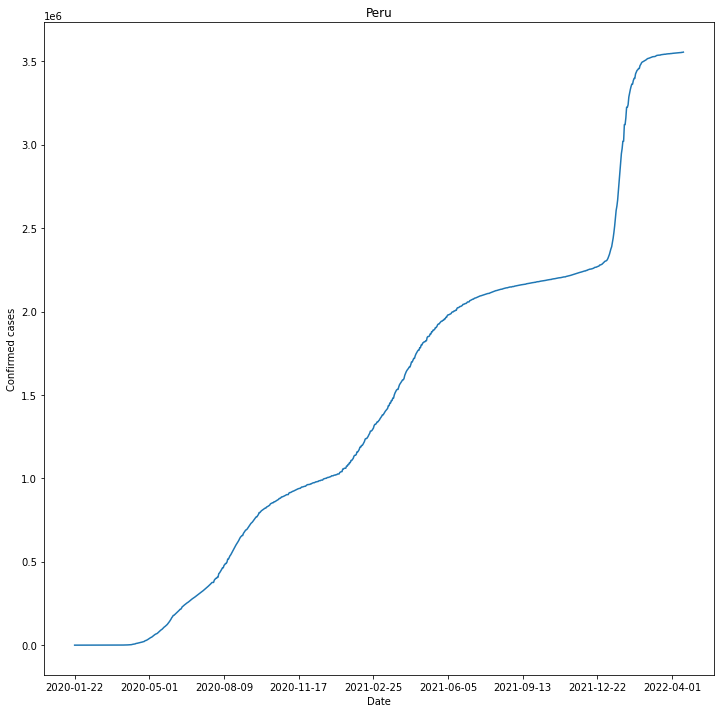

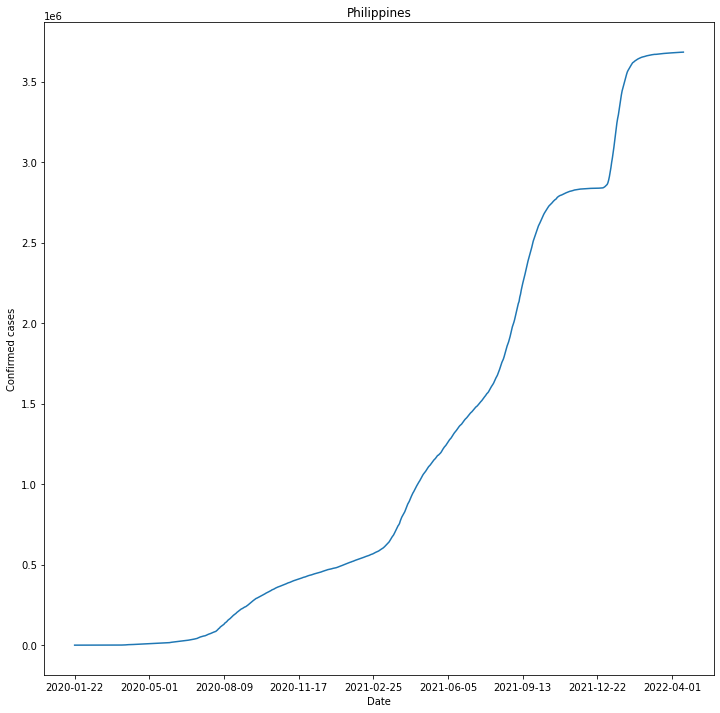

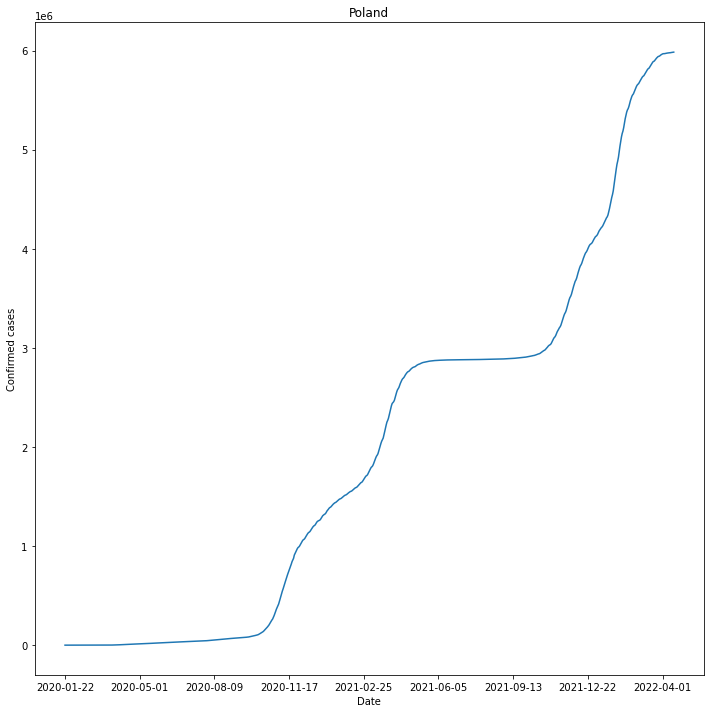

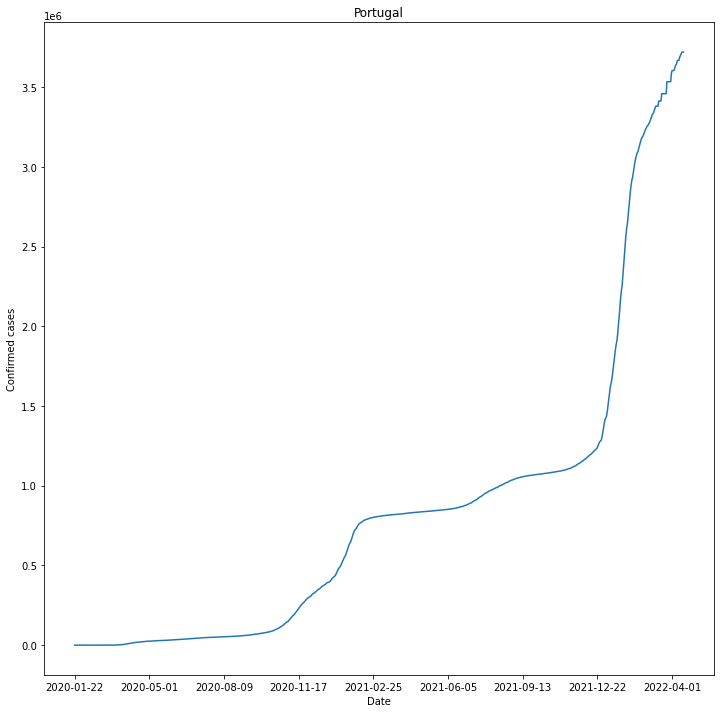

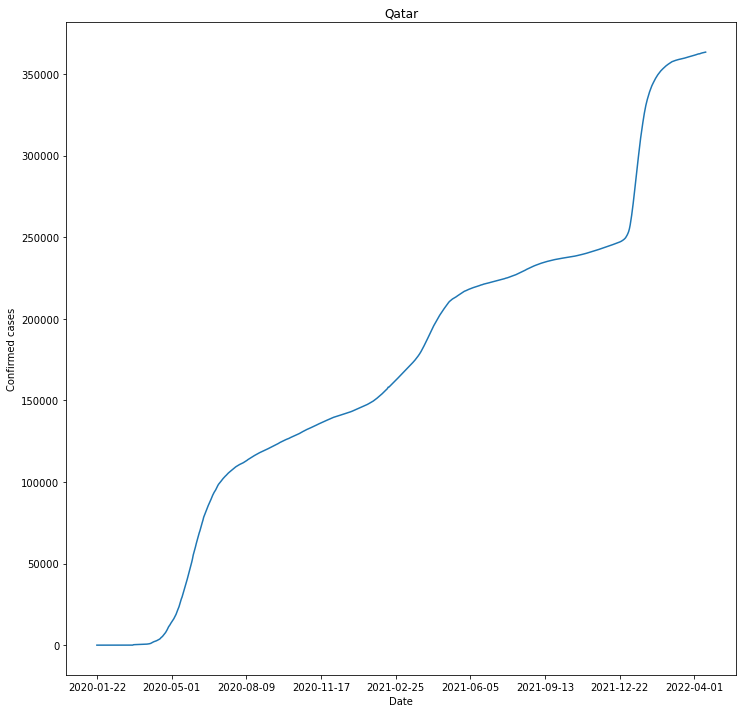

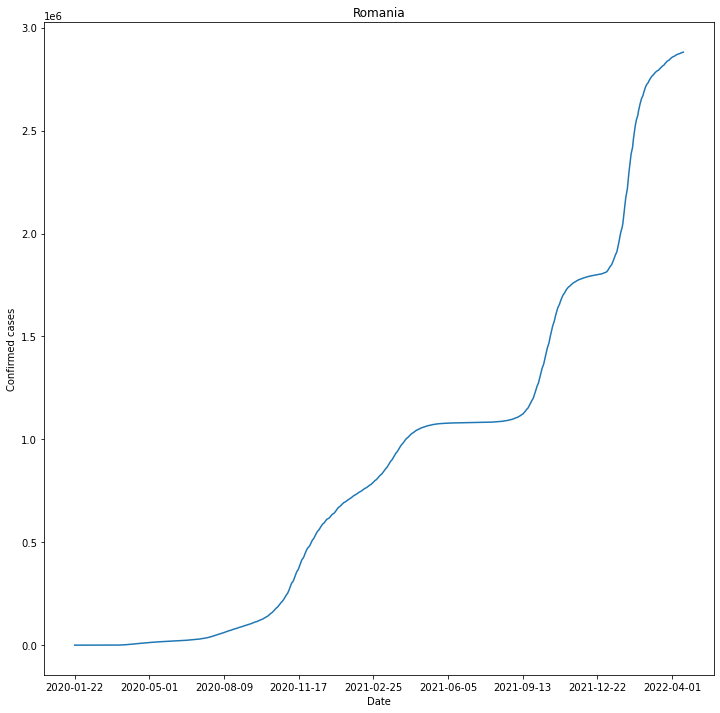

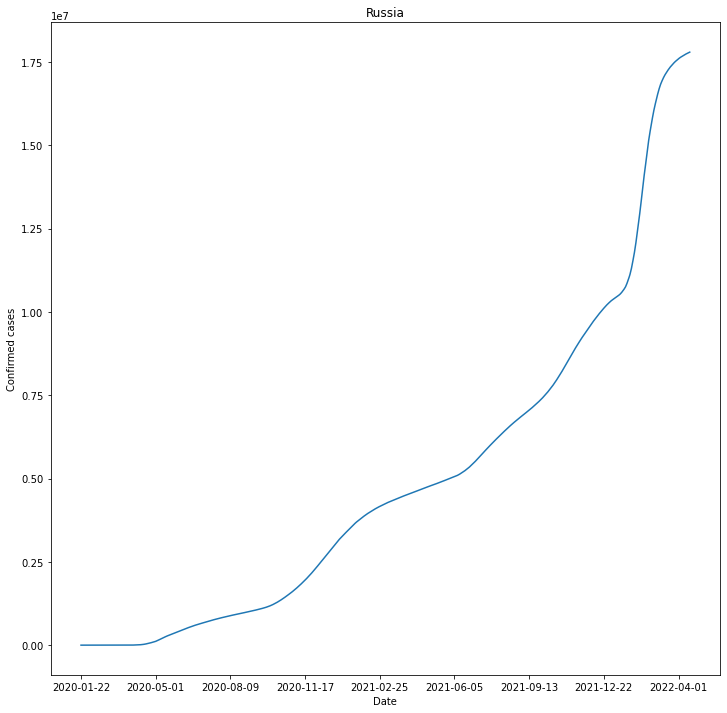

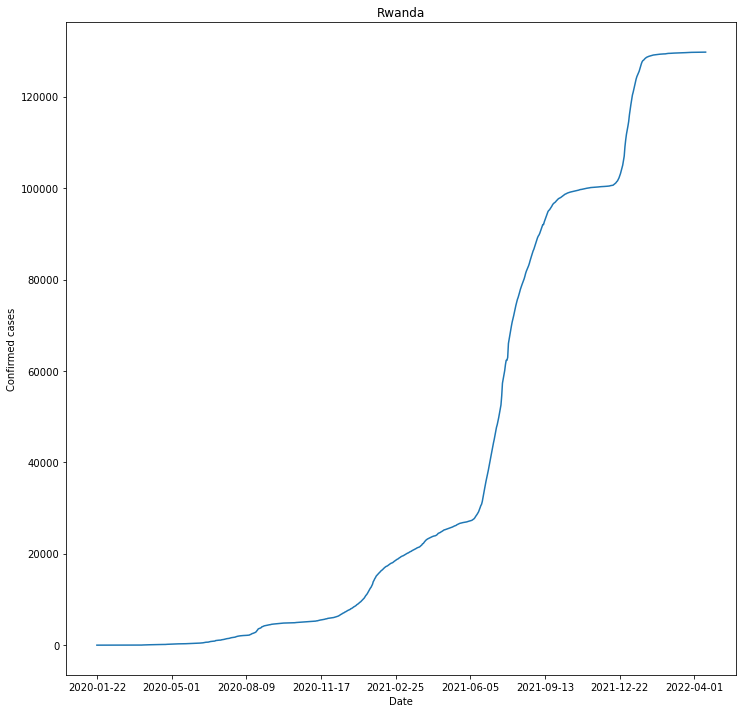

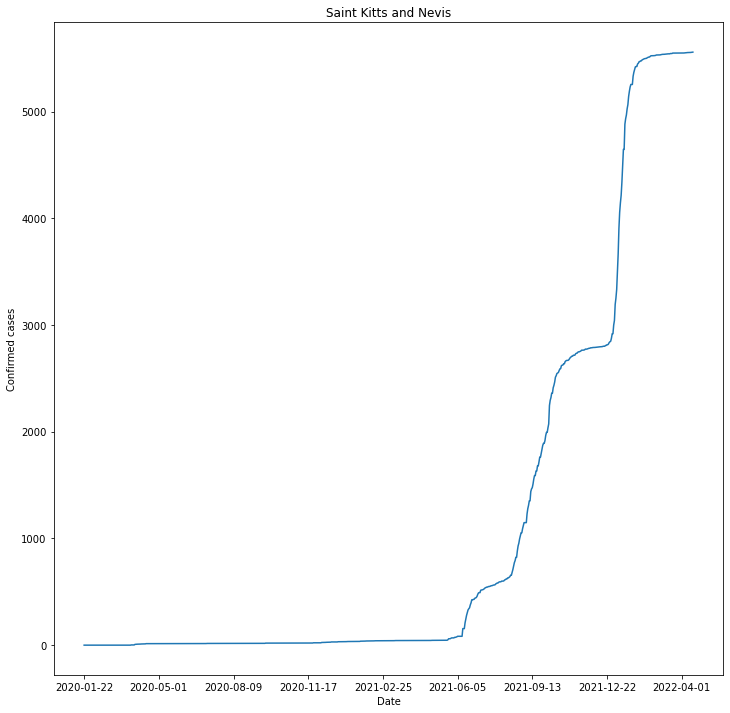

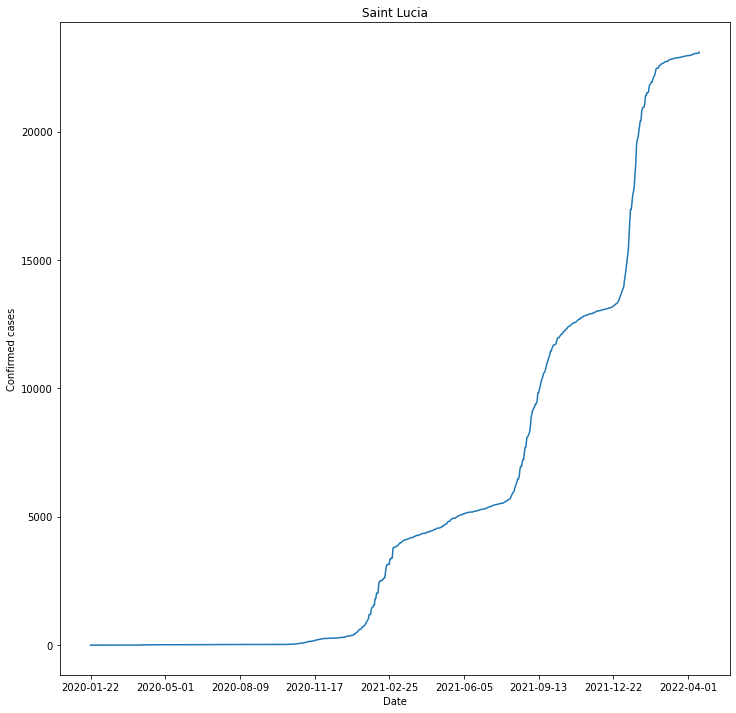

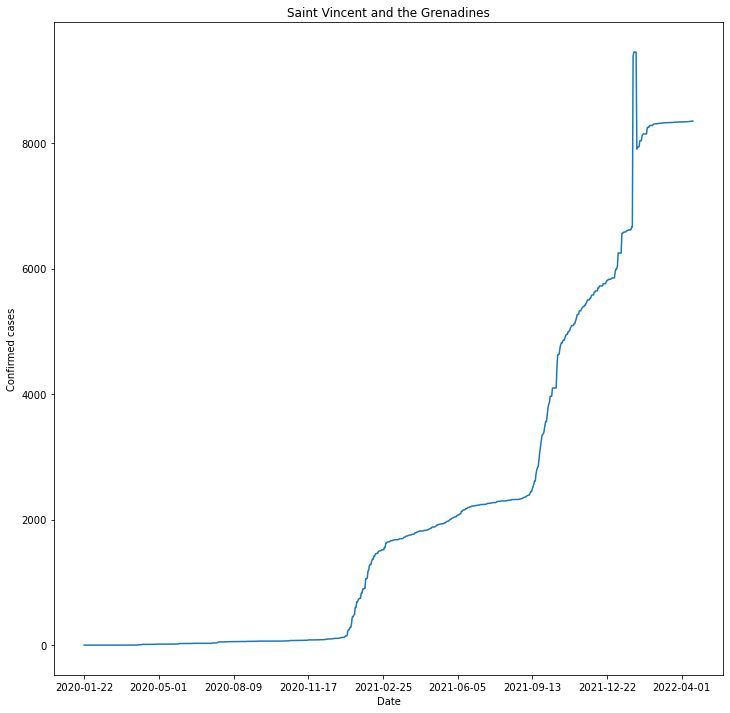

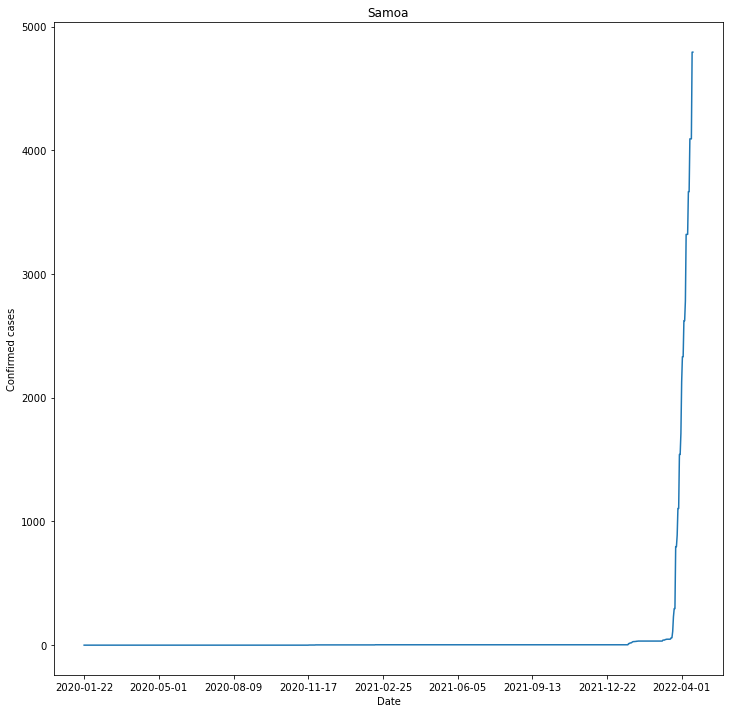

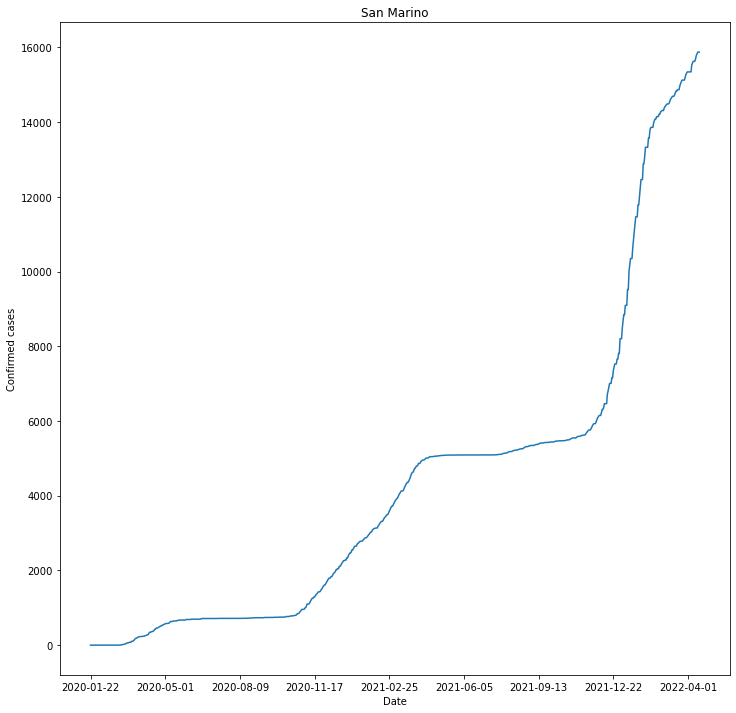

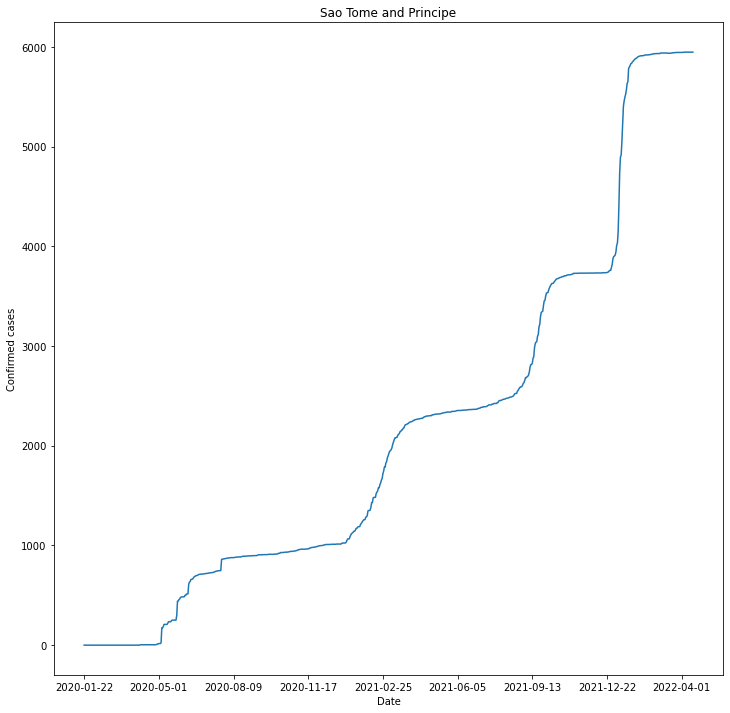

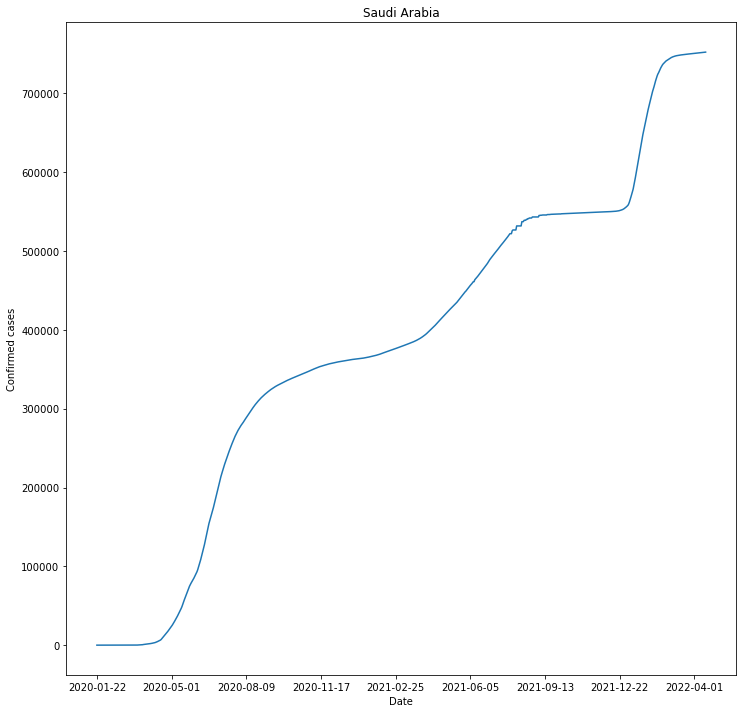

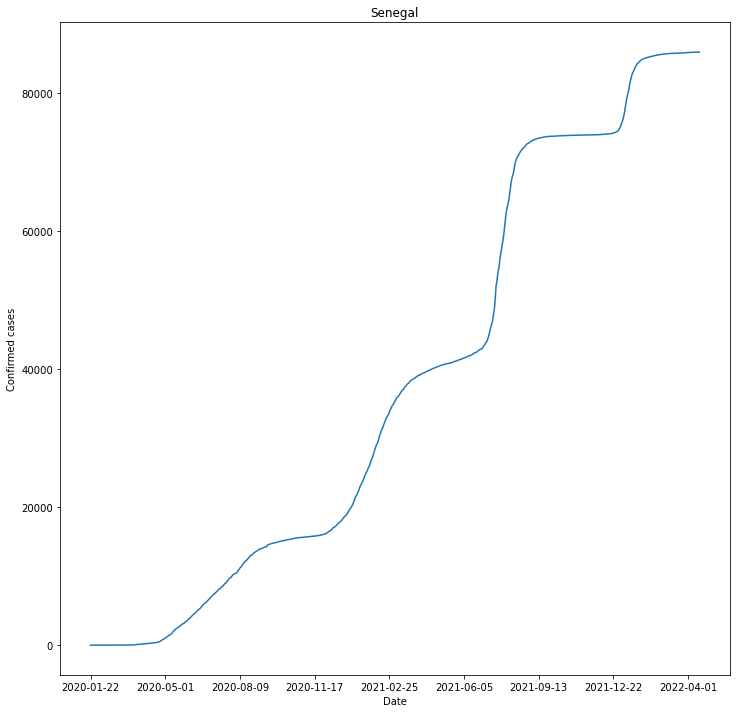

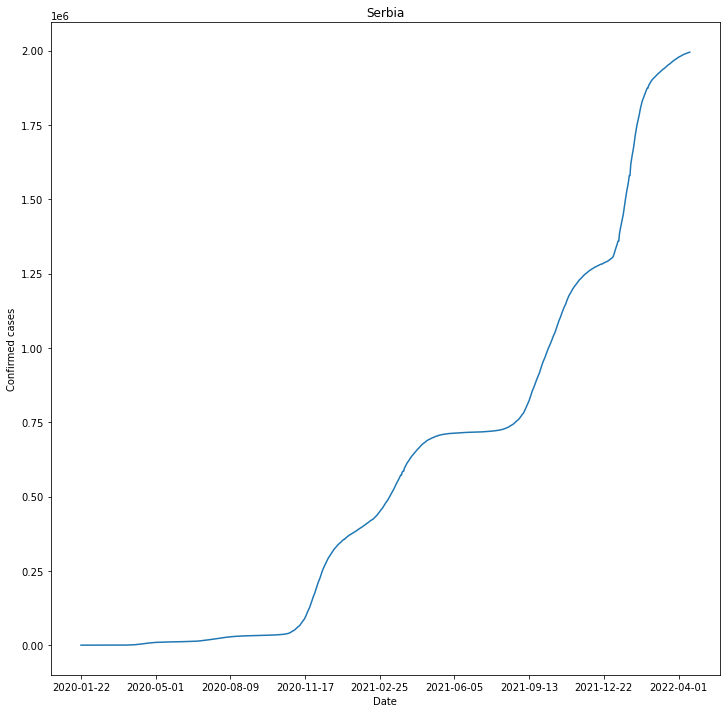

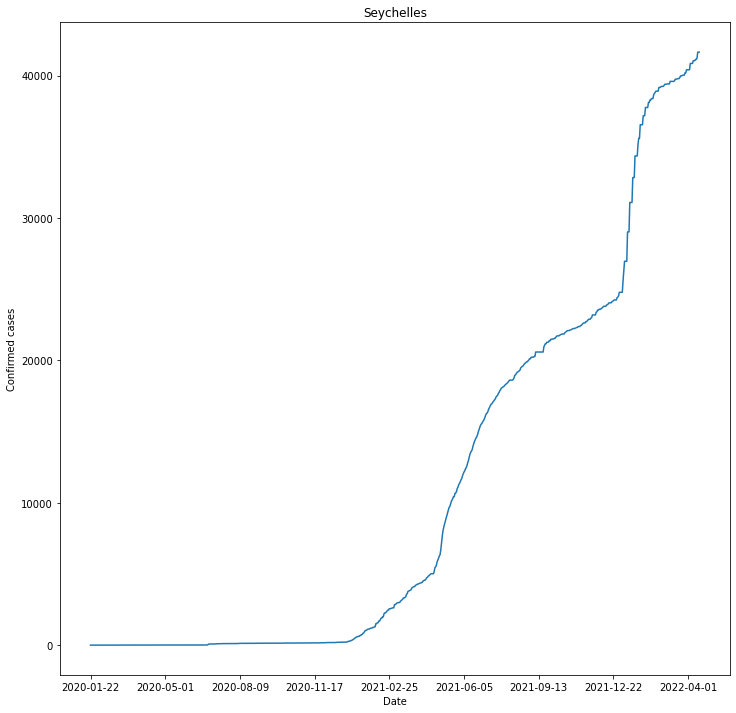

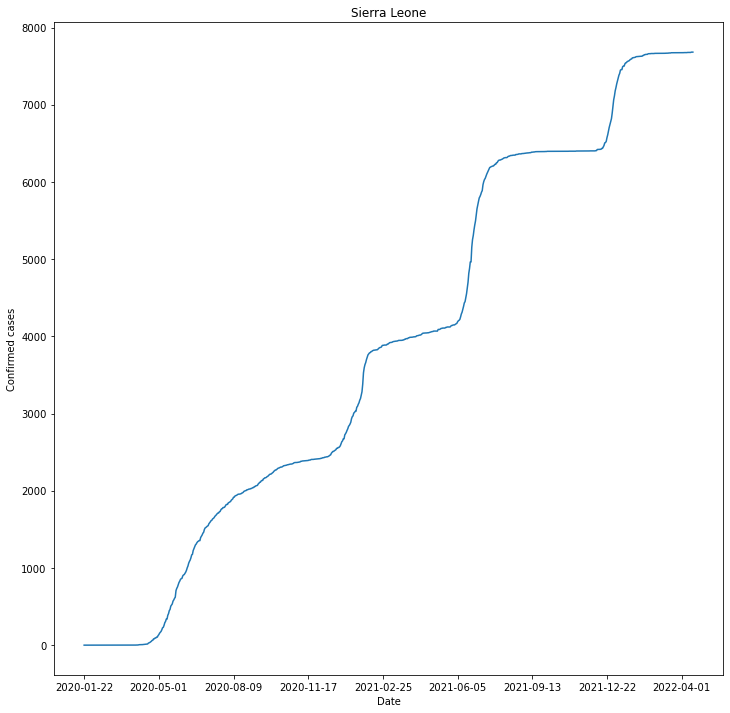

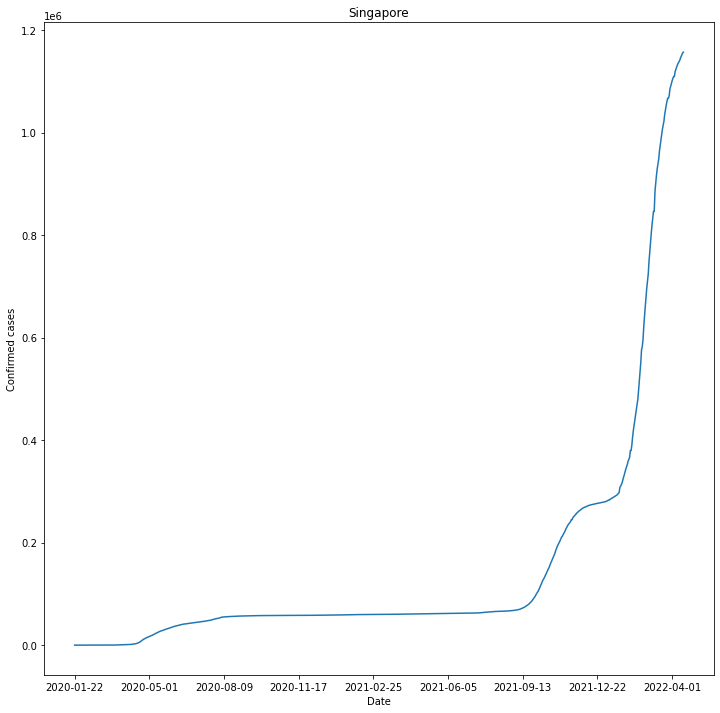

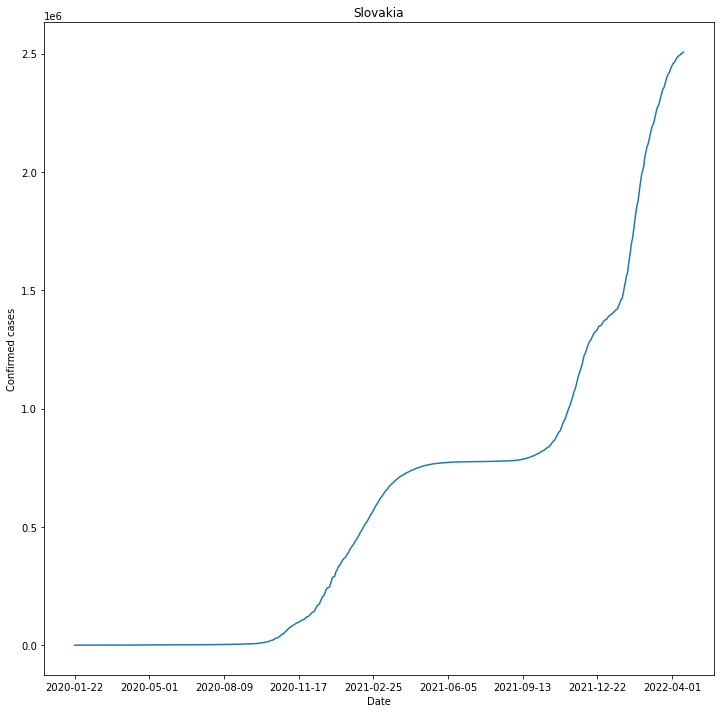

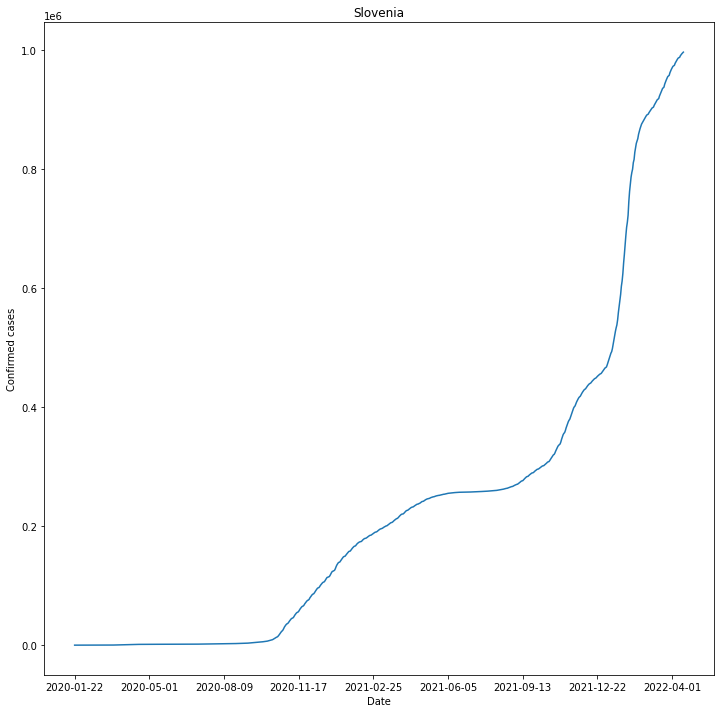

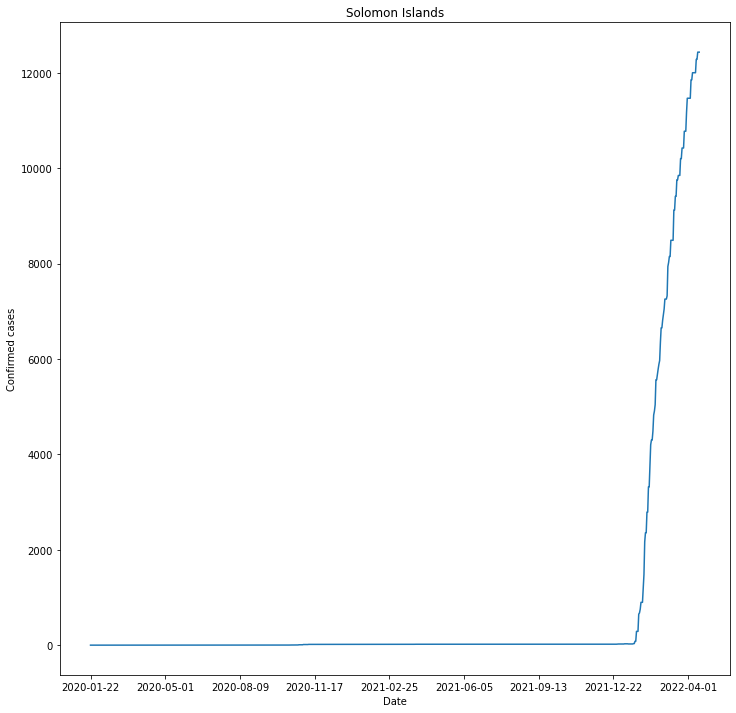

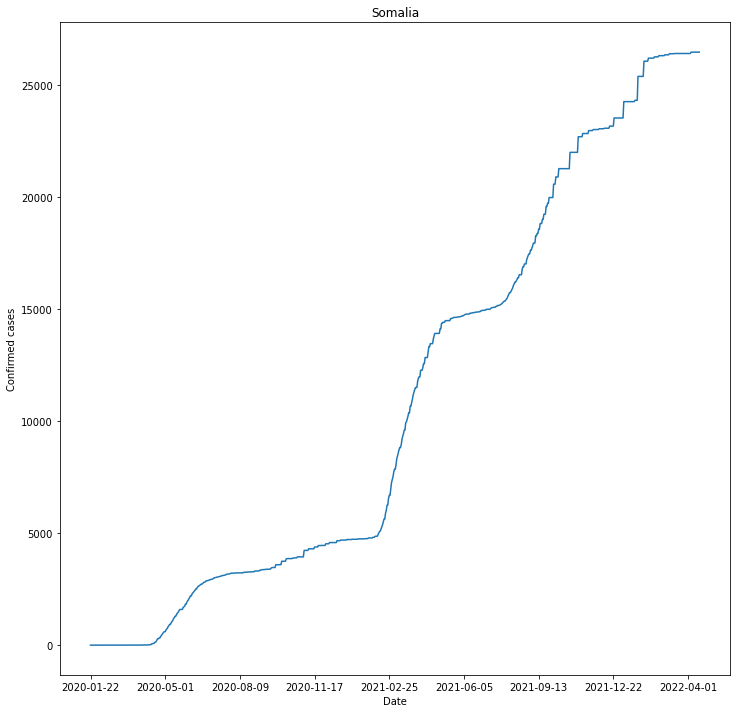

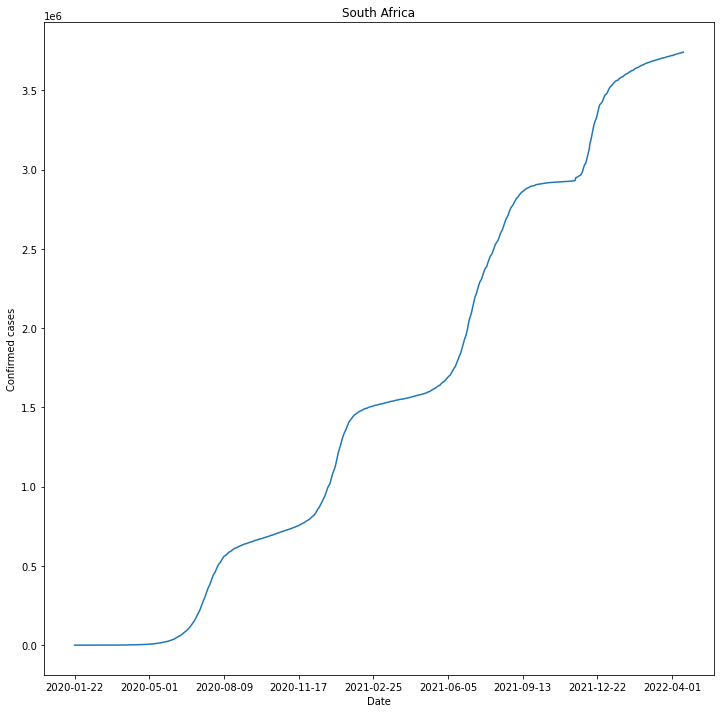

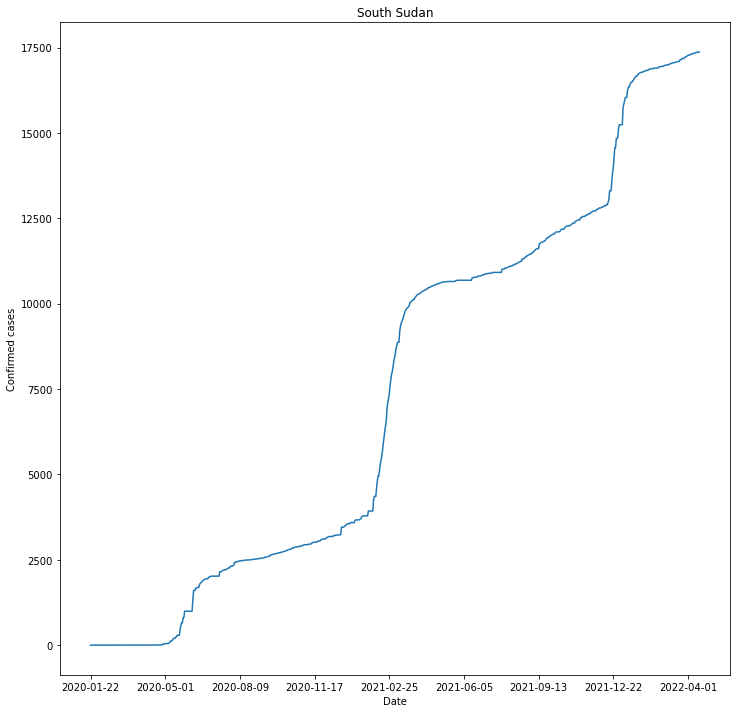

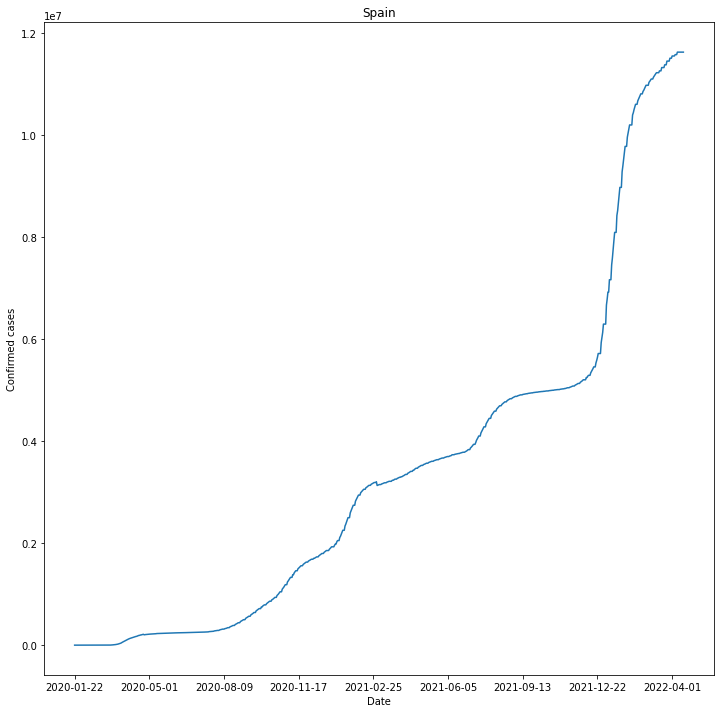

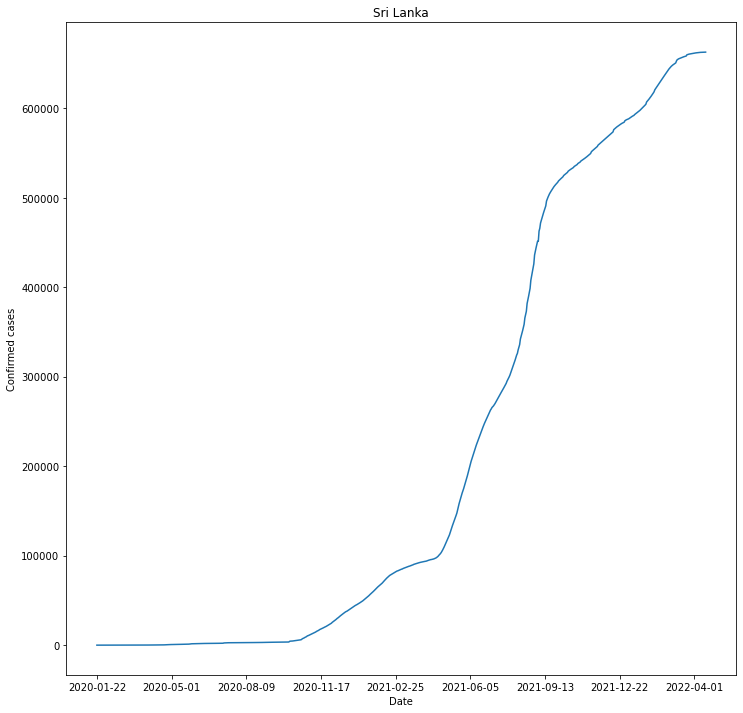

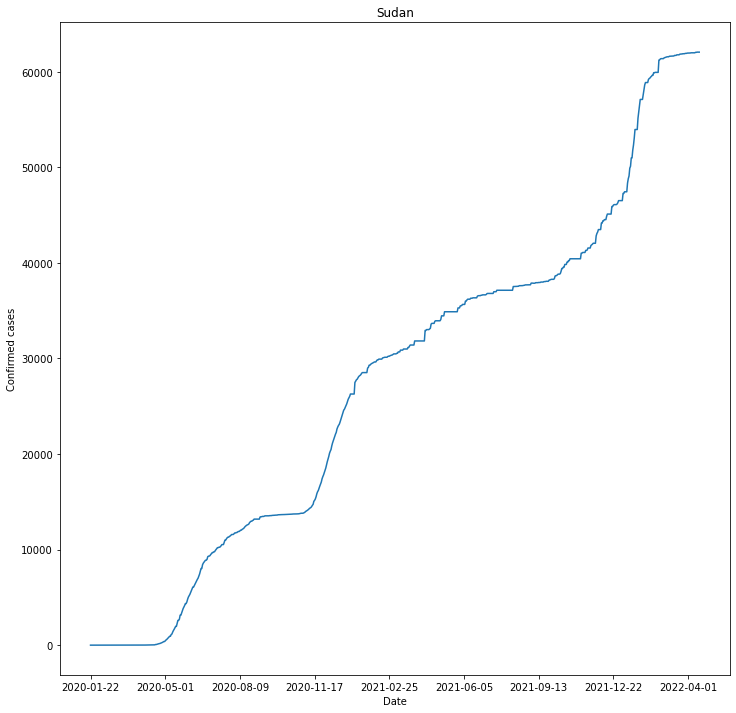

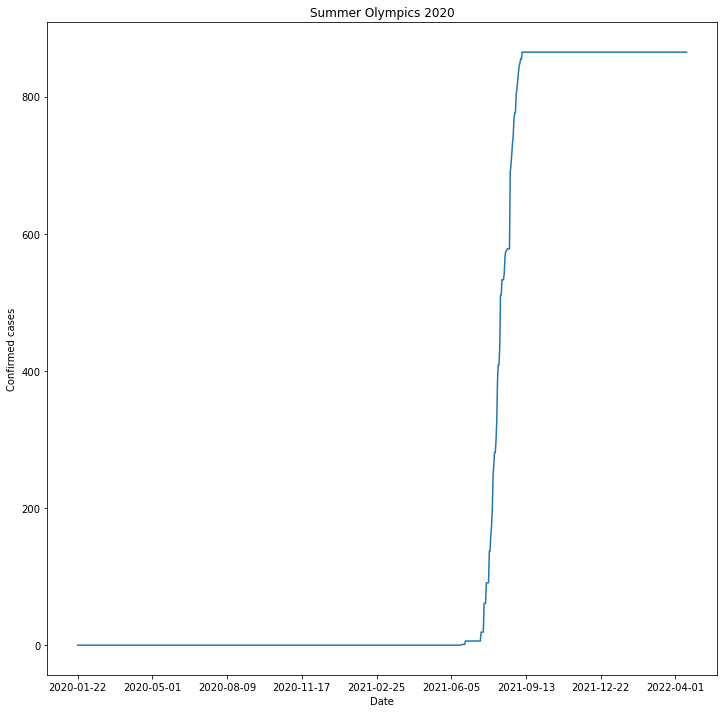

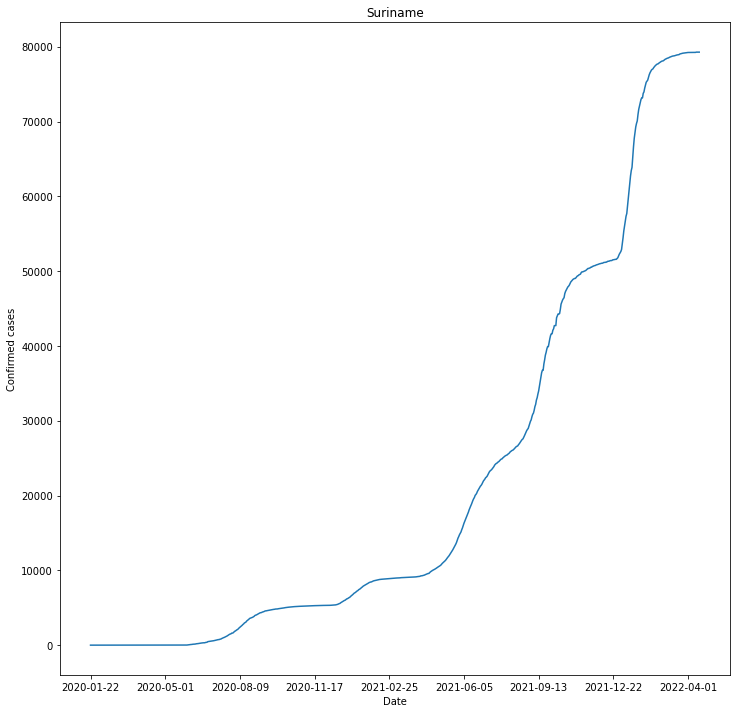

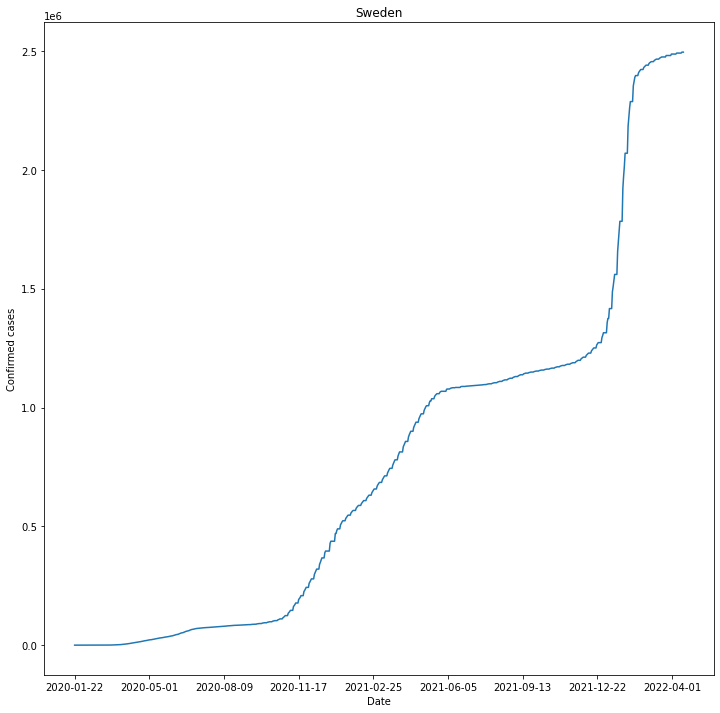

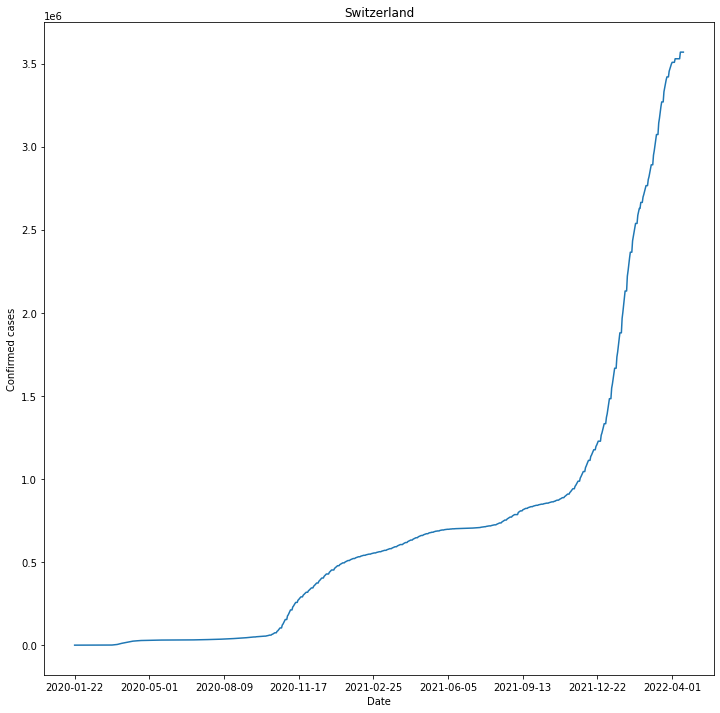

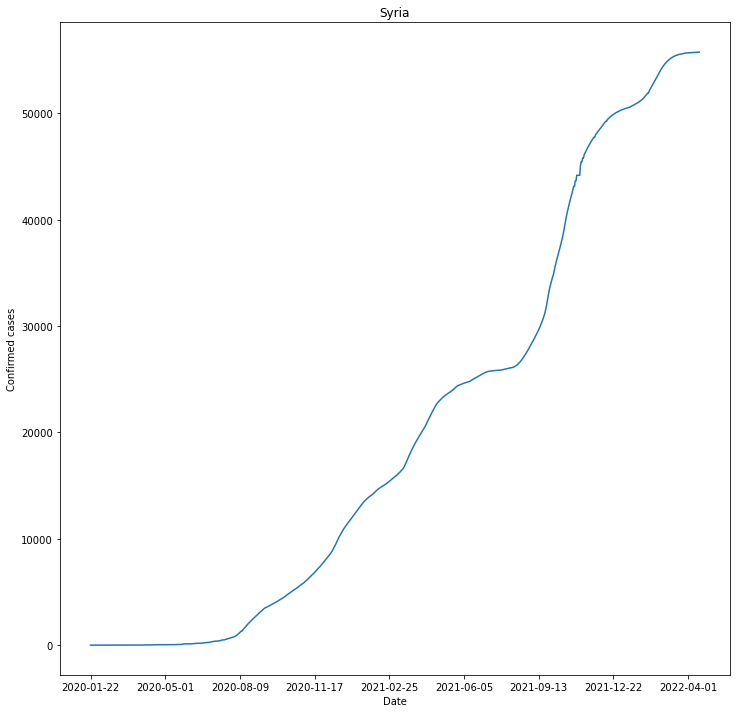

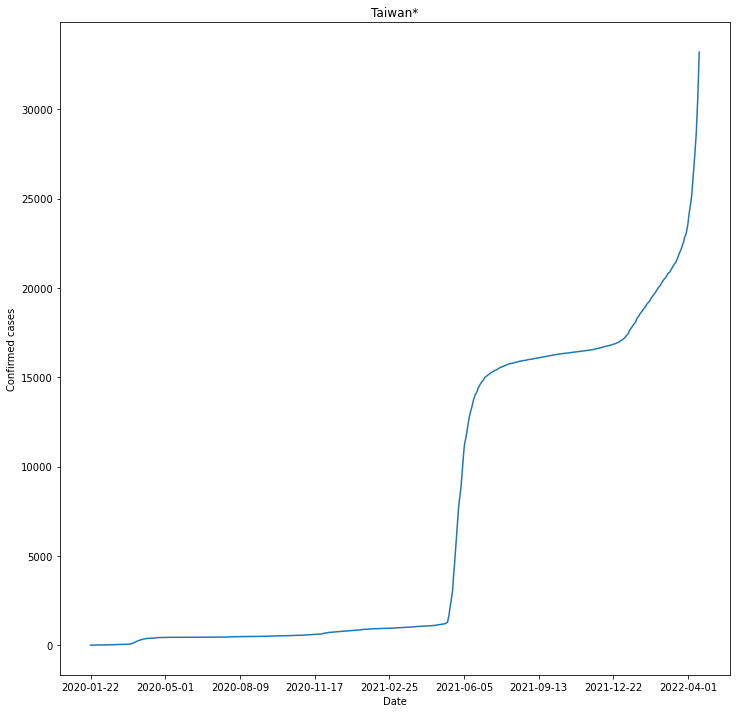

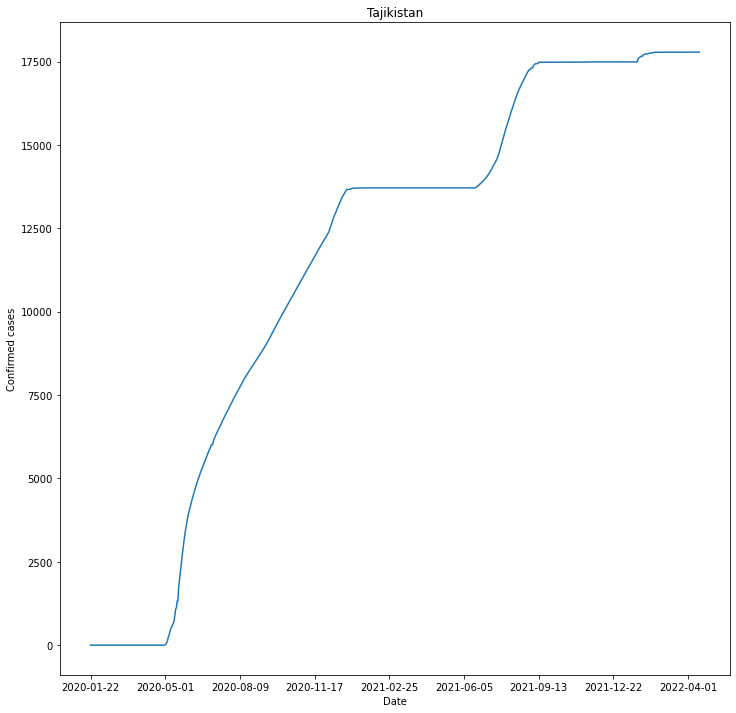

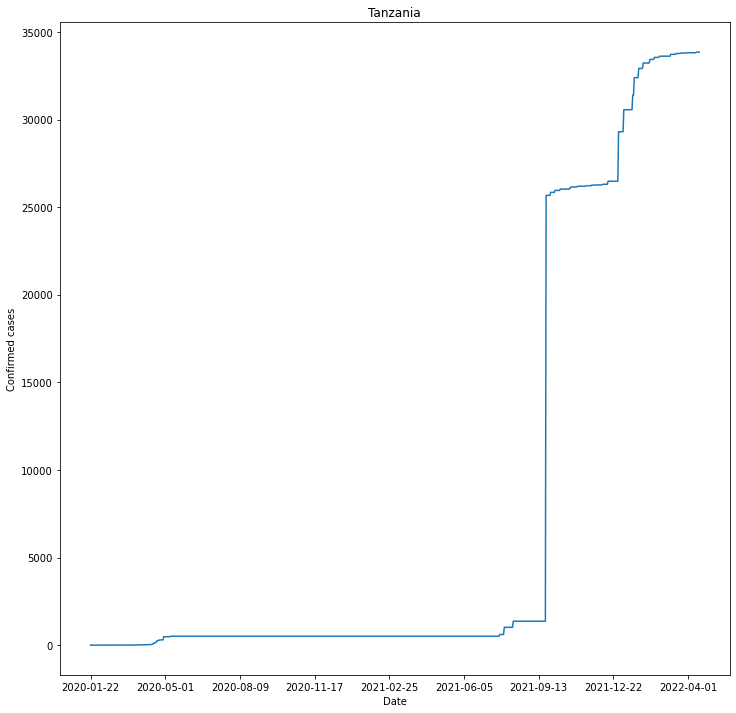

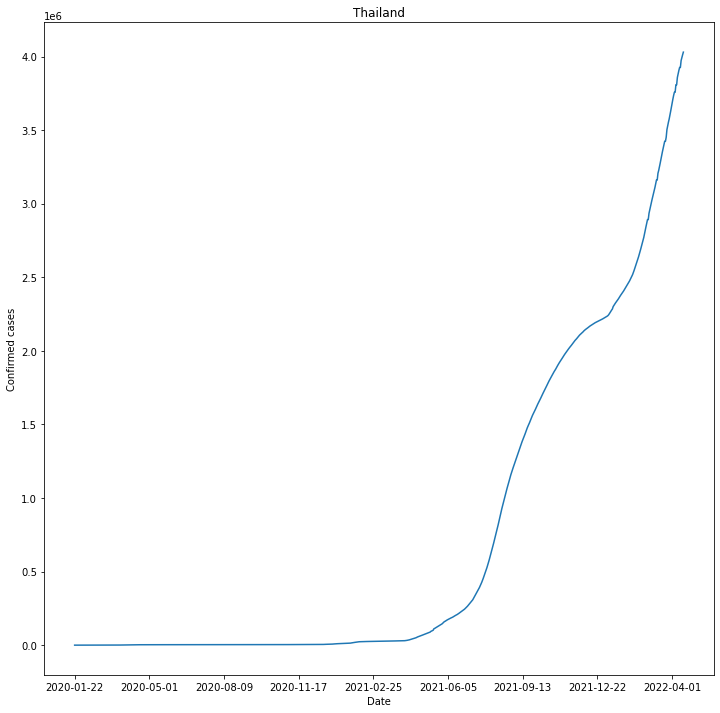

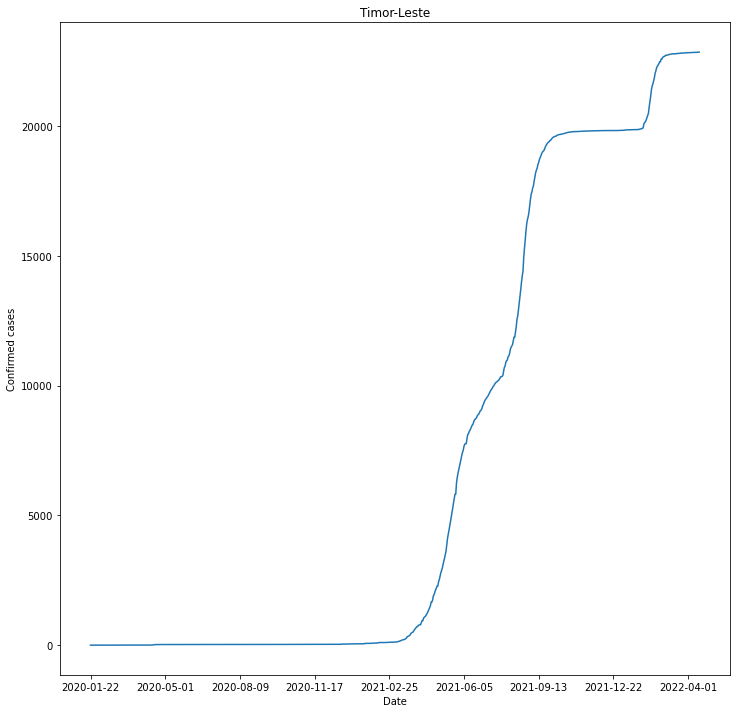

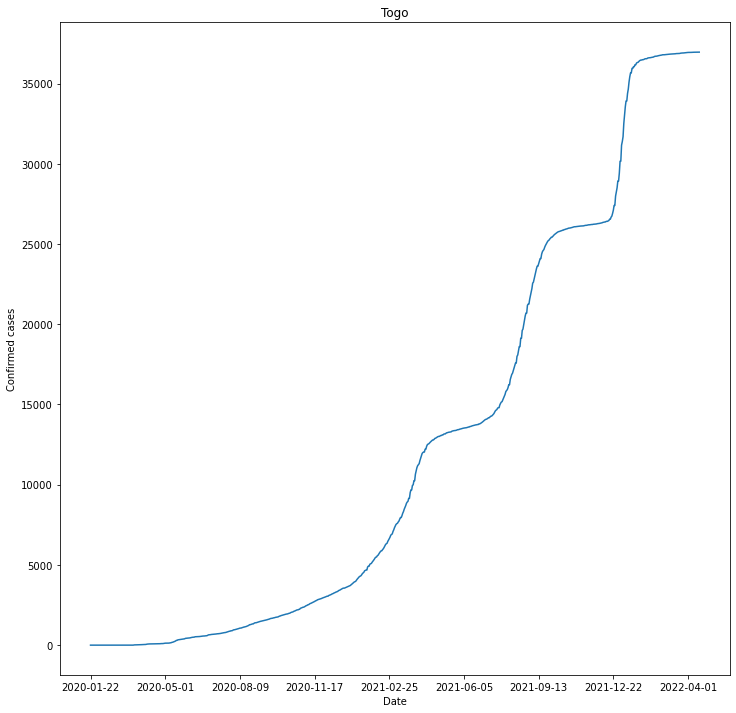

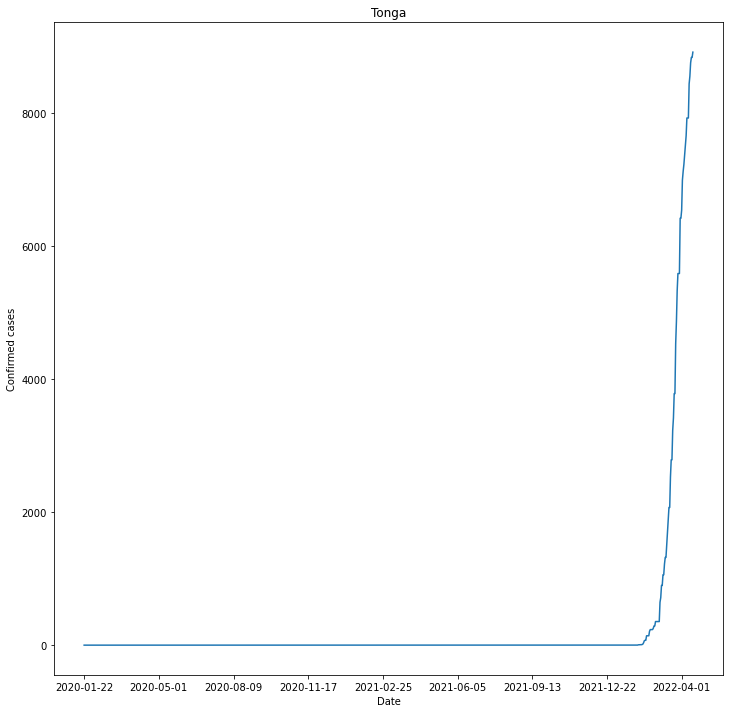

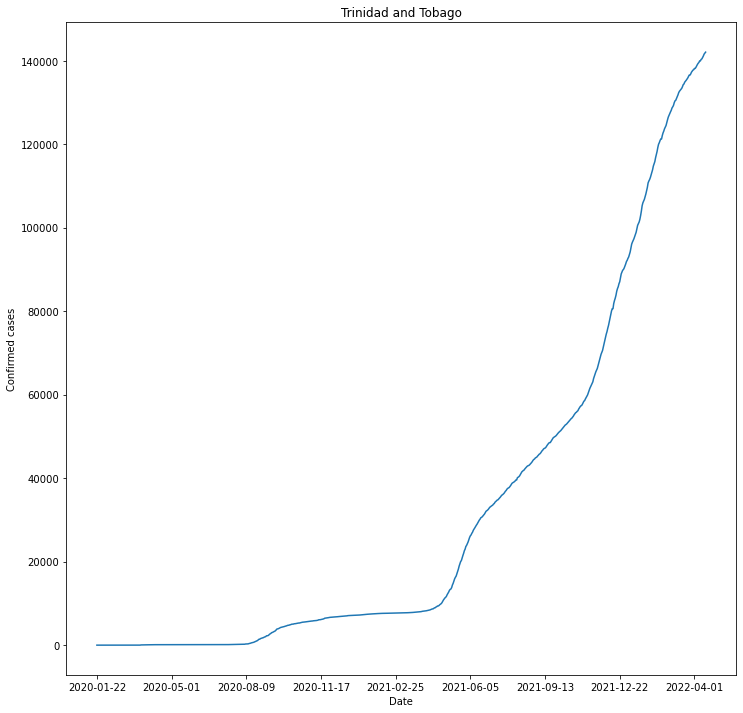

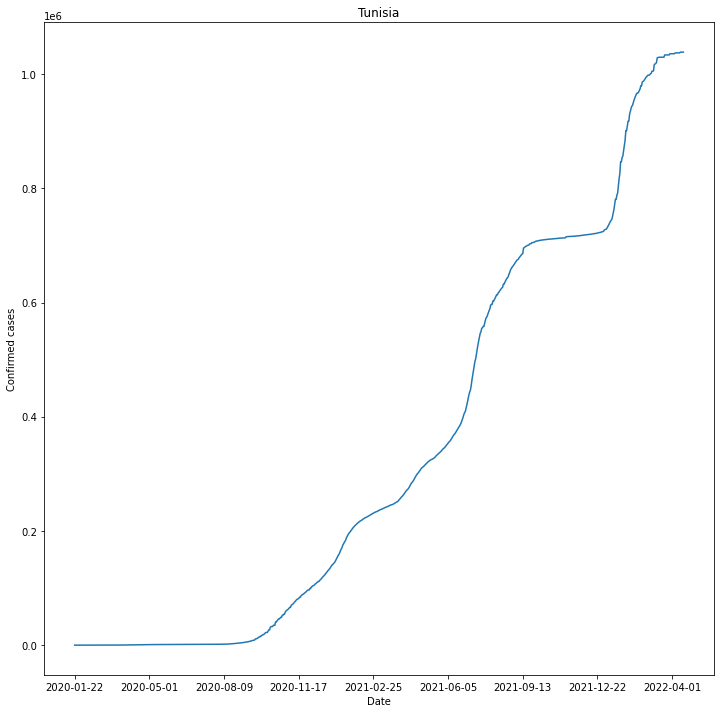

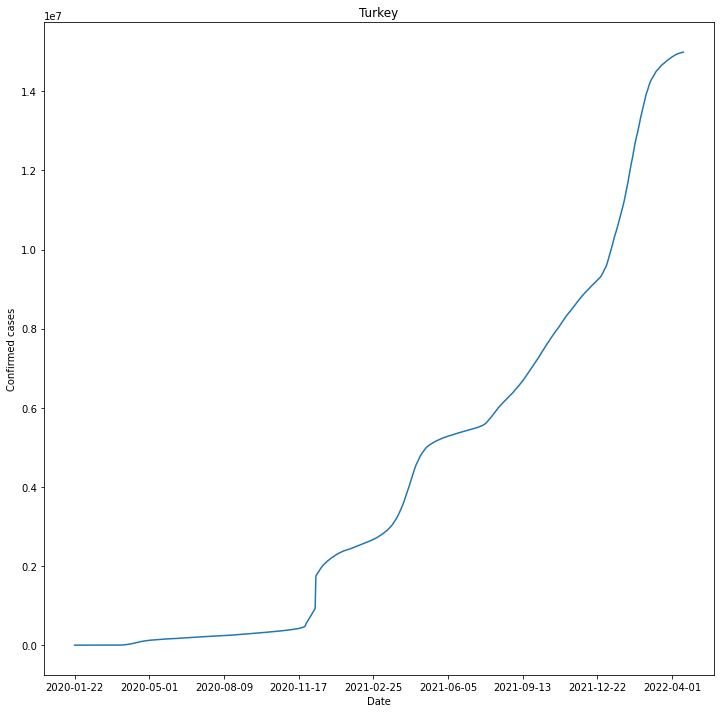

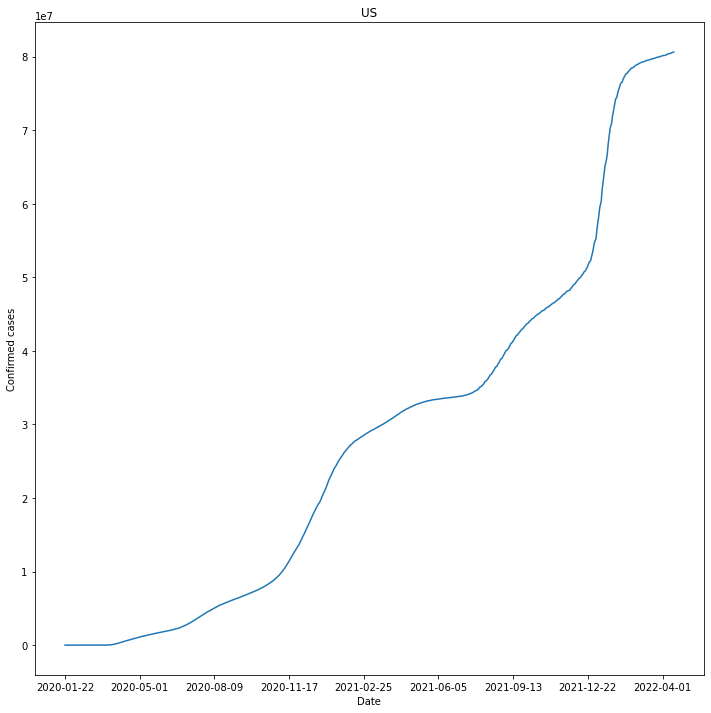

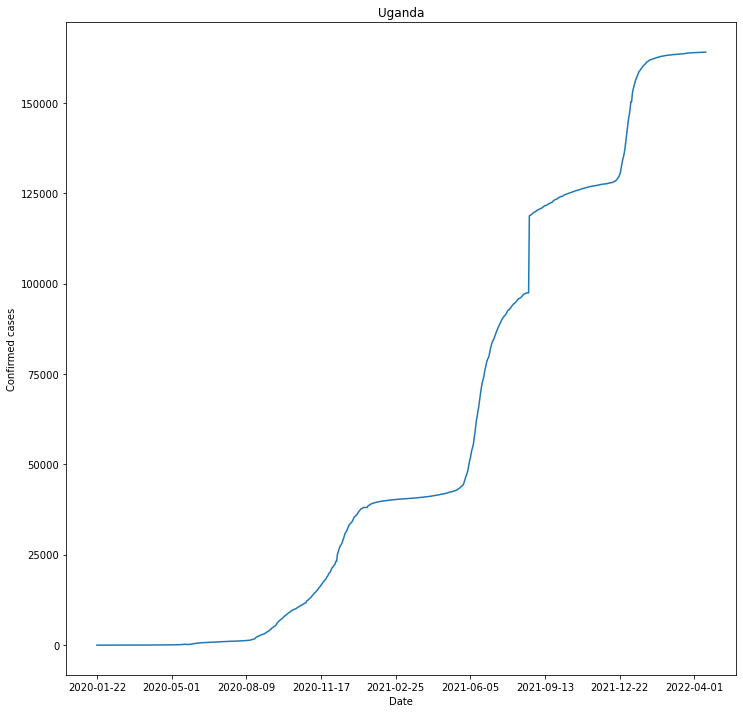

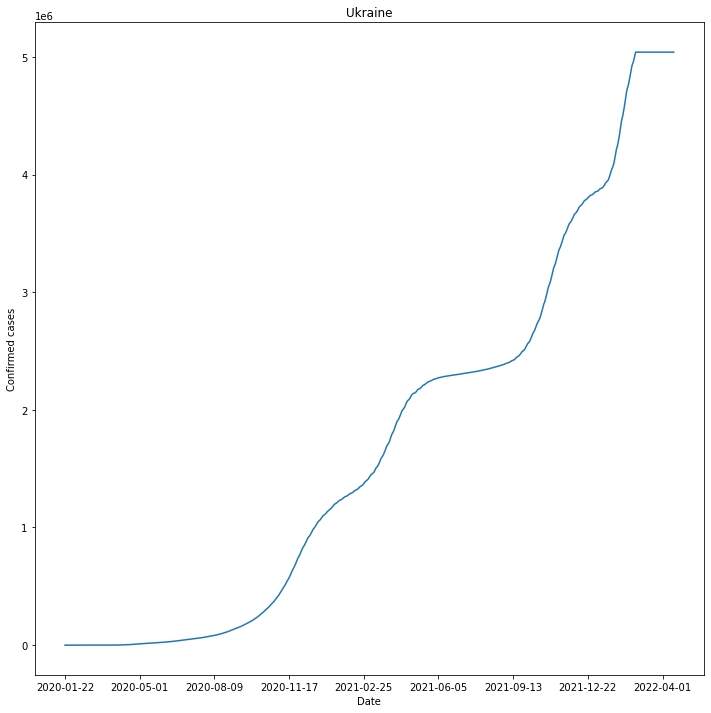

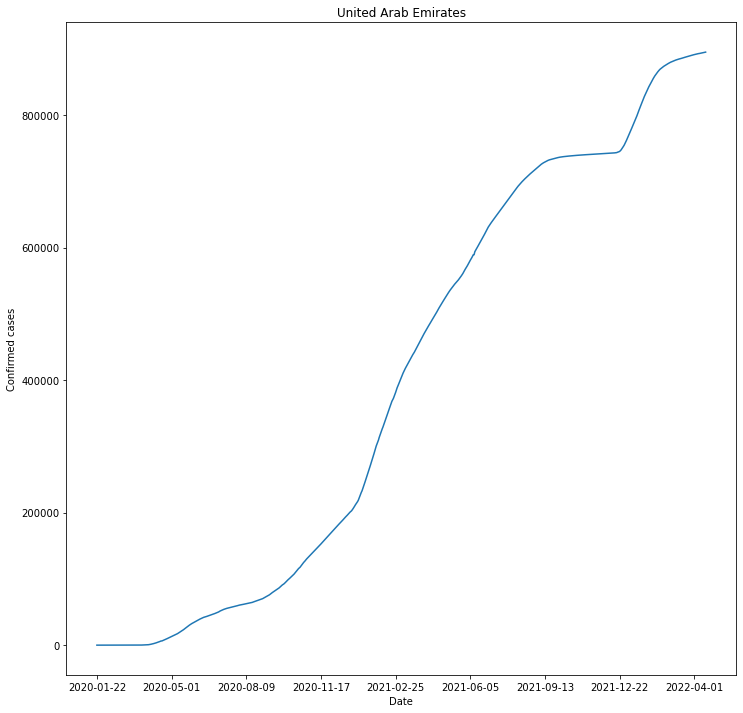

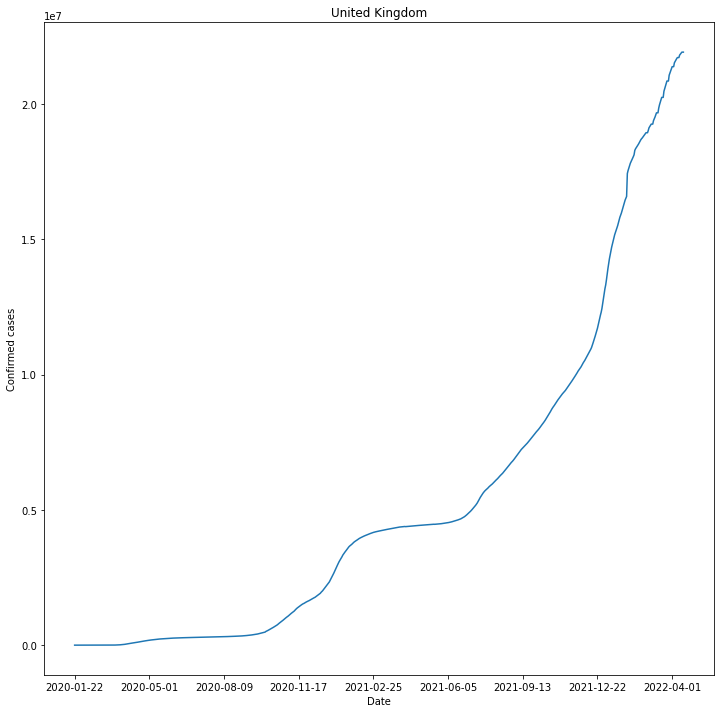

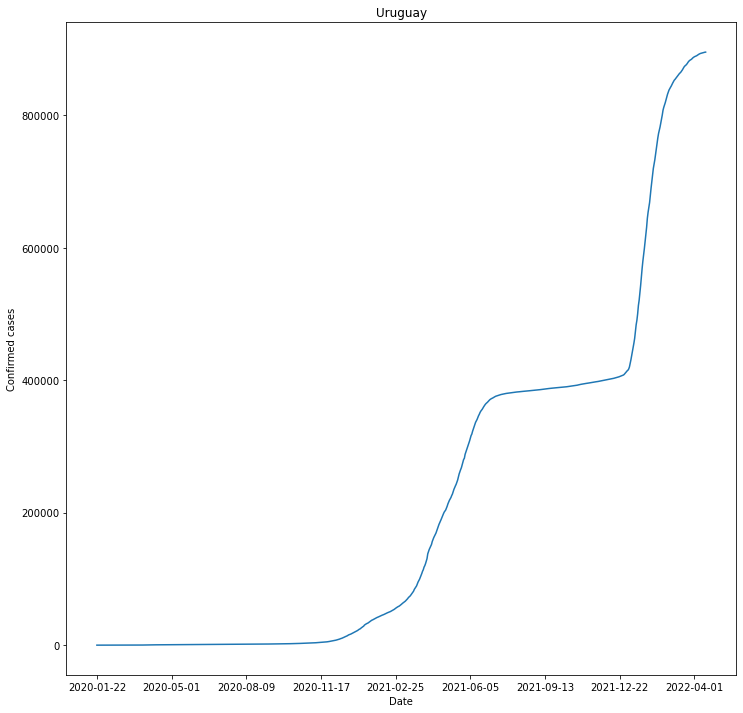

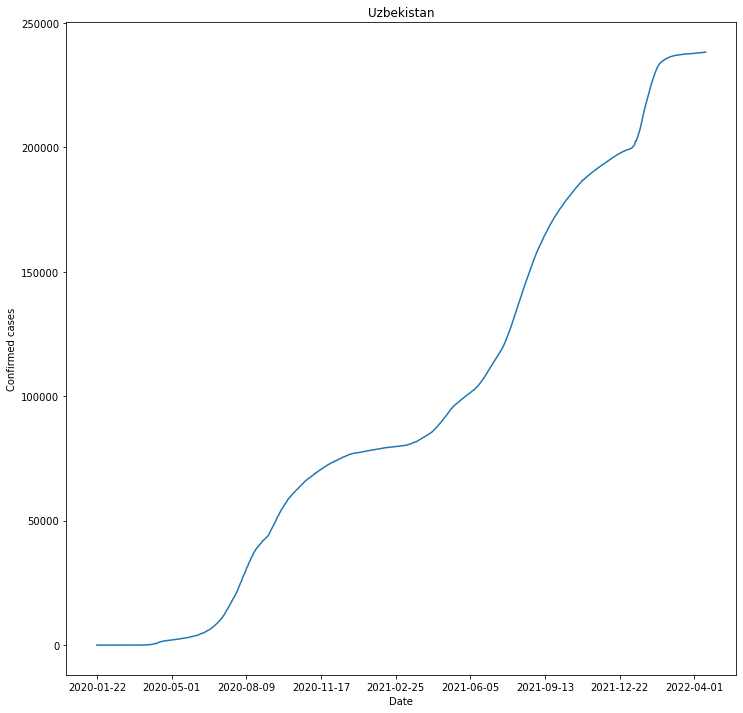

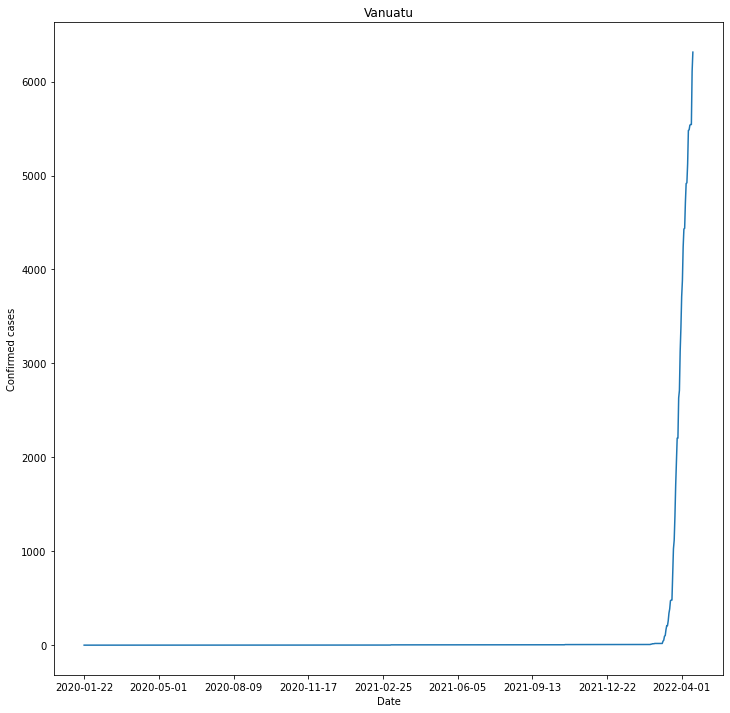

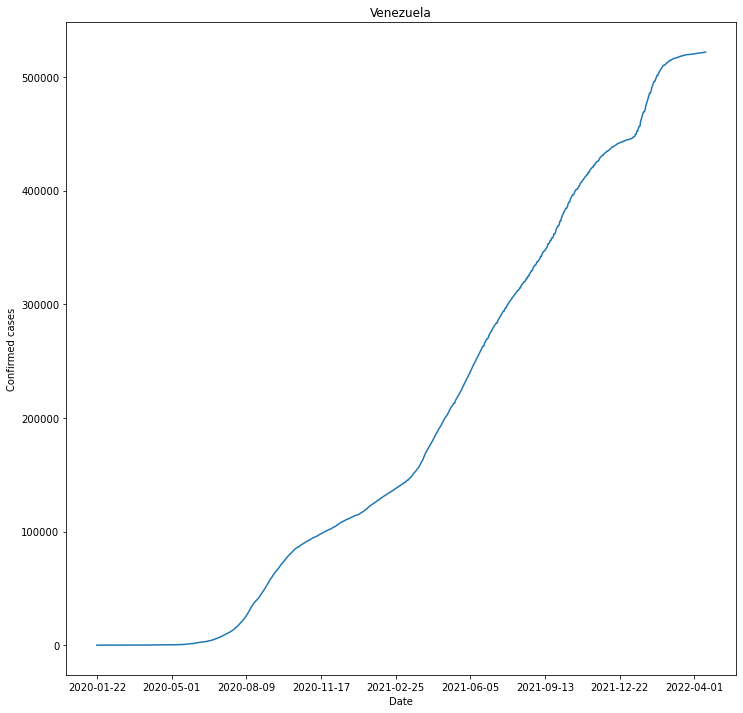

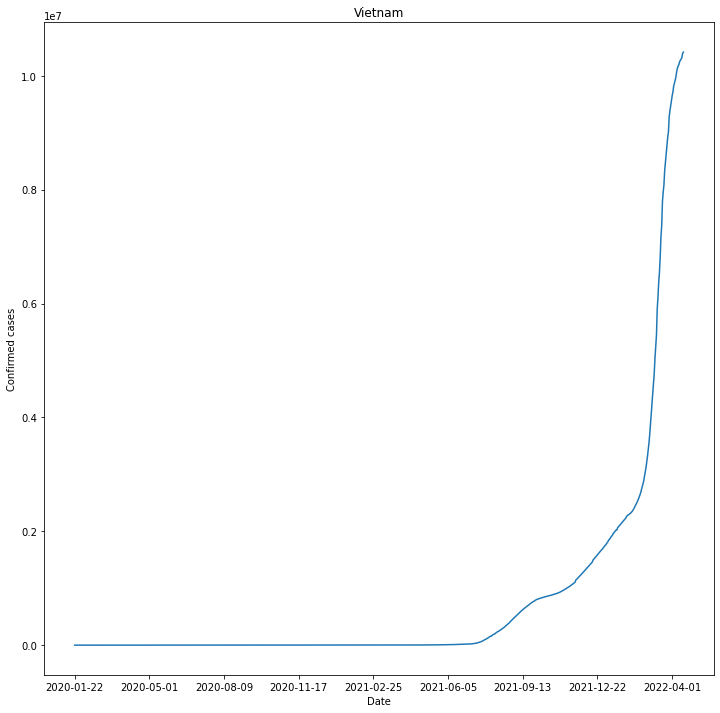

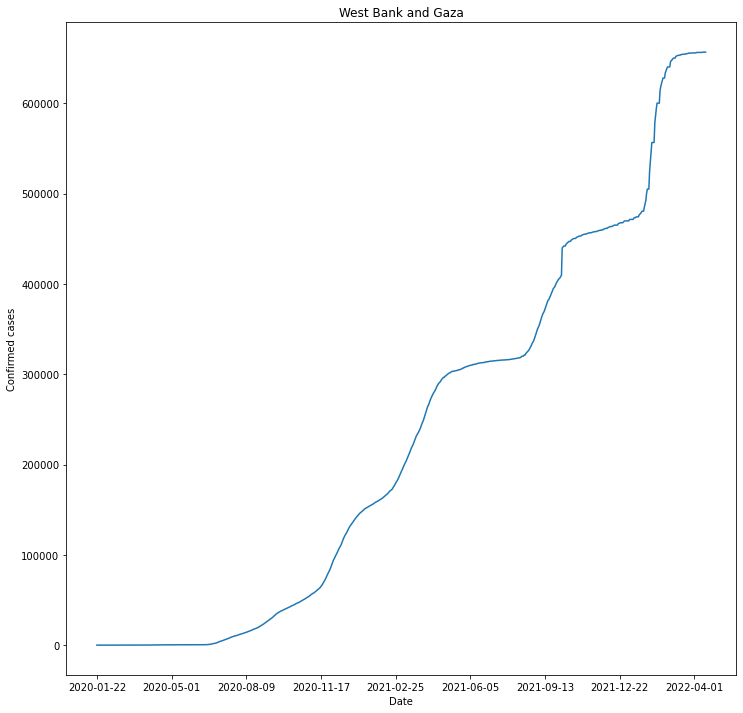

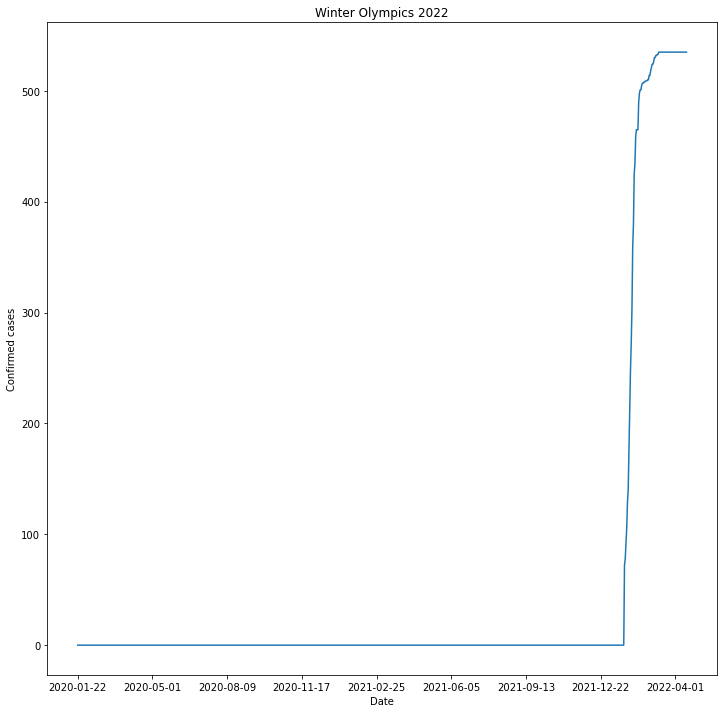

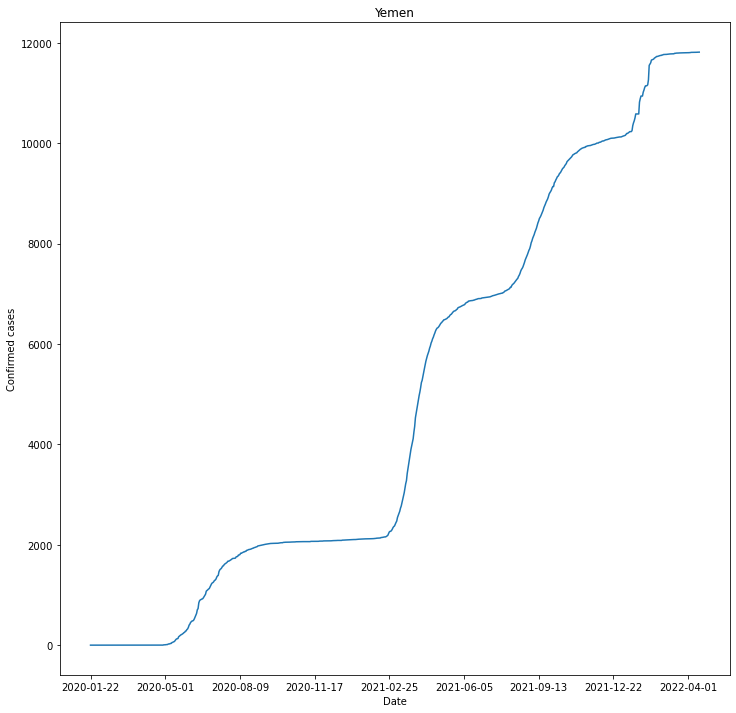

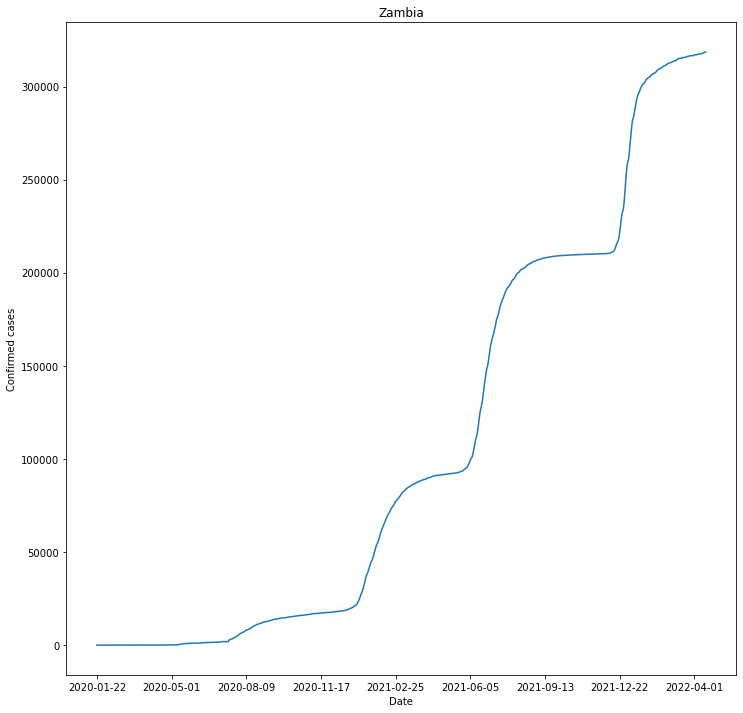

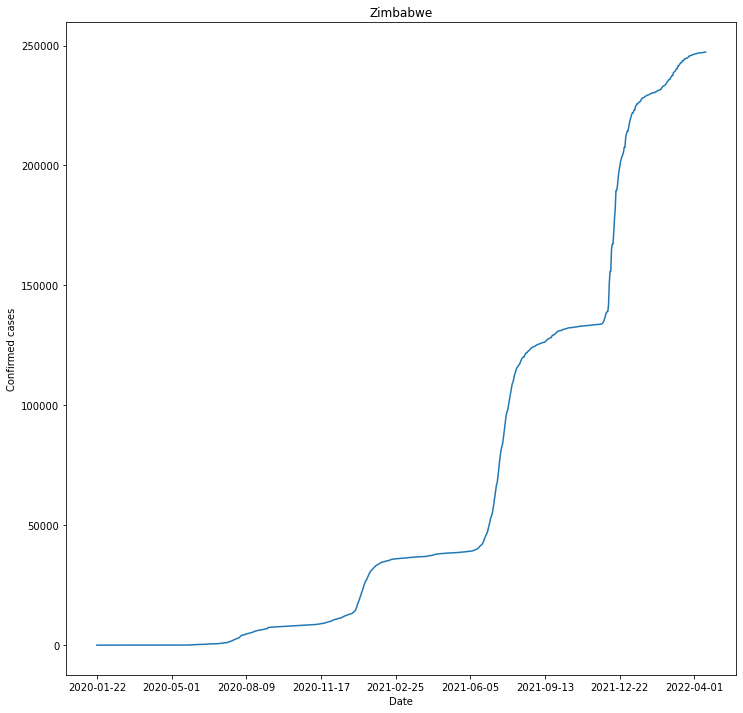

In [336]:
#5
#plotting graphs for all the countries with confirmed cases

temp_df = df.groupby(['Country/Region', 'Date'])['Confirmed'].sum()

for i in df['Country/Region'].unique():    
    plt.xlabel("Date")
    plt.ylabel("Confirmed cases")
    plt.title(i)
    temp_df.loc[i].plot()
    plt.show()

# Top 20 countries with high mortality rate

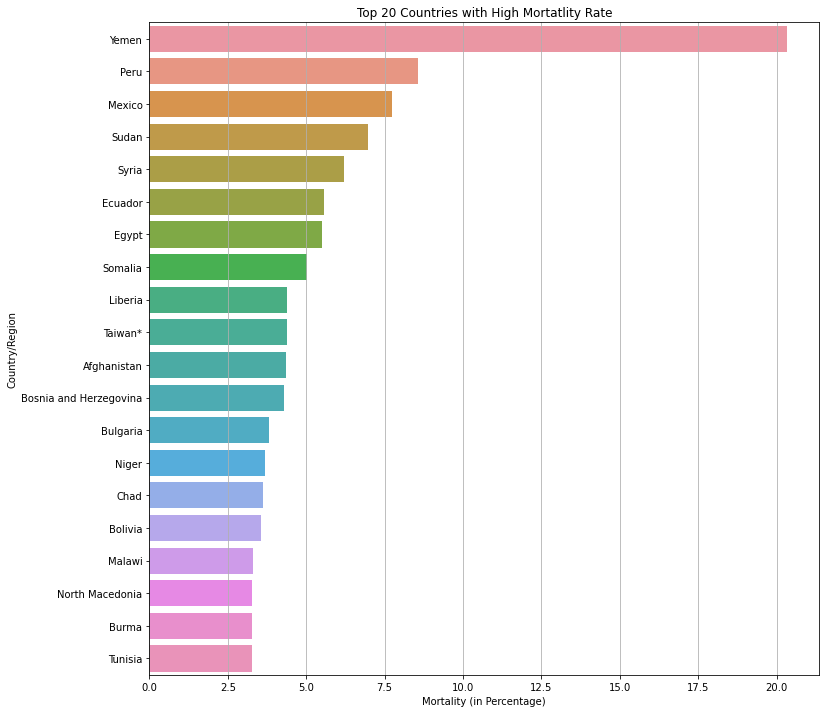

In [337]:
#6 Plotting Mortality rate

df_daily = df_daily.reset_index()
mortality_df = df_daily.groupby('Country/Region').aggregate({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

mortality_df['Mortality'] = (mortality_df['Deaths']/mortality_df['Confirmed'])*100
mortality_df_sort = mortality_df.sort_values(by = 'Mortality', ascending=False)
mortality_df_sort = mortality_df_sort.head(20)
mortality_df_sort = mortality_df_sort[['Mortality']]

ax = sns.barplot(x=mortality_df_sort["Mortality"],y=mortality_df_sort.index)

#setting title and labels
ax.set_title("Top 20 Countries with High Mortatlity Rate")
ax.set_xlabel("Mortality (in Percentage)")

#showing grid lines
plt.gca().xaxis.grid(True)
plt.show()

## 7.  Compute the ratio between the total number of confirmed cases and the population size of each country. What are the 10 countries with the highest number of confirmed COVID-19 cases per capita?

In [338]:
#reading from json file
wp = pd.read_json('worldpopulation.json')
wp.head(10)

#Renaming column names to merge the two data frames on the same column name
wp.rename(columns = {'country':'Country/Region'}, inplace = True)

#replacing all the abbreviations to it's proper names
wp['Country/Region']=wp['Country/Region'].replace({'U.S.': 'US', 'Viet Nam' :'Vietnam', 'U.K.':'United Kingdom', 'Myanmar':'Burma',
                                                   'South Korea':'Korea, South',  'Côte d\'Ivoire':'Cote d\'Ivoire', 'Czech Republic':'Czechia',
                                                   'DR Congo':'Congo (Kinshasa)', 'Congo':'Congo (Brazzaville)', 'TFYR Macedonia':'North Macedonia',
                                                   'Swaziland':'Eswatini', 'St. Vincent & Grenadines':'Saint Vincent and the Grenadines',
                                                   'State of Palestine':'West Bank and Gaza'})

wp

df1 = df_recent_date.groupby(['Country/Region',])['Confirmed','Deaths','Recovered'].max().reset_index()
df1
df2 = df1.groupby('Country/Region').sum().reset_index()
df_merge = pd.merge(df2, wp, on = "Country/Region", how = "inner")

#create a new column confirmed per captia and update the column values
df_merge['confirmed_per_capita']=df_merge['Confirmed']/df_merge['population']
df_merge_sorted = df_merge.sort_values(by = 'confirmed_per_capita', ascending=False)
df_merge_sorted.head(10)

Country/Region  Confirmed  Deaths  Recovered  Rank  population  World  \
3          Andorra      40709     153        0.0   186       68728  0.000   
47         Denmark    3143644    6034        0.0   112     5711837  0.001   
77         Iceland     183974     110        0.0   172      334303  0.000   
147     San Marino      15874     114        0.0   191       32104  0.000   
83          Israel    4029066   10612        0.0    97     8323248  0.001   
156       Slovenia     996832    6556        0.0   145     2071252  0.000   
122    Netherlands    8194946   22780        0.0    66    17032845  0.002   
106       Maldives     178320     298        0.0   170      375867  0.000   
9          Austria    4045809   16407        0.0    95     8592400  0.001   
155       Slovakia    2505968   19721        0.0   116     5432157  0.001   

     confirmed_per_capita  
3                0.592320  
47               0.550374  
77               0.550321  
147              0.494456  
83               0.484074  
156              0.481270  
122              0.481126  
106              0.474423  
9                0.470859  
155              0.461321

## 8. Hypothesis testing

In [339]:
# reading the json file (not loading as dataframe as done above)
with open('climate.json') as f:
    climate_json = json.load(f)


climate_df = pd.DataFrame()


# create columns and fill them from the file
climate_df['city'] = [record['city'] for record in climate_json]
climate_df['Country/Region'] = [record['country'] for record in climate_json]

# create 12 months columns for each country and fill them with their avg temperature every month
for i in range(12):
    climate_df[f'Avg temp of month{i+1}'] = [(record['monthlyAvg'][i]['high'] + record['monthlyAvg'][i]['low'])/2  for record in climate_json]
    
climate_avg = climate_df.groupby('Country/Region').mean(numeric_only=True).round(2).reset_index()
climate_avg

climate_merged = pd.merge(df_merge,country_avgs , on = "Country/Region", how = "inner")
climate_merged

Country/Region  Confirmed  Deaths  Recovered  Rank  population  \
0              Argentina    9060495  128344        0.0    32    44272125   
1              Australia    5384615    6779        0.0    53    24641662   
2                Austria    4045809   16407        0.0    95     8592400   
3                Belgium    3972963   31165        0.0    79    11443830   
4                 Brazil   30250077  662185        0.0     5   211243220   
5               Bulgaria    1149225   36782        0.0   102     7045259   
6                 Canada    3633935   38362        0.0    38    36626083   
7                  Chile    3528626   57231        0.0    62    18313495   
8                  China    1760211   13748        0.0     1  1388232693   
9                Denmark    3143644    6034        0.0   112     5711837   
10                France   27874269  145159        0.0    22    64938716   
11               Germany   23416663  132942        0.0    18    80636124   
12                Greece    3232496   28537        0.0    84    10892931   
13               Hungary    1879480   45865        0.0    90     9787905   
14               Iceland     183974     110        0.0   172      334303   
15                 India   43042097  521751        0.0     2  1342512706   
16             Indonesia    6039266  155844        0.0     4   263510146   
17               Ireland    1498834    6932        0.0   122     4749153   
18                Israel    4029066   10612        0.0    97     8323248   
19                 Italy   15659835  161602        0.0    23    59797978   
20                 Japan    7332261   28998        0.0    11   126045211   
21              Malaysia    4382402   35409        0.0    44    31164177   
22                Mexico    5726668  323938        0.0    10   130222815   
23               Morocco    1164345   16062        0.0    39    35241418   
24           Netherlands    8194946   22780        0.0    66    17032845   
25           New Zealand     828808     554        0.0   125     4604871   
26                Norway    1419507    2783        0.0   117     5330800   
27                Poland    5984940  115838        0.0    37    38563573   
28              Portugal    3719485   21993        0.0    87    10264797   
29                Russia   17801103  365774        0.0     9   143375006   
30             Singapore    1157251    1313        0.0   111     5784538   
31          South Africa    3740398  100144        0.0    25    55436360   
32                 Spain   11627487  103104        0.0    30    46070146   
33                Sweden    2495996   18605        0.0    89     9920624   
34           Switzerland    3568616   13647        0.0    96     8454083   
35              Thailand    4029959   26882        0.0    20    68297547   
36                Turkey   14991669   98551        0.0    19    80417526   
37  United Arab Emirates     895264    2302        0.0    92     9397599   
38        United Kingdom   21916961  172014        0.0    21    65511098   
39               Vietnam   10417887   42934        0.0    14    95414640   

    World  confirmed_per_capita  Avg temp of month1  Avg temp of month2  \
0   0.006              0.204655               25.00               24.00   
1   0.003              0.218517               22.00               22.25   
2   0.001              0.470859                0.00                2.00   
3   0.002              0.347171                3.50                4.50   
4   0.028              0.143200               26.17               26.33   
5   0.001              0.163120               -0.50                1.50   
6   0.005              0.099217               -6.14               -4.86   
7   0.002              0.192679               21.50               21.00   
8   0.185              0.001268                0.50                3.50   
9   0.001              0.550374                1.50                2.00   
10  0.009              0.429240                6.00                6

[Text(0.5, 1.0, 'India Covid spread w Avg temperature over time')]

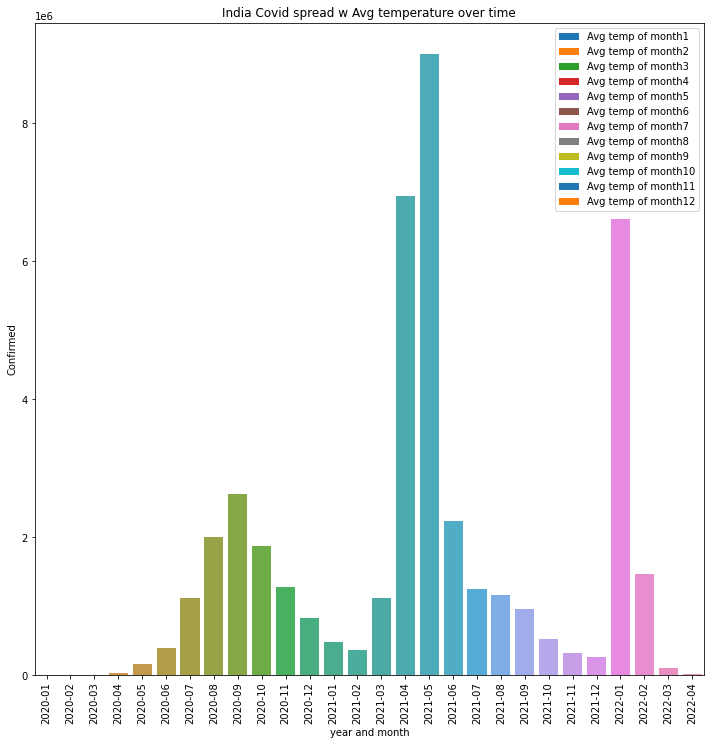

In [340]:
#For India
temp_df = df.groupby(['Country/Region','Date']).sum()
ind = temp_df.loc['India'].reset_index()
ind['Date'] = pd.to_datetime(ind['Date'])
ind['year and month'] = ind['Date'].dt.to_period('M')
ind_temp_df = climate_merged[(climate_merged['Country/Region']=='India')]
ind_temp_df = ind_temp_df[['Avg temp of month1','Avg temp of month2','Avg temp of month3',
                          'Avg temp of month4', 'Avg temp of month5','Avg temp of month6',
                          'Avg temp of month7','Avg temp of month8','Avg temp of month9',
                          'Avg temp of month10', 'Avg temp of month11','Avg temp of month12']]

ind_temp_df.plot(kind = 'bar')
                                               
month_df =pd.DataFrame(ind.groupby('year and month')['Confirmed'].max())
month_df

#calculatibng each month confirmed cases using cum diff
diff_df=  month_df.diff().fillna(month_df.loc['2020-01']).reset_index()

diff_df
#diff_df['Confirmed'].plot(kind = 'bar', figsize = (8,8))

sns.barplot(data= diff_df, x = 'year and month' , y = 'Confirmed').set(title = 'India Covid spread w Avg temperature over time')

Text(0.5, 1.0, 'India Avg temperature')

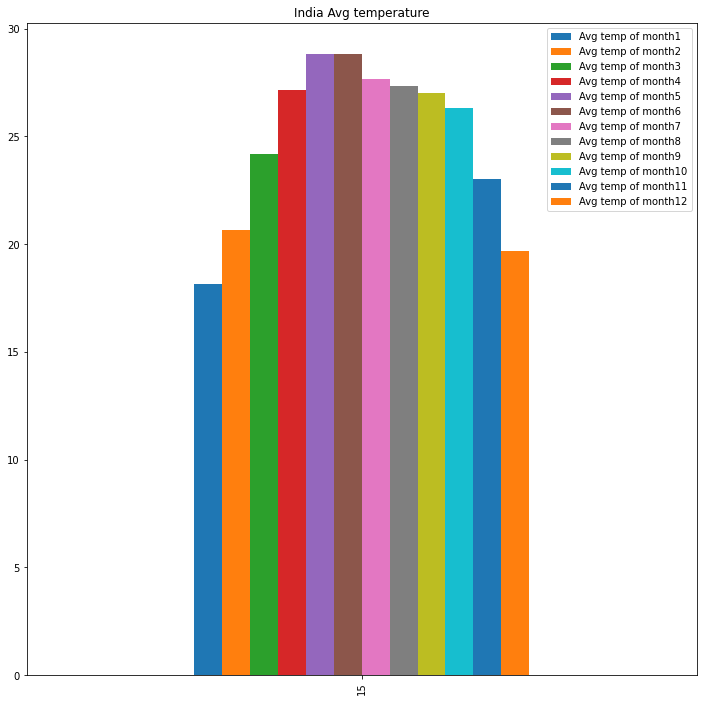

In [341]:
ind_temp_df.plot(kind = 'bar')
plt.title('India Avg temperature')

[Text(0.5, 1.0, 'China Covid spread w Avg temperature over time')]

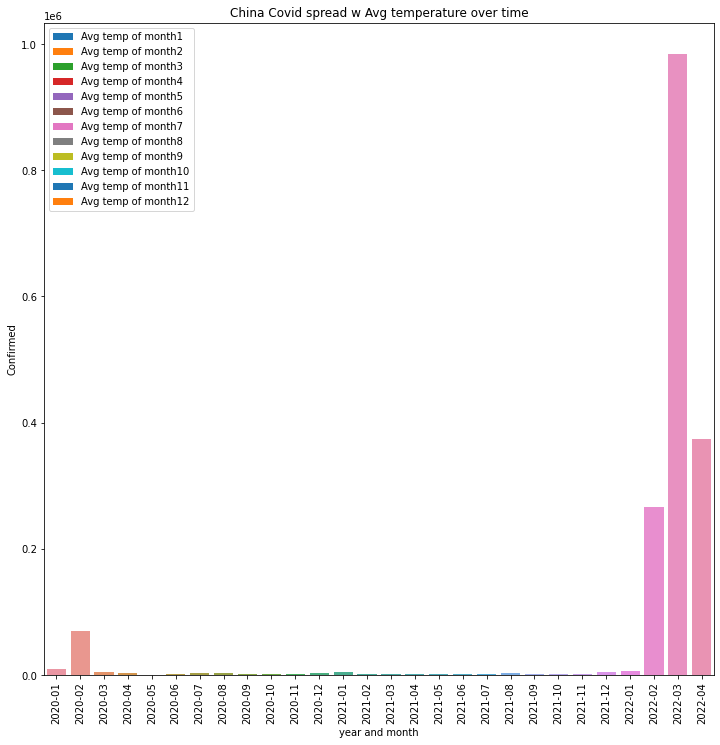

In [342]:
#For China
#For India
temp_df = df.groupby(['Country/Region','Date']).sum()
ch = temp_df.loc['China'].reset_index()
ch['Date'] = pd.to_datetime(ch['Date'])
ch['year and month'] = ch['Date'].dt.to_period('M')
ch_temp_df = climate_merged[(climate_merged['Country/Region']=='China')]
ch_temp_df = ch_temp_df[['Avg temp of month1','Avg temp of month2','Avg temp of month3',
                          'Avg temp of month4', 'Avg temp of month5','Avg temp of month6',
                          'Avg temp of month7','Avg temp of month8','Avg temp of month9',
                          'Avg temp of month10', 'Avg temp of month11','Avg temp of month12']]

ch_temp_df.plot(kind = 'bar')
                                               
month_df =pd.DataFrame(ch.groupby('year and month')['Confirmed'].max())
month_df

#calculating each month confirmed cases using cum diff
diff_df=  month_df.diff().fillna(month_df.loc['2020-01']).reset_index()

diff_df
#diff_df['Confirmed'].plot(kind = 'bar', figsize = (8,8))

sns.barplot(data= diff_df, x = 'year and month' , y = 'Confirmed').set(title = 'China Covid spread w Avg temperature over time')

Text(0.5, 1.0, 'China Avg temperature')

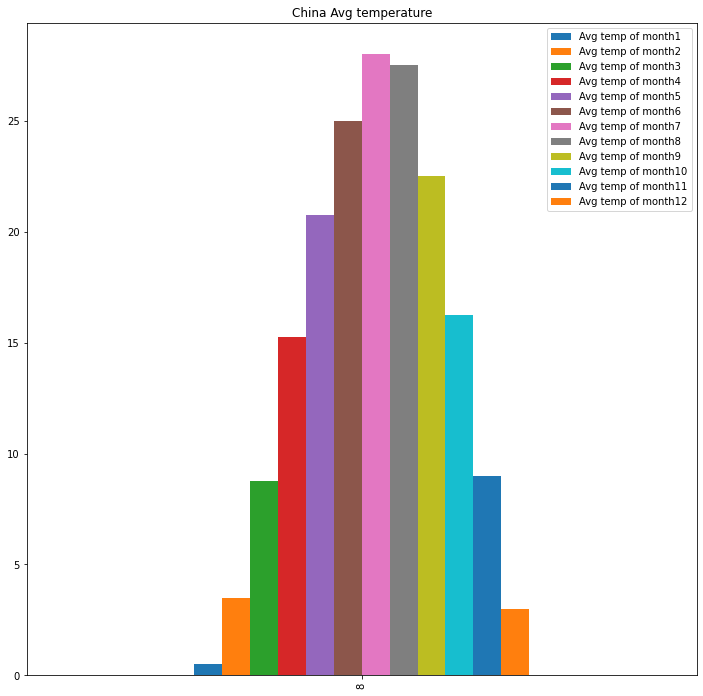

In [343]:
ch_temp_df.plot(kind = 'bar')
plt.title('China Avg temperature')

[Text(0.5, 1.0, 'Russia Covid spread w Avg temperature over time')]

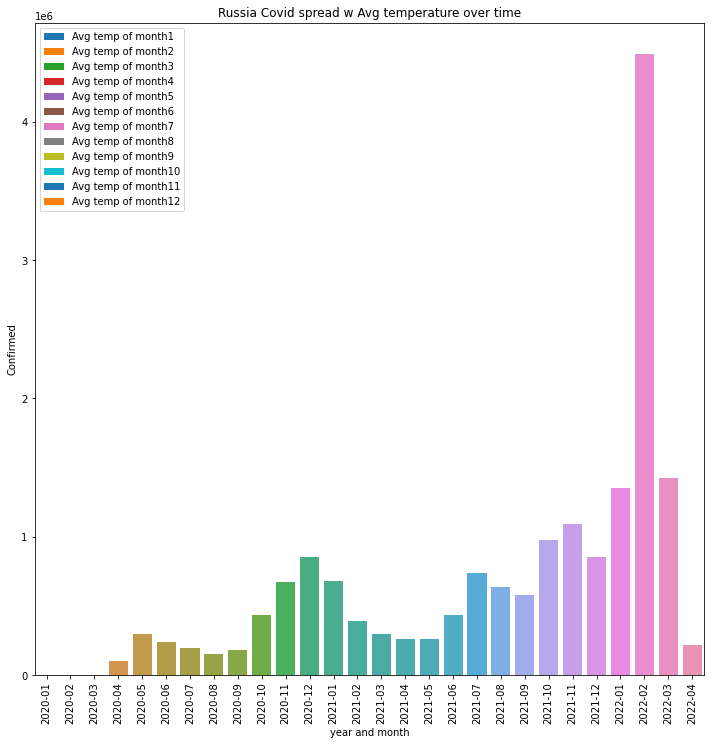

In [344]:
#For Russia
temp_df = df.groupby(['Country/Region','Date']).sum()
ru = temp_df.loc['Russia'].reset_index()
ru['Date'] = pd.to_datetime(ind['Date'])
ru['year and month'] = ru['Date'].dt.to_period('M')
ru_temp_df = climate_merged[(climate_merged['Country/Region']=='Russia')]
ru_temp_df = ru_temp_df[['Avg temp of month1','Avg temp of month2','Avg temp of month3',
                          'Avg temp of month4', 'Avg temp of month5','Avg temp of month6',
                          'Avg temp of month7','Avg temp of month8','Avg temp of month9',
                          'Avg temp of month10', 'Avg temp of month11','Avg temp of month12']]

ru_temp_df.plot(kind = 'bar')
                                               
month_df =pd.DataFrame(ru.groupby('year and month')['Confirmed'].max())
month_df

#calculating each month confirmed cases using cum diff
diff_df=  month_df.diff().fillna(month_df.loc['2020-01']).reset_index()

diff_df
#diff_df['Confirmed'].plot(kind = 'bar', figsize = (8,8))

sns.barplot(data= diff_df, x = 'year and month' , y = 'Confirmed').set(title = 'Russia Covid spread w Avg temperature over time')

Text(0.5, 1.0, 'Russia Avg temperature')

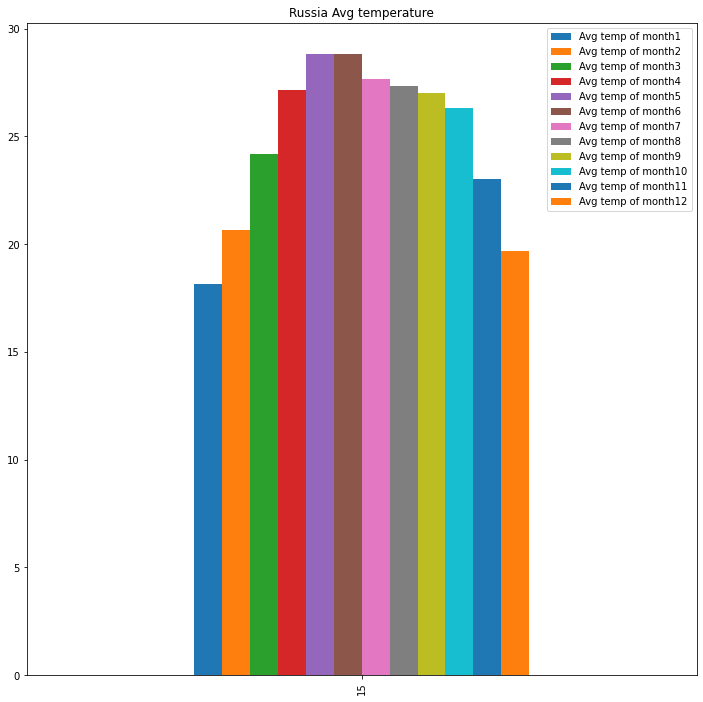

In [345]:
ind_temp_df.plot(kind = 'bar')
plt.title('Russia Avg temperature')

# Articulate additional research questions

## Active cases in all the countries

Text(0.5, 1.0, 'Covid Active cases over time')

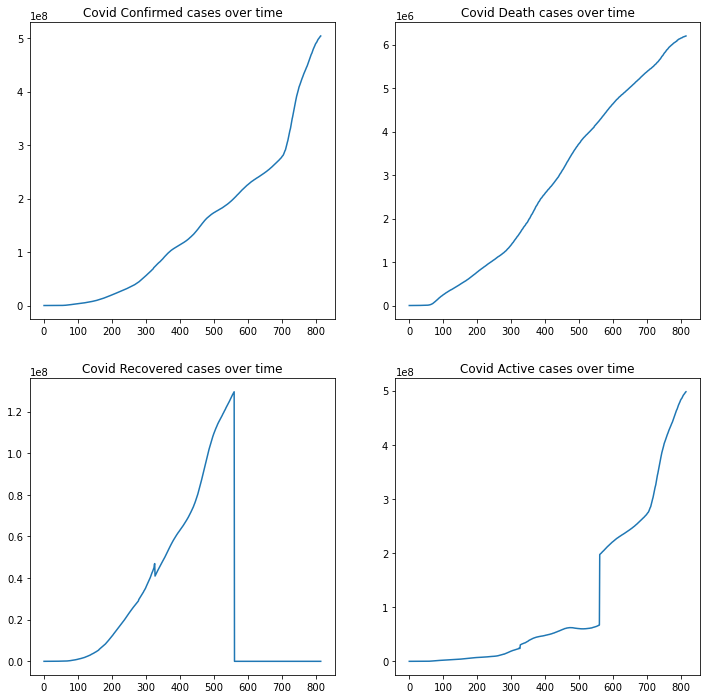

In [346]:
df1 = pd.read_csv(url)

df1 = df1.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()



df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']
df1

figure, axis = plt.subplots(2, 2)

#For confirmed cases
axis[0, 0].plot(df1[['Confirmed']])
axis[0, 0].set_title("Covid Confirmed cases over time")
  
# For Death cases
axis[0, 1].plot(df1[['Deaths']])
axis[0, 1].set_title("Covid Death cases over time")
  
# For Recovered cases
axis[1, 0].plot(df1[['Recovered']])
axis[1, 0].set_title("Covid Recovered cases over time")
  
# For Active cases
axis[1, 1].plot(df1[['Active']])
axis[1, 1].set_title("Covid Active cases over time")



## Recovery Rate and Mortility rate over the time

In [347]:
df2 = pd.read_csv(url)

df2 = df2.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()



df2['Active'] = df2['Confirmed'] - df2['Deaths'] - df2['Recovered']
df2

df2["Mortality Rate"]=(df2["Deaths"]/df2["Confirmed"])*100
df2["Recovery Rate"]=(df2["Recovered"]/df2["Confirmed"])*100

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df2.index, y=(df2["Recovered"]/df2["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df2.index, y=(df2["Deaths"]/df2["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

#observations included in report